# 1. Introduction 

## 1.1 Contexte

Notebook dédié à la découverte du dataset, son nettoyage, son analyse
En sortie plusieurs datasets permettant les différentes étapes de la prédiction de nos target (conso en énergie et émission de gaz à effet de serre:
- df1: permettant d'établir notre baseline
    - suppression des batiments résidentiels
    - suppression des colonnes inutiles (vides, entrées unique, identifiants des batiments, etc...
    - suppressiond des eventules doublons
    - traitement des NAN, des outliers
    
- df2: amélioration du jeu de données pour amélioration des prédictions des targets:
    - prise en compte des usages en gaz, électricité et vapeur

- df3: dernières modifications du dataset:
    - suppression des features peu ou pas pertinentes (suite à analyse SHAP)
    - nouvelles variables créées (Features Engineering)



Une fois ces datasets enregistrés, ce notebook servira également de support à l'analyse exploratoire de données

## 1.2 Imports 

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import scipy.stats as stats
import pingouin as pg
import seaborn as sns
sns.set()
import missingno as msno
#from sklearn.model_selection import train_test_split
#from sklearn import neighbors
#from sklearn.impute import KNNImputer
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
import folium
from folium import plugins
from branca.colormap import StepColormap

## 1.2 Fonctions utiles / set-up

In [243]:
# Affichage nb de colonnes et nb de lignes d'un data set
def print_row_col(df):
    nRow, nCol = df.shape
    print(f'Le dataset contient {nRow} lignes et {nCol} colonnes.')

In [244]:
# Affichage du nb de duplicated
def dupl(df):
    nDupl = df.duplicated().sum()
    print (f'Le dataset contient {nDupl} doublon(s)')

In [245]:
pd.set_option('display.max_columns', None)

In [246]:
DISPLAY=False

## 1.3 Datas

In [247]:
df=pd.read_csv('2016_Building_Energy_Benchmarking.csv')
df.shape

(3376, 46)

## 1.4 Display

In [248]:
df.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

## 1.5 Structure

In [249]:
print_row_col(df)

Le dataset contient 3376 lignes et 46 colonnes.


In [250]:
df.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [251]:
df.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [253]:
df.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


## 2.3 NaN & Duplicated

In [254]:
Nan=pd.DataFrame(df.isna().mean().sort_values(ascending=False))
Nan.round(2)

0
Comments                         1.00
Outlier                          0.99
YearsENERGYSTARCertified         0.96
ThirdLargestPropertyUseType      0.82
ThirdLargestPropertyUseTypeGFA   0.82
SecondLargestPropertyUseType     0.50
SecondLargestPropertyUseTypeGFA  0.50
ENERGYSTARScore                  0.25
LargestPropertyUseTypeGFA        0.01
LargestPropertyUseType           0.01
ZipCode                          0.00
ListOfAllPropertyUseTypes        0.00
SourceEUIWN(kBtu/sf)             0.00
SourceEUI(kBtu/sf)               0.00
Electricity(kWh)                 0.00
Electricity(kBtu)                0.00
NaturalGas(therms)               0.00
NaturalGas(kBtu)                 0.00
TotalGHGEmissions                0.00
SteamUse(kBtu)                   0.00
GHGEmissionsIntensity            0.00
NumberofBuildings                0.00
SiteEUI(kBtu/sf)                 0.00
SiteEUIWN(kBtu/sf)               0.00
SiteEnergyUseWN(kBtu)            0.00
SiteEnergyUse(kBtu)              0.00
TaxParcelIdentificationNumber    0.00
BuildingType                     0.00
PrimaryPropertyType              0.00
ComplianceStatus                 0.00
PropertyName                     0.00
DefaultData                      0.00
Address                          0.00
City                             0.00
State                            0.00
PropertyGFABuilding(s)           0.00
CouncilDistrictCode              0.00
PropertyGFAParking               0.00
Neighborhood                     0.00
Latitude                         0.00
Longitude                        0.00
YearBuilt                        0.00
NumberofFloors                   0.00
PropertyGFATotal                 0.00
DataYear                         0.00
OSEBuildingID                    0.00

In [255]:
df.isna().sum().sort_values(ascending=False)

Comments                           3376
Outlier                            3344
YearsENERGYSTARCertified           3257
ThirdLargestPropertyUseType        2780
ThirdLargestPropertyUseTypeGFA     2780
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ENERGYSTARScore                     843
LargestPropertyUseTypeGFA            20
LargestPropertyUseType               20
ZipCode                              16
ListOfAllPropertyUseTypes             9
SourceEUIWN(kBtu/sf)                  9
SourceEUI(kBtu/sf)                    9
Electricity(kWh)                      9
Electricity(kBtu)                     9
NaturalGas(therms)                    9
NaturalGas(kBtu)                      9
TotalGHGEmissions                     9
SteamUse(kBtu)                        9
GHGEmissionsIntensity                 9
NumberofBuildings                     8
SiteEUI(kBtu/sf)                      7
SiteEUIWN(kBtu/sf)                    6
SiteEnergyUseWN(kBtu)                 6


<AxesSubplot:>

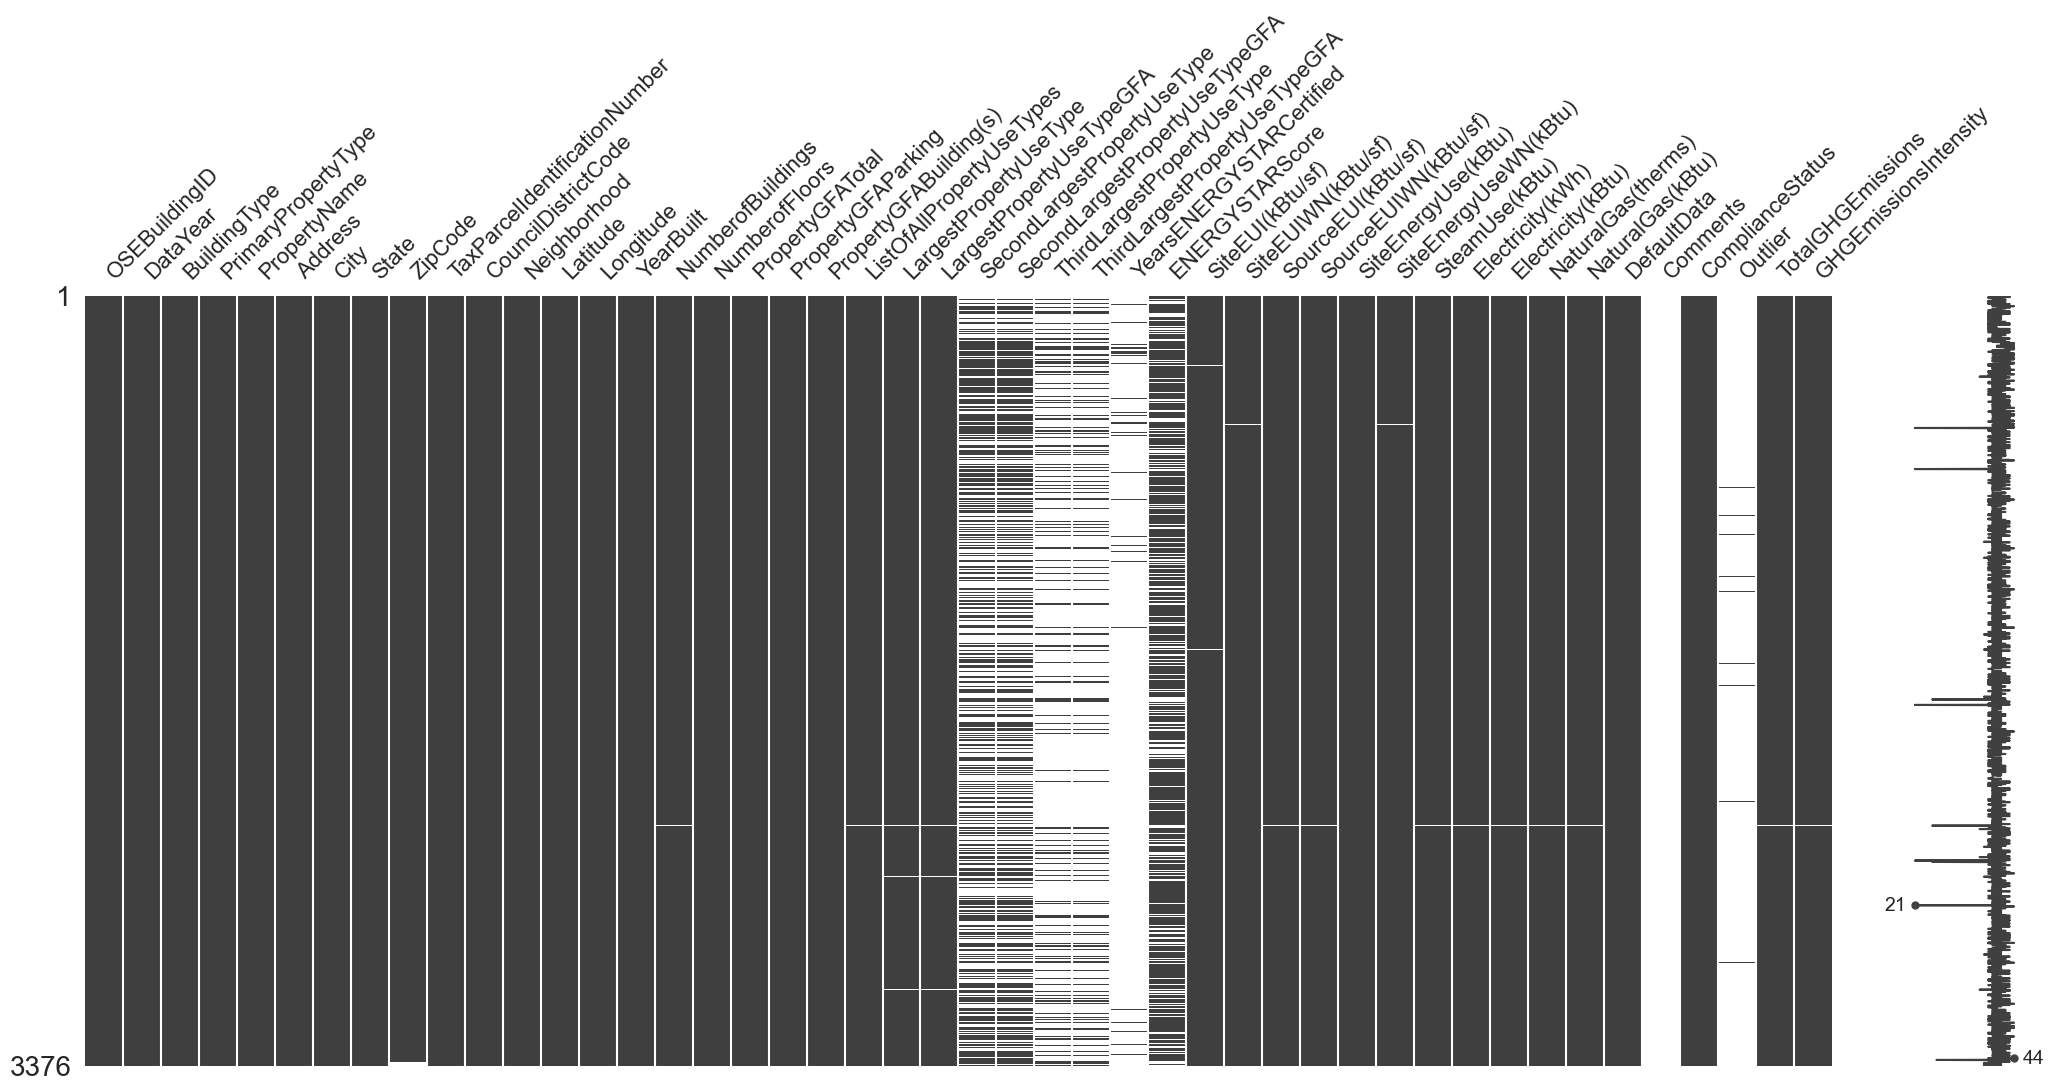

In [256]:
msno.matrix(df)

In [257]:
dupl(df)

Le dataset contient 0 doublon(s)


# 3. Nettoyage dataset

## 3.1 Suppression des batiments résidentiels

Filtre sur la donnée BuildingType...

In [258]:
df['BuildingType'].value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [259]:
liste_building_KO=['Multifamily LR (1-4)','Multifamily MR (5-9)','Multifamily HR (10+)']

In [260]:
df['build_type']=0

In [261]:
df.loc[df['BuildingType'].str.contains('Multi')==True,['build_type']]='Résidentiel'
df.loc[~df['BuildingType'].str.contains('Multi')==True,['build_type']]='Non_Résidentiel'
df['build_type'].value_counts(normalize=True)

Résidentiel        0.505924
Non_Résidentiel    0.494076
Name: build_type, dtype: float64

<AxesSubplot:title={'center':'Part des batiments résidentiels et non résidentiels dans le datset initial'}, ylabel='build_type'>

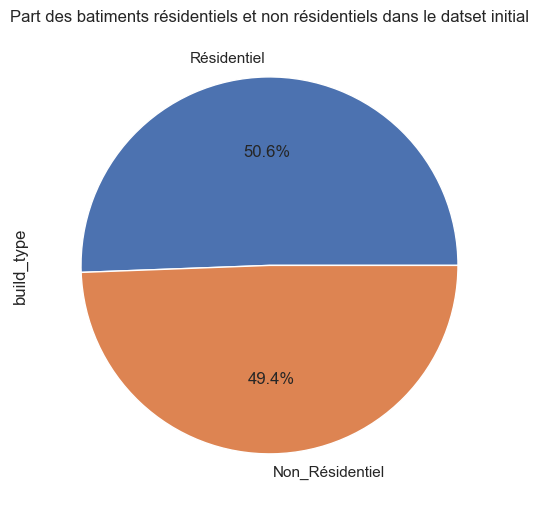

In [262]:
plt.figure(figsize = (5,5),constrained_layout=True)
df['build_type'].value_counts(normalize=True).plot(kind='pie',autopct='%.1f%%', title="Part des batiments résidentiels et non résidentiels dans le datset initial")

In [263]:
df=df.drop(df.loc[df['BuildingType'].isin(liste_building_KO)].index).reset_index(drop=True)
df

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
1663          50222      2016  Nonresidential COS              Office   
1664          50223      2016  Nonresidential COS               Other   
1665          50224      2016  Nonresidential COS               Other   
1666          50225      2016  Nonresidential COS  Mixed Use Property   
1667          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
1663                Horticulture building  1600 S Dakota St  Seattle    WA   
1664  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
1665                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
1666          South Park Community Center    8319 8th Ave S  Seattle    WA   
1667          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0     98101.0                    0659000030                    7   
1     98101.0                    0659000220                    7   
2     98101.0                    0659000475                    7   
3     98101.0                    0659000640                    7   
4     98121.0                    0659000970                    7   
...       ...                           ...                  ...   
1663      NaN                    1624049080                    2   
1664      NaN                    3558300000                    2   
1665      NaN                    1794501150                    7   
1666      NaN                    7883603155                    1   
1667      NaN                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN  47.61220 -122.33799       1927   
1                  DOWNTOWN  47.61317 -122.33393       1996   
2                  DOWNTOWN  47.61393 -122.33810       1969   
3                  DOWNTOWN  47.61412 -122.33664       1926   
4                  DOWNTOWN  47.61375 -122.34047       1980   
...                     ...       ...        ...        ...   
1663       GREATER DUWAMISH  47.56722 -122.31154       1990   
1664               DOWNTOWN  47.59625 -122.32283       2004   
1665  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784       1974   
1666       GREATER DUWAMISH  47.52832 -122.32431       1989   
1667       GREATER DUWAMISH  47.53939 -122.29536       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0              12             88434                   0   
1                   1.0              11            103566               15064   
2                   1.0              41            956110              196718   
3                   1.0              10             61320                   0   
4                   1.0              18            175580               62000   
...                 ...             ...               ...                 ...   
1663                1.0               1            

## 3.2 Supression des colonnes inutiles

In [264]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

Colonnes à supprimer d'office:
- Colonnes vides => 'Comments'
- Colonnes ne prenant qu'une seule valeur: 'DataYear', 'City' et 'State'
- Colonnes qui font doublons: 'Electricity(kWh)', 'NaturalGas(therms)'
- Colonnes très liées voire équivalente aux targets (SiteEnergyUseWN(kBtu) et TotalGHGEmissions: SiteEUI(kBtu/sf), SiteEnergyUse(kBtu), GHGEmissionsIntensity, etc..
Les autres colonnes supprimées ne représentent pas d'interet pour déterminer nos targets:
- default data, outlier, etc.. ne sachant pas exactement à quoi elles correspondent
-ou encore par ex 'OSEBuildingID','PropertyName','Address', 'ZipCode', TaxParcelIdentificationNumber','CouncilDistrictCode', 'PropertyGFATotal' 

Je garde les coordonnées GPS et le Neighborhood dans un premier (au moins pour l'EDA et pour représentation les batiments sur une carte). On verra que ces infos n'ont pas d'importance dans la prédicition des targets

Par ailleurs dans l'objetif d'affiner les usages des batiments (Other et Multi usage), je conserve:
- le dataset original df afin de pouvoir y faire des recherches, notamment pour affiner l'usage des batiments.
- dans un 1er temps la feature 'LargestPropertyUseType'


In [265]:
listecol =['PrimaryPropertyType','Latitude', 'Longitude','YearBuilt','Neighborhood','NumberofBuildings',
       'NumberofFloors', 'PropertyGFAParking','PropertyGFABuilding(s)','LargestPropertyUseType',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)','Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions','ENERGYSTARScore']

In [266]:
data=pd.DataFrame()
for col in listecol:
    data[col]=df[col]
data

PrimaryPropertyType  Latitude  Longitude  YearBuilt  \
0                  Hotel  47.61220 -122.33799       1927   
1                  Hotel  47.61317 -122.33393       1996   
2                  Hotel  47.61393 -122.33810       1969   
3                  Hotel  47.61412 -122.33664       1926   
4                  Hotel  47.61375 -122.34047       1980   
...                  ...       ...        ...        ...   
1663              Office  47.56722 -122.31154       1990   
1664               Other  47.59625 -122.32283       2004   
1665               Other  47.63644 -122.35784       1974   
1666  Mixed Use Property  47.52832 -122.32431       1989   
1667  Mixed Use Property  47.53939 -122.29536       1938   

               Neighborhood  NumberofBuildings  NumberofFloors  \
0                  DOWNTOWN                1.0              12   
1                  DOWNTOWN                1.0              11   
2                  DOWNTOWN                1.0              41   
3                  DOWNTOWN                1.0              10   
4                  DOWNTOWN                1.0              18   
...                     ...                ...             ...   
1663       GREATER DUWAMISH                1.0               1   
1664               DOWNTOWN                1.0               1   
1665  MAGNOLIA / QUEEN ANNE                1.0               1   
1666       GREATER DUWAMISH                1.0               1   
1667       GREATER DUWAMISH                1.0               1   

      PropertyGFAParking  PropertyGFABuilding(s) LargestPropertyUseType  \
0                      0                   88434                  Hotel   
1                  15064                   88502                  Hotel   
2                 196718                  759392                  Hotel   
3                      0                   61320                  Hotel   
4                  62000                  113580                  Hotel   
...                  ...                     ...                    ...   
1663                   0                   12294                 Office   
1664                   0                   16000     Other - Recreation   
1665                   0                   13157     Other - Recreation   
1666                   0                   14101     Other - Recreation   
1667                   0                   18258     Other - Recreation   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
0              7.456910e+06      2003882.00       3.946027e+06   
1              8.664479e+06            0.00       3.242851e+06   
2              7.393711e+07     21566554.00       4.952666e+07   
3              6.946800e+06      2214446.25       2.768924e+06   
4              1.465650e+07            0.00       5.368607e+06   
...                     ...             ...                ...   
1663           9.430032e+05            0.00       5.242709e+05   
1664           1.053706e+06            0.00       3.965461e+05   
1665           6.053764e+06            0.00       1.792159e+06   
1666           7.828413e+05            0.00       3.488702e+05   
1667           1.293722e+06            0.00       4.325542e+05   

      NaturalGas(kBtu)  TotalGHGEmissions  ENERGYSTARScore  
0         1.276453e+06             249.98             60.0  
1         5.145082e+06             295.86             61.0  
2         1.493800e+06            2089.28             43.0  
3         1.811213e+06             286.43             56.0  
4         8.803998e+06             505.01             75.0  
...                ...                ...              ...  
1663      3.254750e+05              20.94             46.0  
1664      5.537300e+05              32.17              NaN  
1665      3.973739e+06             223.54              NaN  
1666      3.706010e+05              22.11              NaN  
1667      7.203420e+05              41.27              NaN  

[1668 rows x 16 columns]

## 3.3 Traitement des NaN

In [267]:
data.isna().sum().sort_values(ascending=False)

ENERGYSTARScore           574
LargestPropertyUseType      6
SiteEnergyUseWN(kBtu)       3
NumberofBuildings           2
SteamUse(kBtu)              2
Electricity(kBtu)           2
NaturalGas(kBtu)            2
TotalGHGEmissions           2
PrimaryPropertyType         0
Latitude                    0
Longitude                   0
YearBuilt                   0
Neighborhood                0
NumberofFloors              0
PropertyGFAParking          0
PropertyGFABuilding(s)      0
dtype: int64

### 3.3.1 Conso NRJ

In [268]:
data.loc[data['SiteEnergyUseWN(kBtu)'].isna(),:]

PrimaryPropertyType  Latitude  Longitude  YearBuilt  \
553                  Large Office  47.61051 -122.34439       1979   
568   Small- and Mid-Sized Office  47.60380 -122.33293       1924   
1423           Mixed Use Property  47.66182 -122.31345       1928   

     Neighborhood  NumberofBuildings  NumberofFloors  PropertyGFAParking  \
553      DOWNTOWN                1.0               7               87160   
568      DOWNTOWN                NaN               4                   0   
1423    NORTHEAST                NaN               2                   0   

      PropertyGFABuilding(s) LargestPropertyUseType  SiteEnergyUseWN(kBtu)  \
553                    43983                 Office                    NaN   
568                    63150                    NaN                    NaN   
1423                   20760                    NaN                    NaN   

      SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
553              0.0          4871126.0         1416041.0             109.16   
568              NaN                NaN               NaN                NaN   
1423             NaN                NaN               NaN                NaN   

      ENERGYSTARScore  
553              93.0  
568               NaN  
1423              NaN

Suppression des ces lignes (et suppression par la même occasion des2 NaN sur NumberofBuildings) et sur les différents NRJ use.

In [269]:
data=data.drop(data.loc[data['SiteEnergyUseWN(kBtu)'].isna()].index).reset_index(drop=True)
data.shape

(1665, 16)

In [270]:
data.isna().sum().sort_values(ascending=False)

ENERGYSTARScore           572
LargestPropertyUseType      4
PrimaryPropertyType         0
Latitude                    0
Longitude                   0
YearBuilt                   0
Neighborhood                0
NumberofBuildings           0
NumberofFloors              0
PropertyGFAParking          0
PropertyGFABuilding(s)      0
SiteEnergyUseWN(kBtu)       0
SteamUse(kBtu)              0
Electricity(kBtu)           0
NaturalGas(kBtu)            0
TotalGHGEmissions           0
dtype: int64

### 3.3.2 EnergyStarScore

Pas d'imputation à ce stade. Sera fait via pipeline dans notebook ML

In [271]:
df['EnergyScore_Present']='N'

In [272]:
df.loc[~df['ENERGYSTARScore'].isna(),['EnergyScore_Present']]='Y'
#df.loc[~df['BuildingType'].str.contains('Multi')==True,['build_type']]='Non_Résidentiel'
df['EnergyScore_Present'].value_counts(normalize=True)

Y    0.655875
N    0.344125
Name: EnergyScore_Present, dtype: float64

<AxesSubplot:title={'center':'Part des batiments avec / sans ENERGYSTARScore'}, ylabel='EnergyScore_Present'>

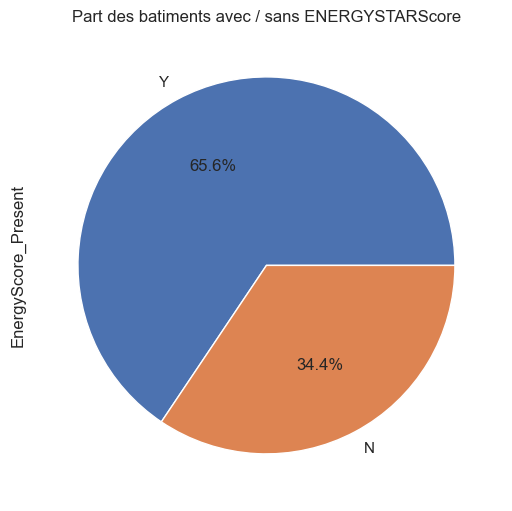

In [273]:
plt.figure(figsize = (5,5),constrained_layout=True)
df['EnergyScore_Present'].value_counts(normalize=True).plot(kind='pie',autopct='%.1f%%', title="Part des batiments avec / sans ENERGYSTARScore")

### 3.3.3 LargestPropertyUseType

In [274]:
data.loc[data['LargestPropertyUseType'].isna(),:]

PrimaryPropertyType  Latitude  Longitude  YearBuilt  \
347         Self-Storage Facility  47.66838 -122.39310       1946   
819                         Hotel  47.61203 -122.34165       1910   
1348  Small- and Mid-Sized Office  47.64747 -122.34086       2008   
1366                   Restaurant  47.59697 -122.32474       1913   

     Neighborhood  NumberofBuildings  NumberofFloors  PropertyGFAParking  \
347       BALLARD                2.0               2                   0   
819      DOWNTOWN                1.0               8                   0   
1348   LAKE UNION                1.0               4                   0   
1366     DOWNTOWN                1.0               3                   0   

      PropertyGFABuilding(s) LargestPropertyUseType  SiteEnergyUseWN(kBtu)  \
347                   111445                    NaN           6.076957e+06   
819                    61721                    NaN           2.968430e+06   
1348                   48350                    NaN           3.280956e+06   
1366                   28800                    NaN           9.358332e+05   

      SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
347              0.0          3007514.0         2689958.0             163.83   
819              0.0          2534592.0          362488.0              36.92   
1348             0.0          3168131.0               0.0              22.09   
1366             0.0           402907.0          497017.0              29.21   

      ENERGYSTARScore  
347               NaN  
819              93.0  
1348             45.0  
1366              NaN

Pour ces 4 batiments, rien à faire car le PrimaryPropertyType est renseigné.

A ce stade la feature LargestPropertyUseType va servir à défaulter le PrimaryPropertyType.

Puis cette feature sera supprimée du dataset

## 3.4. Traitement des valeurs nulles et des outliers

In [275]:
data.describe()

Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  1665.000000  1665.000000  1665.000000        1665.000000   
mean     47.616037  -122.332912  1961.946547           1.168769   
std       0.048197     0.024596    32.744827           2.932286   
min      47.499170  -122.411820  1900.000000           0.000000   
25%      47.585420  -122.343280  1930.000000           1.000000   
50%      47.612340  -122.332940  1965.000000           1.000000   
75%      47.649650  -122.321710  1989.000000           1.000000   
max      47.733870  -122.258640  2015.000000         111.000000   

       NumberofFloors  PropertyGFAParking  PropertyGFABuilding(s)  \
count     1665.000000          1665.00000            1.665000e+03   
mean         4.120721         12868.87027            1.060588e+05   
std          6.568735         42271.04546            2.844540e+05   
min          0.000000             0.00000            3.636000e+03   
25%          1.000000             0.00000            2.849200e+04   
50%          2.000000             0.00000            4.741500e+04   
75%          4.000000             0.00000            9.490000e+04   
max         99.000000        512608.00000            9.320156e+06   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
count           1.665000e+03    1.665000e+03       1.665000e+03   
mean            8.064790e+06    5.128804e+05       5.844077e+06   
std             2.203878e+07    5.515586e+06       2.080296e+07   
min             0.000000e+00    0.000000e+00      -1.154170e+05   
25%             1.294615e+06    0.000000e+00       7.209450e+05   
50%             2.685146e+06    0.000000e+00       1.611215e+06   
75%             7.109712e+06    0.000000e+00       4.825247e+06   
max             4.716139e+08    1.349435e+08       6.570744e+08   

       NaturalGas(kBtu)  TotalGHGEmissions  ENERGYSTARScore  
count      1.665000e+03        1665.000000      1093.000000  
mean       1.971178e+06         185.018835        65.424520  
std        9.373619e+06         752.199624        28.493766  
min        0.000000e+00          -0.800000         1.000000  
25%        0.000000e+00          19.930000        48.000000  
50%        4.970170e+05          49.580000        73.000000  
75%        1.522434e+06         142.390000        89.000000  
max        2.979090e+08       16870.980000       100.000000

Traiter nb of buildings = 0, Nb of floors =0, Site EUI (conso)= 0

La superficie des parkings = 0 peut être conservée 

Analyse à mener sur les nb d'étages max, number of floor max, superficies, conso, emission de GHG (-0.8)

### 3.4.1 Nb of buildings =0

In [276]:
data.loc[data['NumberofBuildings']==0,:].shape

(52, 16)

In [277]:
data.loc[data['NumberofBuildings']==0,:]

PrimaryPropertyType   Latitude   Longitude  YearBuilt  \
62                 Medical Office  47.612440 -122.321400       1965   
75    Small- and Mid-Sized Office  47.623910 -122.348370       1986   
159                     Warehouse  47.575070 -122.357470       1916   
195                  Large Office  47.617570 -122.351220       1968   
235   Small- and Mid-Sized Office  47.661000 -122.316260       1961   
258            Mixed Use Property  47.528710 -122.294430       1970   
272                  Large Office  47.610050 -122.336100       1926   
274                         Hotel  47.609960 -122.335720       1973   
285                         Other  47.611850 -122.334210       1996   
352                         Other  47.565480 -122.353780       1955   
359   Supermarket / Grocery Store  47.728030 -122.342140       1984   
411                         Other  47.709400 -122.318430       1969   
423            Mixed Use Property  47.634510 -122.325050       2002   
427                         Other  47.557410 -122.331630       1973   
471                  Large Office  47.581810 -122.335340       1912   
475   Small- and Mid-Sized Office  47.595348 -122.327269       1930   
481            Mixed Use Property  47.617830 -122.337290       2006   
487                  Retail Store  47.536550 -122.363770       2005   
534                     Warehouse  47.659200 -122.384370       1974   
596                     Warehouse  47.575130 -122.337390       1917   
689                    Laboratory  47.617630 -122.355070       1926   
727                Residence Hall  47.608170 -122.326540       1982   
745            Mixed Use Property  47.562200 -122.386480       1926   
752                         Other  47.720320 -122.295070       1949   
765                         Other  47.584760 -122.297650       1977   
839                         Other  47.649750 -122.352890       1996   
873                         Other  47.609700 -122.325000       1912   
877                Medical Office  47.608654 -122.320590       1963   
918                         Other  47.613410 -122.345970       1930   
1027                        Other  47.705440 -122.291800       1996   
1196             Worship Facility  47.683510 -122.354820       1951   
1228  Supermarket / Grocery Store  47.702240 -122.344090       1986   
1260                        Other  47.528010 -122.369180       1975   
1270       Refrigerated Warehouse  47.589990 -122.335390       1937   
1281  Small- and Mid-Sized Office  47.584620 -122.334700       1910   
1331                   Restaurant  47.637340 -122.339880       1962   
1342           Mixed Use Property  47.600500 -122.335140       2005   
1354  Small- and Mid-Sized Office  47.600710 -122.333770       1909   
1371                     Hospital  47.587670 -122.386720       1961   
1392                 Retail Store  47.613860 -122.324810       1910   
1409  Small- and Mid-Sized Office  47.661170 -122.339100       1997   
1436  Small- and Mid-Sized Office  47.599540 -122.331150       1900   
1440  Small- and Mid-Sized Office  47.600260 -122.329900       1905   
1450  Small- and Mid-Sized Office  47.598190 -122.325990       1993   
1462           Mixed Use Property  47.601530 -122.319860       2005   
1511                        Hotel  47.605050 -122.336100       2006   
1555                 Large Office  47.617060 -122.351410       1982   
1564                 Retail Store  47.613788 -122.321426       1996   
1579                        Other  47.606680 -122.302420       1968   
1601                   Laboratory  47.623510 -122.341350       2013   
1609                        Other  47.620820 -122.352510       1962   
1616  Small- and Mid-Sized Office  47.614380 -122.321740       1912   

               Neighborhood  NumberofBuildings  NumberofFloors  \
62                     EAST                0.0               3   
75    MAGNOLIA / QUEEN ANNE                0.0               2   
159        GREATER DUWAMISH                0.0      

Ces batiments on bien une superficie donc ils existent

=>On remplace les 0 par 1

In [278]:
data.loc[data['NumberofBuildings']==0,'NumberofBuildings']=1

### 3.4.2 Nb of floors

In [279]:
data.loc[data['NumberofFloors']==0,:].shape

(16, 16)

In [280]:
data.loc[data['NumberofFloors']==0,:]

PrimaryPropertyType  Latitude  Longitude  YearBuilt  \
164                         Hotel  47.61275 -122.33330       1999   
480                Medical Office  47.60979 -122.32298       2004   
481            Mixed Use Property  47.61783 -122.33729       2006   
553                         Other  47.61289 -122.33531       1999   
1074               Medical Office  47.60862 -122.32372       1945   
1160                        Other  47.59042 -122.32498       1991   
1570                    Warehouse  47.68454 -122.26235       1940   
1571               Medical Office  47.68240 -122.26223       1960   
1572  Small- and Mid-Sized Office  47.68254 -122.26299       1960   
1587                        Other  47.68212 -122.26330       1929   
1623                        Other  47.56260 -122.29396       2009   
1624                   University  47.65644 -122.31041       1900   
1626               Residence Hall  47.65718 -122.31632       2011   
1628               Residence Hall  47.65577 -122.31530       1953   
1629               Residence Hall  47.65447 -122.31733       1970   
1630               Residence Hall  47.65176 -122.30756       2011   

          Neighborhood  NumberofBuildings  NumberofFloors  PropertyGFAParking  \
164           DOWNTOWN                1.0               0                   0   
480               EAST                1.0               0                   0   
481           DOWNTOWN                1.0               0                   0   
553           DOWNTOWN                1.0               0                   0   
1074              EAST                1.0               0                   0   
1160  GREATER DUWAMISH               10.0               0                   0   
1570         NORTHEAST                1.0               0                   0   
1571         NORTHEAST                1.0               0                   0   
1572         NORTHEAST                1.0               0                   0   
1587         NORTHEAST                8.0               0                   0   
1623         SOUTHEAST                1.0               0                   0   
1624         NORTHEAST              111.0               0                   0   
1626         NORTHEAST                1.0               0                   0   
1628         NORTHEAST                1.0               0                   0   
1629         NORTHEAST                1.0               0                   0   
1630         NORTHEAST                1.0               0                   0   

      PropertyGFABuilding(s)      LargestPropertyUseType  \
164                   934292                       Hotel   
480                   225982              Medical Office   
481                   516407                     Parking   
553                   947987                Other - Mall   
1074                  274568              Medical Office   
1160                  230971                       Other   
1570                  384772  Non-Refrigerated Warehouse   
1571                   30287              Medical Office   
1572                   21931                      Office   
1587                  502030          Other - Recreation   
1623                   40265          Pre-school/Daycare   
1624                 9320156          College/University   
1626                  176225    Residence Hall/Dormitory   
1628                  166991    Residence Hall/Dormitory   
1629                   89392    Residence Hall/Dormitory   
1630                   97040    Residence Hall/Dormitory   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
164              66502836.0             0.0         39364114.0   
480              20764814.0       7815663.0         12744957.0   
481              40754364.0             0.0         29432803.0   
553              46343304.0             0.0         46510954.0   
1074             25358122.0      13296249.0         12015275.0   
1160             22230844.0             0.0  

Même remarque que pour le nb de builidings: on remplace les 0 par 1

In [281]:
data.loc[data['NumberofFloors']==0,'NumberofFloors']=1

<AxesSubplot:xlabel='NumberofFloors'>

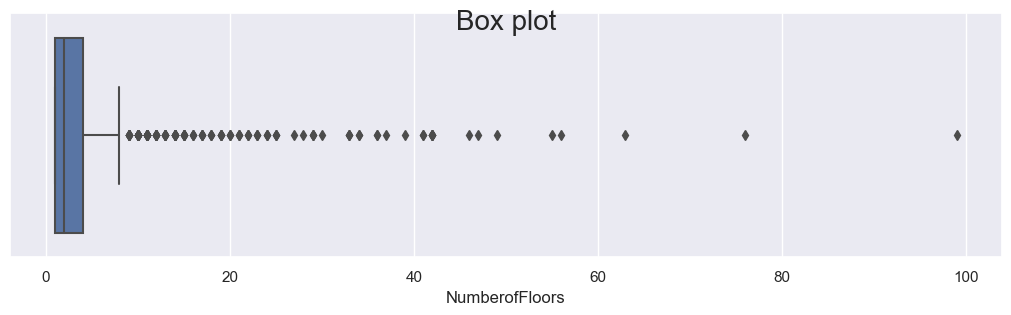

In [282]:
plt.figure(figsize = (10,3),constrained_layout=True)
plt.suptitle("Box plot", size=20, y=1)
sns.boxplot(data=data, x='NumberofFloors')

In [283]:
data.loc[data['NumberofFloors']>60,:]

PrimaryPropertyType  Latitude  Longitude  YearBuilt      Neighborhood  \
227        Large Office  47.60501 -122.32988       1990          DOWNTOWN   
549        Large Office  47.60454 -122.33072       1985          DOWNTOWN   
938    Worship Facility  47.55072 -122.30265       1977  GREATER DUWAMISH   

     NumberofBuildings  NumberofFloors  PropertyGFAParking  \
227                1.0              63              159600   
549                1.0              76              319400   
938                1.0              99                   0   

     PropertyGFABuilding(s) LargestPropertyUseType  SiteEnergyUseWN(kBtu)  \
227                 1195387                 Office           6.157618e+07   
549                 1632820                 Office           9.253726e+07   
938                   21948       Worship Facility           3.260012e+05   

     SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
227             0.0         61576180.0               0.0             429.27   
549             0.0         87851862.0         5085763.0             882.56   
938             0.0           326001.0               0.0               2.27   

     ENERGYSTARScore  
227             89.0  
549             86.0  
938             80.0

Après vérification sur Internet le building renseigné avec 99 étages est une église. Il s'agit d'une valeur par défaut. A remplacer par 1.

Les autres buildings semblent OK

Prévoir passage au log pour cette variable

In [284]:
data.loc[data['NumberofFloors']==99,'NumberofFloors']=1


In [285]:
data.loc[data['NumberofFloors']==99,:]

Empty DataFrame
Columns: [PrimaryPropertyType, Latitude, Longitude, YearBuilt, Neighborhood, NumberofBuildings, NumberofFloors, PropertyGFAParking, PropertyGFABuilding(s), LargestPropertyUseType, SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu), TotalGHGEmissions, ENERGYSTARScore]
Index: []

### 3.4.3 Conso NRJ =0

In [286]:
data.loc[data['SiteEnergyUseWN(kBtu)']==0,:]

PrimaryPropertyType  Latitude  Longitude  YearBuilt  \
27                    K-12 School  47.62266 -122.30547       1955   
30                    K-12 School  47.63290 -122.35172       1989   
61                    K-12 School  47.50970 -122.37759       1948   
80                    K-12 School  47.56360 -122.35800       1999   
84                    K-12 School  47.57324 -122.29058       1991   
94                    K-12 School  47.65464 -122.34912       1991   
132                   K-12 School  47.69675 -122.37760       1959   
138                   K-12 School  47.59796 -122.30415       1963   
151                   K-12 School  47.69823 -122.32126       1989   
214                  Large Office  47.60370 -122.33447       1958   
241                  Large Office  47.61695 -122.32965       1988   
278                  Large Office  47.60923 -122.33625       1929   
298                         Other  47.61195 -122.33167       1990   
344   Small- and Mid-Sized Office  47.62014 -122.35768       1971   
602                   K-12 School  47.60120 -122.31548       1988   
618                   K-12 School  47.60210 -122.29181       1988   
665                         Other  47.72777 -122.34503       2002   
709              Worship Facility  47.67572 -122.32850       1910   
728              Worship Facility  47.68752 -122.29852       2000   
940                   K-12 School  47.72369 -122.30676       1954   
1109                  K-12 School  47.69497 -122.38704       1958   
1586                  K-12 School  47.64342 -122.39970       1952   
1624                   University  47.65644 -122.31041       1900   
1625                   University  47.65395 -122.30584       1969   
1627                   University  47.65356 -122.30613       1998   

               Neighborhood  NumberofBuildings  NumberofFloors  \
27                  Central                1.0               1   
30    MAGNOLIA / QUEEN ANNE                1.0               2   
61                SOUTHWEST                1.0               2   
80                 DELRIDGE                1.0               3   
84                SOUTHEAST                1.0               2   
94               LAKE UNION                1.0               3   
132                 BALLARD                1.0               1   
138                 CENTRAL                1.0               3   
151                   NORTH                1.0               2   
214                DOWNTOWN                1.0              17   
241                DOWNTOWN                1.0              20   
278                DOWNTOWN                1.0              15   
298                DOWNTOWN                1.0               6   
344   MAGNOLIA / QUEEN ANNE                1.0               5   
602                 CENTRAL                1.0               1   
618                 CENTRAL                1.0               3   
665               NORTHWEST                1.0               1   
709               Northwest                1.0               2   
728               NORTHEAST                1.0               2   
940                   NORTH                1.0               1   
1109                BALLARD                1.0               1   
1586  MAGNOLIA / QUEEN ANNE                1.0               1   
1624              NORTHEAST              111.0               1   
1625              NORTHEAST                1.0               4   
1627              NORTHEAST                1.0               6   

      PropertyGFAParking  PropertyGFABuilding(s) LargestPropertyUseType  \
27                     0                  126351            K-12 School   
30                     0                   51582            K-12 School   
61                     0                   53352            K-12 School   
80                     0                   74468            K-12 School   
84                     0                   58933            K-12 School   
94                     0                   66588    

Suppression de ces lignes (A noter que le batiment de type campus comprenant 111 immeubles est présent)

In [287]:
data=data.drop(data.loc[data['SiteEnergyUseWN(kBtu)']==0].index)
data.shape

(1640, 16)

<AxesSubplot:xlabel='SiteEnergyUseWN(kBtu)'>

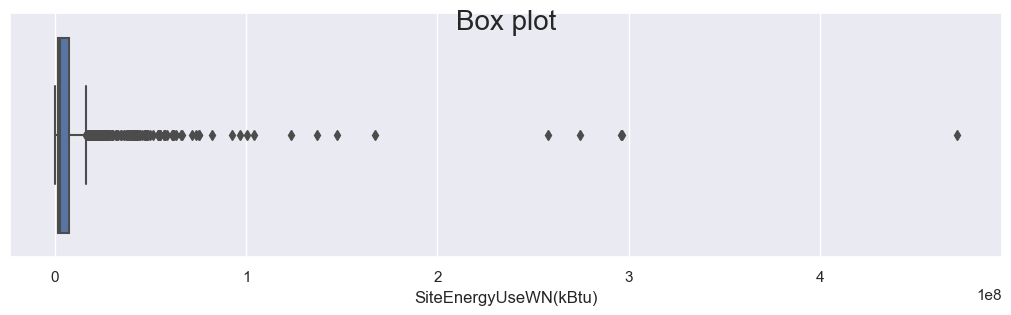

In [288]:
plt.figure(figsize = (10,3),constrained_layout=True)
plt.suptitle("Box plot", size=20, y=1)
sns.boxplot(data=data, x='SiteEnergyUseWN(kBtu)')

In [289]:
data.loc[data['SiteEnergyUseWN(kBtu)']>=20000000,:].sort_values(by='SiteEnergyUseWN(kBtu)', ascending=False)

PrimaryPropertyType   Latitude   Longitude  YearBuilt  \
34       Mixed Use Property  47.534930 -122.317880       1992   
168                Hospital  47.603990 -122.323770       2000   
606                Hospital  47.608951 -122.322402       1994   
548                   Other  47.614380 -122.338710       1981   
123                Hospital  47.662310 -122.281460       1953   
...                     ...        ...         ...        ...   
1587                  Other  47.682120 -122.263300       1929   
288            Large Office  47.609090 -122.332020       1971   
1399  Senior Care Community  47.535150 -122.265560       1967   
67                    Hotel  47.626420 -122.333250       1990   
244            Large Office  47.618200 -122.352000       1982   

          Neighborhood  NumberofBuildings  NumberofFloors  PropertyGFAParking  \
34    GREATER DUWAMISH                1.0               3                   0   
168               EAST                9.0               8                   0   
606               EAST                7.0              14                   0   
548           DOWNTOWN                1.0              33                   0   
123          NORTHEAST                6.0              10                   0   
...                ...                ...             ...                 ...   
1587         NORTHEAST                8.0               1                   0   
288           DOWNTOWN                1.0              21               93204   
1399         SOUTHEAST                1.0               1                   0   
67          LAKE UNION                1.0               7               44766   
244           DOWNTOWN                1.0               6              124216   

      PropertyGFABuilding(s)                 LargestPropertyUseType  \
34                    494835                                 Office   
168                  1158691  Hospital (General Medical & Surgical)   
606                  1765970  Hospital (General Medical & Surgical)   
548                   429405                            Data Center   
123                   879000  Hospital (General Medical & Surgical)   
...                      ...                                    ...   
1587                  502030                     Other - Recreation   
288                   363100                                 Office   
1399                  141297                  Senior Care Community   
67                    238097                                  Hotel   
244                   272410                                 Office   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
34              471613856.0             0.0        150476283.0   
168             296671744.0     122575032.0        168683602.0   
606             295929888.0     134943456.0        139354828.0   
548             274725984.0             0.0        274532495.0   
123             257764208.0             0.0        115641210.0   
...                     ...             ...                ...   
1587             20672948.0             0.0          9359884.0   
288              20421248.0             0.0         19397322.0   
1399             20378838.0             0.0          6797882.0   
67               20194606.0             0.0         10980652.0   
244              20179120.0             0.0         20361156.0   

      NaturalGas(kBtu)  TotalGHGEmissions  ENERGYSTARScore  
34         297909000.0           16870.98              8.0  
168          1832129.0           10734.57             29.0  
606         17316120.0           12307.16             54.0  
548           149672.0            1921.82             98.0  
123        138191238.0            8145.52             10.0  
...                ...                ...              ...  
1587         9110455.0             549.11              NaN  
288                0.0             135.23             74.0  
1399        12625460.0             717.93             76.0 

Prévoir passage au log pour cette variable (target)

### 3.4.4 Superficie building

<AxesSubplot:xlabel='PropertyGFABuilding(s)'>

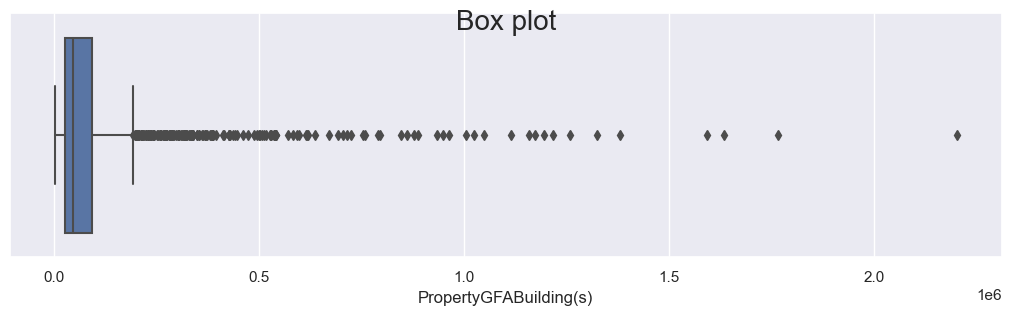

In [290]:
plt.figure(figsize = (10,3),constrained_layout=True)
plt.suptitle("Box plot", size=20, y=1)
sns.boxplot(data=data, x='PropertyGFABuilding(s)')

In [291]:
data.loc[data['PropertyGFABuilding(s)']>1000000,:]

PrimaryPropertyType   Latitude   Longitude  YearBuilt      Neighborhood  \
154                Other  47.595440 -122.331590       1999  GREATER DUWAMISH   
157                Other  47.590850 -122.333540       1999  GREATER DUWAMISH   
168             Hospital  47.603990 -122.323770       2000              EAST   
215         Large Office  47.605050 -122.334270       1983          DOWNTOWN   
227         Large Office  47.605010 -122.329880       1990          DOWNTOWN   
265         Large Office  47.607230 -122.336110       1988          DOWNTOWN   
267         Large Office  47.610540 -122.334660       1989          DOWNTOWN   
286         Large Office  47.610430 -122.332060       1989          DOWNTOWN   
471         Large Office  47.581810 -122.335340       1912  GREATER DUWAMISH   
483         Large Office  47.607400 -122.337770       2005          DOWNTOWN   
549         Large Office  47.604540 -122.330720       1985          DOWNTOWN   
566         Large Office  47.605730 -122.330280       1981          DOWNTOWN   
606             Hospital  47.608951 -122.322402       1994              EAST   
981           University  47.610650 -122.317110       1939              EAST   
1385  Mixed Use Property  47.618110 -122.339080       2009          DOWNTOWN   

      NumberofBuildings  NumberofFloors  PropertyGFAParking  \
154                 1.0               6              327680   
157                 1.0               3                   0   
168                 9.0               8                   0   
215                 1.0              47                   0   
227                 1.0              63              159600   
265                 1.0              55              285000   
267                 1.0              46              512608   
286                 1.0              56              389860   
471                 1.0               6                   0   
483                 1.0              42                   0   
549                 1.0              76              319400   
566                 1.0              42              201121   
606                 7.0              14                   0   
981                 1.0               2                   0   
1385                1.0              19              201857   

      PropertyGFABuilding(s)                 LargestPropertyUseType  \
154                  1258280  Other - Entertainment/Public Assembly   
157                  1172127  Other - Entertainment/Public Assembly   
168                  1158691  Hospital (General Medical & Surgical)   
215                  1323055                                 Office   
227                  1195387                                 Office   
265                  1115000                                 Office   
267                  1023998                                 Office   
286                  1215718                                 Office   
471                  1380959                                 Office   
483                  1592914                                 Office   
549                  1632820                                 Office   
566                  1047934                                 Office   
606                  1765970  Hospital (General Medical & Surgical)   
981                  2200000                     College/University   
1385                 1004813                                 Office   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
154              62160304.0    0.000000e+00         49439914.0   
157              57406988.0    0.000000e+00         40622381.0   
168             296671744.0    1.225750e+08        168683602.0   
215              44683660.0    0.000000e+00         44521844.0   
227              61576184.0    0.000000e+00         61576180.0   
265              55140300.0    2.179488e+06         49472833.0   
267              58506844.0    0.000000e+00         53668061.0   
286              50984500.0    9.156549e+05       

In [292]:
data.loc[data['PropertyGFABuilding(s)']<20000,:]

PrimaryPropertyType  Latitude  Longitude  YearBuilt  \
426                         Other  47.55787 -122.33500       2000   
695            Mixed Use Property  47.61634 -122.35385       2006   
794         Senior Care Community  47.69875 -122.36725       1966   
837   Small- and Mid-Sized Office  47.64976 -122.35684       1989   
887   Small- and Mid-Sized Office  47.62437 -122.33802       1920   
903            Mixed Use Property  47.62230 -122.35653       1964   
997                         Other  47.66984 -122.38420       2004   
1101  Small- and Mid-Sized Office  47.63995 -122.32557       1969   
1299          Distribution Center  47.57227 -122.33843       1952   
1329           Mixed Use Property  47.62774 -122.33384       1988   
1421           Mixed Use Property  47.66160 -122.31393       1976   
1507  Small- and Mid-Sized Office  47.70349 -122.33424       1983   
1514                        Other  47.68750 -122.35496       2004   
1543  Small- and Mid-Sized Office  47.63441 -122.28061       1982   
1650                        Other  47.59905 -122.29787       2013   
1651                        Other  47.69330 -122.37717       2010   
1652                        Other  47.72126 -122.29735       1949   
1653                        Other  47.67295 -122.39228       1911   
1654                        Other  47.67734 -122.37624       1972   
1655                       Office  47.63572 -122.37525       1952   
1658                       Office  47.56440 -122.27813       1960   
1659                        Other  47.54067 -122.37441       1982   
1660                       Office  47.56722 -122.31154       1990   
1661                        Other  47.59625 -122.32283       2004   
1662                        Other  47.63644 -122.35784       1974   
1663           Mixed Use Property  47.52832 -122.32431       1989   
1664           Mixed Use Property  47.53939 -122.29536       1938   

                Neighborhood  NumberofBuildings  NumberofFloors  \
426         GREATER DUWAMISH                1.0               1   
695                 DOWNTOWN                1.0               2   
794                  BALLARD                1.0               2   
837    MAGNOLIA / QUEEN ANNE                1.0               3   
887               LAKE UNION                1.0               3   
903    MAGNOLIA / QUEEN ANNE                1.0               4   
997                  BALLARD                1.0               1   
1101              LAKE UNION                1.0               3   
1299        GREATER DUWAMISH                1.0               1   
1329              LAKE UNION                1.0               2   
1421               NORTHEAST                1.0               2   
1507               NORTHWEST                1.0               3   
1514               NORTHWEST                1.0               1   
1543                    EAST                1.0               3   
1650                 CENTRAL                1.0               1   
1651                 BALLARD                1.0               1   
1652                   NORTH                1.0               1   
1653                 BALLARD                1.0               1   
1654                 BALLARD                1.0               1   
1655   MAGNOLIA / QUEEN ANNE                1.0               1   
1658               SOUTHEAST                1.0               1   
1659  DELRIDGE NEIGHBORHOODS                1.0               1   
1660        GREATER DUWAMISH                1.0               1   
1661                DOWNTOWN                1.0               1   
1662   MAGNOLIA / QUEEN ANNE                1.0               1   
1663        GREATER DUWAMISH                1.0               1   
1664        GREATER DUWAMISH                1.0               1   

      PropertyGFAParking  PropertyGFABuilding(s) LargestPropertyUseType  \
426                41600                   11440                  Other   
695                22867                   10925    So

A noter qu'il y a 27 batiments dont la superficie est inférieure au seuil de l'étude (20 000 sq/ft)

=> Suppression de ces batiments:

In [293]:
data=data.drop(data.loc[data['PropertyGFABuilding(s)']<20000].index)
data.shape

(1613, 16)

Prévoir passage au log pour cette variable

### 3.4.4 GHG Emissions

In [294]:
data.loc[data['TotalGHGEmissions']<=0]

PrimaryPropertyType  Latitude  Longitude  YearBuilt  \
503   Supermarket / Grocery Store  47.63718 -122.37734       2008   
1602  Small- and Mid-Sized Office  47.61432 -122.31257       2013   

               Neighborhood  NumberofBuildings  NumberofFloors  \
503   MAGNOLIA / QUEEN ANNE                1.0               1   
1602                CENTRAL                1.0               6   

      PropertyGFAParking  PropertyGFABuilding(s)     LargestPropertyUseType  \
503                    0                   57176  Supermarket/Grocery Store   
1602                   0                   52000                     Office   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
503            1.284386e+07             0.0                0.0   
1602           2.401321e+05             0.0          -115417.0   

      NaturalGas(kBtu)  TotalGHGEmissions  ENERGYSTARScore  
503                0.0                0.0             31.0  
1602               0.0               -0.8            100.0

#### 3.4.4.1 GHGEmissions<0

In [295]:
df.loc[df['TotalGHGEmissions']<0,:]

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
1605          49784      2016  NonResidential  Small- and Mid-Sized Office   

        PropertyName              Address     City State  ZipCode  \
1605  Bullitt Center  1501 E. Madison St.  Seattle    WA  98122.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
1605                    7234600195                    3      CENTRAL   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
1605  47.61432 -122.31257       2013                1.0               6   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
1605             52000                   0                   52000   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
1605                    Office                 Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
1605                    48159.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
1605                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
1605                             NaN                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
1605            100.0               7.1                 5.0   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
1605                 2.0                  -2.1          342726.0938   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
1605            240132.0938             0.0      -33826.80078   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
1605          -115417.0                 0.0               0.0        False   

      Comments ComplianceStatus Outlier  TotalGHGEmissions  \
1605       NaN        Compliant     NaN               -0.8   

      GHGEmissionsIntensity       build_type EnergyScore_Present  
1605                  -0.02  Non_Résidentiel                   Y

Après vérification, ce batiment est bien un batiment qui produit plus qu'il ne consomme

=> je le conserve

#### 3.4.4.2 GHGEmissions=0
=> pour ce batiment il s'agit d'une valeur manquante (car la conso d'NRJ est bien renseignée)=> a supprimer

In [296]:
data=data.drop(data.loc[data['TotalGHGEmissions']==0].index)
data.shape

(1612, 16)

## 3.5 Traitement des valeurs prises par variables catégorielles

### 3.5.1 Revue des différentes entrées pour PrimaryPropertyType

On voudrait vérifier que l'usage du batiment peut avoir ou a une grande influence sur la conso.

Le but ici est donc de nettoyer si besoin les différentes catégories...

In [297]:
data['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    285
Other                          237
Warehouse                      187
Large Office                   169
K-12 School                    125
Mixed Use Property             107
Retail Store                    91
Hotel                           76
Worship Facility                69
Distribution Center             52
Supermarket / Grocery Store     39
Medical Office                  39
Self-Storage Facility           28
Residence Hall                  21
University                      21
Senior Care Community           19
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             3
Name: PrimaryPropertyType, dtype: int64

Beaucoup de Other => voir comment les integrer dans les autres catégories. 
Essayer de basculer les catégories avec moisn de 10 entrées dans des catégories plus grandes

Analyse à mener aussi sur Mixed Use Property

In [298]:
data['LargestPropertyUseType'].value_counts()

Office                                                  483
Non-Refrigerated Warehouse                              199
K-12 School                                             125
Retail Store                                             99
Other                                                    97
Hotel                                                    76
Worship Facility                                         69
Distribution Center                                      53
Medical Office                                           41
Supermarket/Grocery Store                                40
Parking                                                  30
Self-Storage Facility                                    27
Other - Recreation                                       24
Residence Hall/Dormitory                                 22
Other - Entertainment/Public Assembly                    21
College/University                                       21
Senior Care Community                   

In [299]:
data.loc[data['LargestPropertyUseType'].isna(),:]

PrimaryPropertyType  Latitude  Longitude  YearBuilt  \
347         Self-Storage Facility  47.66838 -122.39310       1946   
819                         Hotel  47.61203 -122.34165       1910   
1348  Small- and Mid-Sized Office  47.64747 -122.34086       2008   
1366                   Restaurant  47.59697 -122.32474       1913   

     Neighborhood  NumberofBuildings  NumberofFloors  PropertyGFAParking  \
347       BALLARD                2.0               2                   0   
819      DOWNTOWN                1.0               8                   0   
1348   LAKE UNION                1.0               4                   0   
1366     DOWNTOWN                1.0               3                   0   

      PropertyGFABuilding(s) LargestPropertyUseType  SiteEnergyUseWN(kBtu)  \
347                   111445                    NaN           6.076957e+06   
819                    61721                    NaN           2.968430e+06   
1348                   48350                    NaN           3.280956e+06   
1366                   28800                    NaN           9.358332e+05   

      SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
347              0.0          3007514.0         2689958.0             163.83   
819              0.0          2534592.0          362488.0              36.92   
1348             0.0          3168131.0               0.0              22.09   
1366             0.0           402907.0          497017.0              29.21   

      ENERGYSTARScore  
347               NaN  
819              93.0  
1348             45.0  
1366              NaN

#### 3.5.1.1 Low-Rise Multifamily

In [300]:
df.loc[df['PrimaryPropertyType']=='Low-Rise Multifamily',:]

OSEBuildingID  DataYear    BuildingType   PrimaryPropertyType  \
632           19445      2016  NonResidential  Low-Rise Multifamily   
912           21481      2016          Campus  Low-Rise Multifamily   
1365          25674      2016  NonResidential  Low-Rise Multifamily   

                PropertyName             Address     City State  ZipCode  \
632           Pacific Pointe  2108 N Pacific St.  Seattle    WA  98103.0   
912          Sanitary Market   1525 FIrst Avenue  Seattle    WA  98101.0   
1365  (ID25674) COMET TAVERN       916 E PIKE ST  Seattle    WA  98122.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
632                     0354000254                    4   LAKE UNION   
912                     1976200210                    7     DOWNTOWN   
1365                    6003500480                    3         EAST   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
632   47.64859 -122.33311       2000                1.0               3   
912   47.60918 -122.34079       1942                1.0               4   
1365  47.61427 -122.31977       1910                1.0               3   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
632              93079               36093                   56986   
912              45500                   0                   45500   
1365             32100                   0                   32100   

                              ListOfAllPropertyUseTypes  \
632                                 Multifamily Housing   
912   Bar/Nightclub, Food Sales, Multifamily Housing...   
1365                 Bar/Nightclub, Multifamily Housing   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
632     Multifamily Housing                    91064.0   
912     Multifamily Housing                    22669.0   
1365    Multifamily Housing                    21400.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
632                           NaN                              NaN   
912                  Retail Store                          10455.0   
1365                Bar/Nightclub                          10700.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
632                          NaN                             NaN   
912                   Restaurant                          3668.0   
1365                         NaN                             NaN   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
632                       NaN             32.0         21.900000   
912                       NaN              NaN         85.199997   
1365                      NaN              NaN          3.400000   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
632            23.000000           63.099998             65.099998   
912            85.199997          267.500000            267.500000   
1365            4.500000            4.300000              5.400000   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
632          1.997182e+06            2090011.625             0.0   
912          3.778355e+06            3778355.000             0.0   
1365         1.082004e+05             142892.500             0.0   

      Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
632       5.111956e+05          1744199.0         2529.819824   
912       1.107372e+06          3778355.0            0.000000   
1365      3.332500e+03            11370.0          968.300171   

      NaturalGas(kBtu)  DefaultData  Comments ComplianceStatus      Outlier  \
632           252982.0        False       NaN        Compliant          NaN   
912                0.0        False       NaN        Compliant          NaN   
1365           96830.0        False       NaN    Non-Compliant  Low outlier   

      TotalGHGEmissions  GHGEmissionsIntensity       build_type  \
632               25.60                   0.28  N

Suppression des 3 'Low-Rise Multifamily' 

=> LargestPropertyUseType = Multifamily housing

=> 2nd largest GFA vide ou < 20000 (hors scope étude)

In [301]:
data=data.drop(data.loc[data['PrimaryPropertyType']=='Low-Rise Multifamily'].index)
data.shape

(1609, 16)

#### 3.5.1.2 Other / Mix use Property
=> A remplacer par LargestPropertyUseType quand c'est possible

In [302]:
data.loc[data['PrimaryPropertyType']=='Other',['PrimaryPropertyType','LargestPropertyUseType']].value_counts()

PrimaryPropertyType  LargestPropertyUseType                              
Other                Other                                                   87
                     Other - Recreation                                      21
                     Other - Entertainment/Public Assembly                   18
                     Parking                                                 16
                     Social/Meeting Hall                                      8
                     Manufacturing/Industrial Plant                           8
                     Repair Services (Vehicle, Shoe, Locksmith, etc)          6
                     Other - Lodging/Residential                              5
                     Strip Mall                                               5
                     Other - Services                                         5
                     Automobile Dealership                                    5
                     Museum                   

In [303]:
data.loc[data['PrimaryPropertyType']=='Mixed Use Property',['PrimaryPropertyType','LargestPropertyUseType']].value_counts()


PrimaryPropertyType  LargestPropertyUseType               
Mixed Use Property   Office                                   30
                     Parking                                  14
                     Non-Refrigerated Warehouse               12
                     Retail Store                              9
                     Multifamily Housing                       9
                     Other                                     9
                     Other - Entertainment/Public Assembly     3
                     Laboratory                                3
                     Other - Recreation                        3
                     Fitness Center/Health Club/Gym            2
                     Supermarket/Grocery Store                 2
                     Other - Education                         2
                     Medical Office                            2
                     Other - Restaurant/Bar                    1
                     Residence 

In [304]:
data.loc[(data['PrimaryPropertyType']=='Mixed Use Property')|(data['PrimaryPropertyType']=='Other'),['PrimaryPropertyType','LargestPropertyUseType']].value_counts()


PrimaryPropertyType  LargestPropertyUseType                              
Other                Other                                                   87
Mixed Use Property   Office                                                  30
Other                Other - Recreation                                      21
                     Other - Entertainment/Public Assembly                   18
                     Parking                                                 16
Mixed Use Property   Parking                                                 14
                     Non-Refrigerated Warehouse                              12
                     Retail Store                                             9
                     Multifamily Housing                                      9
                     Other                                                    9
Other                Manufacturing/Industrial Plant                           8
                     Social/Meeting Hall      

In [305]:
data.loc[(data['PrimaryPropertyType']=='Mixed Use Property')|(data['PrimaryPropertyType']=='Other'),['LargestPropertyUseType']].value_counts()


LargestPropertyUseType                              
Other                                                   96
Parking                                                 30
Office                                                  30
Other - Recreation                                      24
Other - Entertainment/Public Assembly                   21
Non-Refrigerated Warehouse                              12
Social/Meeting Hall                                      9
Retail Store                                             9
Multifamily Housing                                      9
Manufacturing/Industrial Plant                           8
Strip Mall                                               6
Repair Services (Vehicle, Shoe, Locksmith, etc)          6
Automobile Dealership                                    5
Other - Services                                         5
Other - Lodging/Residential                              5
Fitness Center/Health Club/Gym                           5
Mus

Création d'un dictionnaire pour effectuer le remplacement et réduire le nb de catégories

In [306]:
cat=df.loc[(df['PrimaryPropertyType']=='Mixed Use Property')|(df['PrimaryPropertyType']=='Other'),['LargestPropertyUseType']].value_counts()
cat.index

MultiIndex([(                                               'Other',),
            (                                  'Other - Recreation',),
            (                                              'Office',),
            (                                             'Parking',),
            (               'Other - Entertainment/Public Assembly',),
            (                          'Non-Refrigerated Warehouse',),
            (                                 'Social/Meeting Hall',),
            (                                        'Retail Store',),
            (                                 'Multifamily Housing',),
            (                      'Manufacturing/Industrial Plant',),
            (     'Repair Services (Vehicle, Shoe, Locksmith, etc)',),
            (                                          'Strip Mall',),
            (                                    'Other - Services',),
            (                      'Fitness Center/Health Club/Gym',),
      

In [307]:
cat={
    'Other - Recreation':                               'Entertainment',
    'Other - Entertainment/Public Assembly':            'Entertainment',
    'Parking':                                          'Parking',
    'Non-Refrigerated Warehouse':                       'Warehouse',
    'Social/Meeting Hall':                              'Entertainment',
    'Retail Store':                                     'Retail Store', 
    'Multifamily Housing':                              'Other',
    'Manufacturing/Industrial Plant':                   'Other',
    'Repair Services (Vehicle, Shoe, Locksmith, etc)':  'Retail Store',
    'Other - Lodging/Residential':                      'Hotel',
    'Museum':                                           'Entertainment',
    'Strip Mall':                                       'Supermarket / Grocery Store',                                        
    'Other - Services':                                 'Small- and Mid-Sized Office',
    'Automobile Dealership':                            'Retail Store',
    'Other/Specialty Hospital':                         'Hospital',
    'Other - Mall':                                     'Supermarket / Grocery Store',
    'Urgent Care/Clinic/Other Outpatient':              'Hospital',
    'Financial Office':                                 'Small- and Mid-Sized Office',
    'Library':                                          'Entertainment',
    'Data Center':                                      'Other',
    'Bank Branch':                                      'Small- and Mid-Sized Office',                                              
    'Prison/Incarceration':                             'Other',
    'Supermarket/Grocery Store':                        'Supermarket / Grocery Store',
    'Restaurant':                                       'Restaurant',
    'Fitness Center/Health Club/Gym':                   'Retail Store',
    'Performing Arts':                                  'Entertainment',
    'Pre-school/Daycare':                               'K-12 School',
    'Medical Office':                                   'Medical Office',
    'Other - Education':                                'K-12 School',
    'Adult Education':                                  'University',
    'Other - Utility':                                       'Small- and Mid-Sized Office',                                          
    'Other - Public Services':                               'Other',
    'Lifestyle Center':                                      'Supermarket / Grocery Store',
    'Distribution Center':                                   'Distribution Center',
    'Fire Station':                                          'Other',
    'Personal Services (Health/Beauty, Dry Cleaning, etc)':  'Retail Store',
    'Police Station':                                        'Other',                                           
    'Food Service':                                          'Restaurant',
    'Other - Restaurant/Bar':                                'Restaurant',
    'Courthouse':                                            'Other',                                               
    'Residence Hall/Dormitory':                              'Residence Hall',
    'Hotel':                                                 'Hotel',
    'Residential Care Facility':                             'Senior Care Community',
    'Convention Center':                                     'Entertainment',
    'Movie Theater':                                         'Entertainment',
    'Office':                                                'Office',
    'Laboratory':                                            'Laboratory',
    'Other':                                                 'Other'
}

Ci dessous plusieurs filtres dans le dataset source (df) pour récupérer différentes info pour alimentation du dictionnaire ci dessus 

In [308]:
df.loc[df['LargestPropertyUseType']=='Other - Services',:]

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
352             504      2016  Nonresidential COS               Other   
768           20541      2016      NonResidential               Other   
851           21218      2016  Nonresidential COS               Other   
1063          23120      2016      NonResidential               Other   
1529          27891      2016      NonResidential               Other   

                     PropertyName                 Address     City State  \
352                    Westbridge  4209 W Marginal Way SW  Seattle    WA   
768   (ID20541) MYCON'S USED CARS      3711 RAINIER AVE S  Seattle    WA   
851               HLF FFD VMG (A)    12645 Ashworth Ave N  Seattle    WA   
1063   (ID23120) WASTE MANAGEMENT          8111 1ST AVE S  Seattle    WA   
1529                University VW   4724 Roosevelt Way NE  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
352   98118.0                    1824049020                    1     DELRIDGE   
768   98144.0                    1624049229                    2    SOUTHEAST   
851   98133.0                    1926049286                    5    NORTHWEST   
1063  98108.0                    3124049151                    1     DELRIDGE   
1529  98105.0                    6746701575                    4    NORTHEAST   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
352   47.56548 -122.35378       1955                0.0               1   
768   47.56979 -122.29234       1963                1.0               2   
851   47.72134 -122.34102       1958                1.0               2   
1063  47.52956 -122.33592       1971                1.0               1   
1529  47.66386 -122.31715       1924                1.0               2   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
352             113780                   0                  113780   
768              20047                   0                   20047   
851              26994                   0                   26994   
1063             26232                   0                   26232   
1529             21600                   0                   21600   

           ListOfAllPropertyUseTypes LargestPropertyUseType  \
352         Office, Other - Services       Other - Services   
768                 Other - Services       Other - Services   
851         Office, Other - Services       Other - Services   
1063        Office, Other - Services       Other - Services   
1529  Other - Services, Retail Store       Other - Services   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
352                     91532.0                       Office   
768                     20047.0                          NaN   
851                     16243.0                       Office   
1063                    18262.0                       Office   
1529                    32580.0                 Retail Store   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
352                           22248.0                         NaN   
768                               NaN                         NaN   
851                           10751.0                         NaN   
1063                           7970.0                         NaN   
1529                           9650.0                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
352                              NaN                      NaN   
768                              NaN                      NaN   
851                              NaN                      NaN   
1063                             NaN                      NaN   
1529                             NaN                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
352               NaN         31.400000           35.299999   
768               NaN          5.900000            6.40

In [309]:
df.loc[df['LargestPropertyUseType']=='Data Center',:]

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
234             365      2016  NonResidential               Other   
548             753      2016  NonResidential               Other   
1603          49780      2016  NonResidential               Other   

                      PropertyName               Address     City State  \
234           UW Tower Data Center  4333 BROOKLYN AVE NE  Seattle    WA   
548                 WestinBuilding          2001 6th Ave  Seattle    WA   
1603  2020 Fifth Avenue Dat Center     2020 Fifth Avenue  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
234   98185.0                    1142000290                    4    NORTHEAST   
548   98121.0                    0659000950                    7     DOWNTOWN   
1603  98121.0                    0659000905                    7     DOWNTOWN   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
234   47.66060 -122.31512       1969                1.0               5   
548   47.61438 -122.33871       1981                1.0              33   
1603  47.61449 -122.33956       1975                1.0               7   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
234              36000                   0                   36000   
548             429405                   0                  429405   
1603             90679               35120                   55559   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
234                Data Center            Data Center   
548        Data Center, Office            Data Center   
1603      Data Center, Parking            Data Center   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
234                     36000.0                          NaN   
548                    218997.0                       Office   
1603                    60000.0                      Parking   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
234                               NaN                         NaN   
548                          210409.0                         NaN   
1603                          30700.0                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
234                              NaN         2016201520142013   
548                              NaN                      NaN   
1603                             NaN                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
234              96.0        834.400024          834.400024   
548              98.0        639.700012          639.799988   
1603            100.0        694.700012          694.700012   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
234          2620.000000           2620.000000           30038490.0   
548          2007.900024           2008.000000          274682208.0   
1603         2181.300049           2181.300049           41680640.0   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
234              30038490.0             0.0         8803777.0   
548             274725984.0             0.0        80460872.0   
1603             41680640.0             0.0        12215895.0   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
234          30038487.0            0.000000               0.0        False   
548         274532495.0         1496.720215          149672.0        False   
1603         41680634.0            0.000000               0.0        False   

      Comments ComplianceStatus Outlier  TotalGHGEmissions  \
234        NaN        Compliant     NaN             209.41   
548        NaN        Compliant     NaN            1921.82   
1603       NaN        Compliant     NaN             290.57   

      GHGEmissionsIntensity       build_type EnergyScore_Present  
234                    5.82  Non_Résidentiel                   Y  
54

Certes gros consommateur et emetteur de CO2, je fais pointer les Data Center sur Other (uniquement 3 occurences)

In [310]:
df.loc[(df['PrimaryPropertyType']=='Mixed Use Property')&(df['LargestPropertyUseType']=='Multifamily Housing'),:]

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
163             264      2016  NonResidential  Mixed Use Property   
827           21122      2016  NonResidential  Mixed Use Property   
1096          23562      2016  NonResidential  Mixed Use Property   
1317          25222      2016  NonResidential  Mixed Use Property   
1338          25522      2016  NonResidential  Mixed Use Property   
1454          26834      2016  NonResidential  Mixed Use Property   
1525          27838      2016  NonResidential  Mixed Use Property   
1537          27969      2016  NonResidential  Mixed Use Property   
1550          29170      2016  NonResidential  Mixed Use Property   

                                 PropertyName  \
163                                   TriBeCa   
827            Fremont Court-Equinox Building   
1096                      The Travelers Hotel   
1317                                  Olive 8   
1338                                YouthCare   
1454  (ID26834) SOO YUEN ASSOCIATION BUILDING   
1525                         Madison Crossing   
1537               1700 Madison Apts. Bldg. 2   
1550        Chief Seattle Club/Monterey Lofts   

                              Address     City State  ZipCode  \
163                     516 1st Ave W  Seattle    WA  98119.0   
827              3424 Fremont Ave. N.  Seattle    WA  98103.0   
1096                    80 Yesler Way  Seattle    WA  98104.0   
1317                    737 Olive Way  Seattle    WA  98101.0   
1338                 5401 26th Ave NE  Seattle    WA  98105.0   
1454                525 MAYNARD AVE S  Seattle    WA  98104.0   
1525              1600 E. Madison St.  Seattle    WA  98122.0   
1537                1700 E Madison St  Seattle    WA  98122.0   
1550  410 2nd Avenue Extenstion South  Seattle    WA  98104.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
163                     8681450000                    7   
827                     1972202755                    6   
1096                    8670450000                    7   
1317                    6364000000                    7   
1338                    9191201460                    4   
1454                    5247801900                    2   
1525                    7234600515                    3   
1537                    7234601100                    3   
1550                    1562700010                    3   

               Neighborhood   Latitude   Longitude  YearBuilt  \
163   MAGNOLIA / QUEEN ANNE  47.623900 -122.357560       2002   
827              LAKE UNION  47.650200 -122.349590       2001   
1096               DOWNTOWN  47.601950 -122.335160       1913   
1317               DOWNTOWN  47.613760 -122.334450       2009   
1338              NORTHEAST  47.668270 -122.299780       1997   
1454               DOWNTOWN  47.597690 -122.325370       1909   
1525                   EAST  47.615540 -122.310980       1998   
1537                Central  47.616080 -122.309670       2004   
1550                   EAST  47.599016 -122.331508       1900   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
163                 1.0               4            110785                   0   
827                 5.0               3             41827                9226   
1096                1.0               3             43878                   0   
1317                1.0              39           1074552              112124   
1338                1.0               4             32282                6985   
1454                1.0               3             20620                   0   
1525                1.0               5             53034               14625   
1537                1.0               6             97229                   0   
1550                1.0               3             22168                   0   

      PropertyGFABuilding(s)  \
163                   110785   
827                    32601   
1096                   4

Je conserve les Multifamily Housing à ce stade et les fait pointer sur Other. Point possible d'amélioration pour affiner le jeu de donnée. Non fait dans le cadre de ce projet. En effet certains pourraient être supprimés (car habitation uniquement) d'autres pas (car usage secondaire non résidentiel)

In [311]:
data['LargestPropertyUseType']

0                    Hotel
1                    Hotel
2                    Hotel
3                    Hotel
4                    Hotel
               ...        
1647            Laboratory
1648    College/University
1649    Other - Recreation
1656    Other - Recreation
1657    Other - Recreation
Name: LargestPropertyUseType, Length: 1609, dtype: object

In [312]:
data.loc[(data['PrimaryPropertyType']=='Other')|(data['PrimaryPropertyType']=='Mixed Use Property'),
         ['PrimaryPropertyType']]=data['LargestPropertyUseType'].map(cat,)

In [313]:
data.loc[data['PrimaryPropertyType'].isna()]

Empty DataFrame
Columns: [PrimaryPropertyType, Latitude, Longitude, YearBuilt, Neighborhood, NumberofBuildings, NumberofFloors, PropertyGFAParking, PropertyGFABuilding(s), LargestPropertyUseType, SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu), TotalGHGEmissions, ENERGYSTARScore]
Index: []

Suppression de la colonne LargestPropertyUseType

In [314]:
data.drop(columns='LargestPropertyUseType',axis =1,inplace= True)
data

PrimaryPropertyType  Latitude  Longitude  YearBuilt Neighborhood  \
0                  Hotel  47.61220 -122.33799       1927     DOWNTOWN   
1                  Hotel  47.61317 -122.33393       1996     DOWNTOWN   
2                  Hotel  47.61393 -122.33810       1969     DOWNTOWN   
3                  Hotel  47.61412 -122.33664       1926     DOWNTOWN   
4                  Hotel  47.61375 -122.34047       1980     DOWNTOWN   
...                  ...       ...        ...        ...          ...   
1647          Laboratory  47.62497 -122.33883       2015   LAKE UNION   
1648          University  47.66127 -122.31256       1962    NORTHEAST   
1649       Entertainment  47.70541 -122.32232       2005        NORTH   
1656       Entertainment  47.63228 -122.31574       1912         EAST   
1657       Entertainment  47.60775 -122.30225       1994      CENTRAL   

      NumberofBuildings  NumberofFloors  PropertyGFAParking  \
0                   1.0              12                   0   
1                   1.0              11               15064   
2                   1.0              41              196718   
3                   1.0              10                   0   
4                   1.0              18               62000   
...                 ...             ...                 ...   
1647                1.0               6               85028   
1648                1.0               1                   0   
1649                1.0               1                   0   
1656                1.0               1                   0   
1657                1.0               1                   0   

      PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
0                      88434           7.456910e+06      2003882.00   
1                      88502           8.664479e+06            0.00   
2                     759392           7.393711e+07     21566554.00   
3                      61320           6.946800e+06      2214446.25   
4                     113580           1.465650e+07            0.00   
...                      ...                    ...             ...   
1647                  260262           4.107860e+07            0.00   
1648                   68072           3.180819e+06            0.00   
1649                   20616           6.369655e+05            0.00   
1656                   23445           6.716330e+06            0.00   
1657                   20050           1.993137e+06            0.00   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  ENERGYSTARScore  
0          3.946027e+06      1.276453e+06             249.98             60.0  
1          3.242851e+06      5.145082e+06             295.86             61.0  
2          4.952666e+07      1.493800e+06            2089.28             43.0  
3          2.768924e+06      1.811213e+06             286.43             56.0  
4          5.368607e+06      8.803998e+06             505.01             75.0  
...                 ...               ...                ...              ...  
1647       2.363680e+07      1.572731e+07            1000.06              NaN  
1648       3.180819e+06      0.000000e+00              22.17              NaN  
1649       6.369655e+05      0.000000e+00               4.44              NaN  
1656       1.260870e+06      4.715376e+06             259.22              NaN  
1657       7.694531e+05      1.043951e+06              60.81              NaN  

[1609 rows x 15 columns]

### 3.5.2 Revue des différentes entrées pour Neighborhood


In [315]:
data['Neighborhood'].value_counts()

DOWNTOWN                 352
GREATER DUWAMISH         341
MAGNOLIA / QUEEN ANNE    143
LAKE UNION               143
NORTHEAST                122
EAST                     119
NORTHWEST                 78
BALLARD                   57
NORTH                     55
CENTRAL                   47
SOUTHEAST                 44
DELRIDGE                  41
SOUTHWEST                 40
North                      9
Ballard                    6
Delridge                   4
Northwest                  4
Central                    4
Name: Neighborhood, dtype: int64

On passe les min en maj...

In [316]:
data['Neighborhood']=data['Neighborhood'].str.upper()
data['Neighborhood'].value_counts()

DOWNTOWN                 352
GREATER DUWAMISH         341
LAKE UNION               143
MAGNOLIA / QUEEN ANNE    143
NORTHEAST                122
EAST                     119
NORTHWEST                 82
NORTH                     64
BALLARD                   63
CENTRAL                   51
DELRIDGE                  45
SOUTHEAST                 44
SOUTHWEST                 40
Name: Neighborhood, dtype: int64

### 3.5.3 Sauvegarde de ce dataset avant Feature Engineering=> dataV1
- Servira pour notre baseline (notebook 2 et 3).
- Supprimer de cette version les features conso de gaz, electricité et vapeur. Ces features que nous ne sommmes pas censé"s connaitre precisemment seront utilisées dans le cadre du feature engineering (en booléen (V2) puis en %age approximatif (V3)

In [317]:
dataV1=data.copy()


In [318]:
dataV1.drop(columns=['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)'],axis =1,inplace= True)
dataV1

PrimaryPropertyType  Latitude  Longitude  YearBuilt Neighborhood  \
0                  Hotel  47.61220 -122.33799       1927     DOWNTOWN   
1                  Hotel  47.61317 -122.33393       1996     DOWNTOWN   
2                  Hotel  47.61393 -122.33810       1969     DOWNTOWN   
3                  Hotel  47.61412 -122.33664       1926     DOWNTOWN   
4                  Hotel  47.61375 -122.34047       1980     DOWNTOWN   
...                  ...       ...        ...        ...          ...   
1647          Laboratory  47.62497 -122.33883       2015   LAKE UNION   
1648          University  47.66127 -122.31256       1962    NORTHEAST   
1649       Entertainment  47.70541 -122.32232       2005        NORTH   
1656       Entertainment  47.63228 -122.31574       1912         EAST   
1657       Entertainment  47.60775 -122.30225       1994      CENTRAL   

      NumberofBuildings  NumberofFloors  PropertyGFAParking  \
0                   1.0              12                   0   
1                   1.0              11               15064   
2                   1.0              41              196718   
3                   1.0              10                   0   
4                   1.0              18               62000   
...                 ...             ...                 ...   
1647                1.0               6               85028   
1648                1.0               1                   0   
1649                1.0               1                   0   
1656                1.0               1                   0   
1657                1.0               1                   0   

      PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  TotalGHGEmissions  \
0                      88434           7.456910e+06             249.98   
1                      88502           8.664479e+06             295.86   
2                     759392           7.393711e+07            2089.28   
3                      61320           6.946800e+06             286.43   
4                     113580           1.465650e+07             505.01   
...                      ...                    ...                ...   
1647                  260262           4.107860e+07            1000.06   
1648                   68072           3.180819e+06              22.17   
1649                   20616           6.369655e+05               4.44   
1656                   23445           6.716330e+06             259.22   
1657                   20050           1.993137e+06              60.81   

      ENERGYSTARScore  
0                60.0  
1                61.0  
2                43.0  
3                56.0  
4                75.0  
...               ...  
1647              NaN  
1648              NaN  
1649              NaN  
1656              NaN  
1657              NaN  

[1609 rows x 12 columns]

In [319]:
dataV1.to_csv('C:/Users/xavie/P4/dataV1.csv', index=False)

## 3.6 Feature Enginering

La création des variables suivantes pourraient permettre d'améliorer les performances des estimateurs lors de la  phase d'apprentissage supervisé

### 3.6.1 'Booléanisation' des features gaz, steam et electricité, parking

Connaissant le type d'energie utilisée, on pourra se servir de cette information pour estimer la conso des batiments
Transfor da la donnée surface du parking pour voir la simple indcationd e la présnece d'un parking ou non peut améliorer le modèle

In [320]:
dataV2=data.copy()

In [321]:
for col in ['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','PropertyGFAParking']:
    dataV2[col]=(dataV2[col]>0).astype(int)

In [322]:
dataV2[['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','PropertyGFAParking']]

SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  PropertyGFAParking
0                  1                  1                 1                   0
1                  0                  1                 1                   1
2                  1                  1                 1                   1
3                  1                  1                 1                   0
4                  0                  1                 1                   1
...              ...                ...               ...                 ...
1647               0                  1                 1                   1
1648               0                  1                 0                   0
1649               0                  1                 0                   0
1656               0                  1                 1                   0
1657               0                  1                 1                   0

[1609 rows x 4 columns]

Renommons les nouvelles colonnes:

In [323]:
dataV2.rename(columns={'SteamUse(kBtu)': 'Steam_use', 
                    'Electricity(kBtu)': 'Electricity_use',
                    'NaturalGas(kBtu)':'Gas_use',
                    'PropertyGFAParking':'has_parking'
                    }, inplace=True) #'PropertyGFAParking':'has_parking'
dataV2

PrimaryPropertyType  Latitude  Longitude  YearBuilt Neighborhood  \
0                  Hotel  47.61220 -122.33799       1927     DOWNTOWN   
1                  Hotel  47.61317 -122.33393       1996     DOWNTOWN   
2                  Hotel  47.61393 -122.33810       1969     DOWNTOWN   
3                  Hotel  47.61412 -122.33664       1926     DOWNTOWN   
4                  Hotel  47.61375 -122.34047       1980     DOWNTOWN   
...                  ...       ...        ...        ...          ...   
1647          Laboratory  47.62497 -122.33883       2015   LAKE UNION   
1648          University  47.66127 -122.31256       1962    NORTHEAST   
1649       Entertainment  47.70541 -122.32232       2005        NORTH   
1656       Entertainment  47.63228 -122.31574       1912         EAST   
1657       Entertainment  47.60775 -122.30225       1994      CENTRAL   

      NumberofBuildings  NumberofFloors  has_parking  PropertyGFABuilding(s)  \
0                   1.0              12            0                   88434   
1                   1.0              11            1                   88502   
2                   1.0              41            1                  759392   
3                   1.0              10            0                   61320   
4                   1.0              18            1                  113580   
...                 ...             ...          ...                     ...   
1647                1.0               6            1                  260262   
1648                1.0               1            0                   68072   
1649                1.0               1            0                   20616   
1656                1.0               1            0                   23445   
1657                1.0               1            0                   20050   

      SiteEnergyUseWN(kBtu)  Steam_use  Electricity_use  Gas_use  \
0              7.456910e+06          1                1        1   
1              8.664479e+06          0                1        1   
2              7.393711e+07          1                1        1   
3              6.946800e+06          1                1        1   
4              1.465650e+07          0                1        1   
...                     ...        ...              ...      ...   
1647           4.107860e+07          0                1        1   
1648           3.180819e+06          0                1        0   
1649           6.369655e+05          0                1        0   
1656           6.716330e+06          0                1        1   
1657           1.993137e+06          0                1        1   

      TotalGHGEmissions  ENERGYSTARScore  
0                249.98             60.0  
1                295.86             61.0  
2               2089.28             43.0  
3                286.43             56.0  
4                505.01             75.0  
...                 ...              ...  
1647            1000.06              NaN  
1648              22.17              NaN  
1649               4.44              NaN  
1656             259.22              NaN  
1657              60.81              NaN  

[1609 rows x 15 columns]

In [324]:
dataV2.to_csv('C:/Users/xavie/P4/dataV2.csv', index=False)

### 3.6.2 Création de nouvelles variables:
 - 'superficie/étage',
 - 'superficie/batiment'
 - 'NRJ rate' (conso/superficie building)
 - '%age superficie parking'

Feautures à utiliser dans une dernière iteration de l'amélioration du modèle de prédiction des targets.

Nous verrons si l'ajout de ces nouvelles features aura uen influence sur les résultats de l'apprentissage.

A noter que la variable NRJ rate ne sera/ ne pourra pas être utilisée lors de l'apprentissage. En effet est elle est fabriquée sur la base d'une des 2 targets

In [325]:
data['superfice/etage']=data['PropertyGFABuilding(s)']/data['NumberofFloors']

In [326]:
data['superfice/batiment']=data['PropertyGFABuilding(s)']/data['NumberofBuildings']

In [327]:
data['_NRJ_rate']=data['SiteEnergyUseWN(kBtu)']/data['PropertyGFABuilding(s)']

In [328]:
data['Parking_pct']=data['PropertyGFAParking']/(data['PropertyGFABuilding(s)']+data['PropertyGFAParking'])
data['Parking_pct'].describe()

count    1609.000000
mean        0.058426
std         0.134896
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.798167
Name: Parking_pct, dtype: float64

### Création des variables indiquant le %age d'énergie utilisée
Dans la mesure où des relevés de conso seront effectués dans l'année suivant la livraison des nouveaux batiments, on aura en plus de l'estimation fournie par l'architecte, une bonne idée de la consommation en gaz, en electricité ou en vapeur.
On peut donc se baser sur un pourcentage d'utilisation du type d'enrgie pour estimer la conso future.
Le pourcentage est arrondi au au dixieme pour ne pas sur entrainer le modèle

In [329]:
data['pct_gaz']=(data['NaturalGas(kBtu)']/(data['SteamUse(kBtu)']+data[('Electricity(kBtu)')]+data['NaturalGas(kBtu)'])).round(1)

In [330]:
data['pct_elec']=(data['Electricity(kBtu)']/(data['SteamUse(kBtu)']+data[('Electricity(kBtu)')]+data['NaturalGas(kBtu)'])).round(1)

In [331]:
data['pct_steam']=(data['SteamUse(kBtu)']/(data['SteamUse(kBtu)']+data[('Electricity(kBtu)')]+data['NaturalGas(kBtu)'])).round(1)

In [332]:
dataV3=data.copy()

Suppression de dataV3 des colonnes qui ne seront pas utilisées dans la dernière itération de l'amélioration de l'apprentissage

In [333]:
dataV3.drop(columns=['_NRJ_rate','Neighborhood','PropertyGFAParking','PropertyGFAParking','SteamUse(kBtu)',
                     'Electricity(kBtu)','NaturalGas(kBtu)']
            ,axis =1,inplace= True)
dataV3

PrimaryPropertyType  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0                  Hotel  47.61220 -122.33799       1927                1.0   
1                  Hotel  47.61317 -122.33393       1996                1.0   
2                  Hotel  47.61393 -122.33810       1969                1.0   
3                  Hotel  47.61412 -122.33664       1926                1.0   
4                  Hotel  47.61375 -122.34047       1980                1.0   
...                  ...       ...        ...        ...                ...   
1647          Laboratory  47.62497 -122.33883       2015                1.0   
1648          University  47.66127 -122.31256       1962                1.0   
1649       Entertainment  47.70541 -122.32232       2005                1.0   
1656       Entertainment  47.63228 -122.31574       1912                1.0   
1657       Entertainment  47.60775 -122.30225       1994                1.0   

      NumberofFloors  PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  \
0                 12                   88434           7.456910e+06   
1                 11                   88502           8.664479e+06   
2                 41                  759392           7.393711e+07   
3                 10                   61320           6.946800e+06   
4                 18                  113580           1.465650e+07   
...              ...                     ...                    ...   
1647               6                  260262           4.107860e+07   
1648               1                   68072           3.180819e+06   
1649               1                   20616           6.369655e+05   
1656               1                   23445           6.716330e+06   
1657               1                   20050           1.993137e+06   

      TotalGHGEmissions  ENERGYSTARScore  superfice/etage  superfice/batiment  \
0                249.98             60.0      7369.500000             88434.0   
1                295.86             61.0      8045.636364             88502.0   
2               2089.28             43.0     18521.756098            759392.0   
3                286.43             56.0      6132.000000             61320.0   
4                505.01             75.0      6310.000000            113580.0   
...                 ...              ...              ...                 ...   
1647            1000.06              NaN     43377.000000            260262.0   
1648              22.17              NaN     68072.000000             68072.0   
1649               4.44              NaN     20616.000000             20616.0   
1656             259.22              NaN     23445.000000             23445.0   
1657              60.81              NaN     20050.000000             20050.0   

      Parking_pct  pct_gaz  pct_elec  pct_steam  
0        0.000000      0.2       0.5        0.3  
1        0.145453      0.6       0.4        0.0  
2        0.205748      0.0       0.7        0.3  
3        0.000000      0.3       0.4        0.3  
4        0.353115      0.6       0.4        0.0  
...           ...      ...       ...        ...  
1647     0.246251      0.4       0.6        0.0  
1648     0.000000      0.0       1.0        0.0  
1649     0.000000      0.0       1.0        0.0  
1656     0.000000      0.8       0.2        0.0  
1657     0.000000      0.6       0.4        0.0  

[1609 rows x 16 columns]

In [334]:
dataV3.to_csv('C:/Users/xavie/P4/dataV3.csv', index=False)

# 4. Analyse exploratoire des données 

In [335]:
data.describe()

Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  1609.000000  1609.000000  1609.000000        1609.000000   
mean     47.615490  -122.332787  1961.587943           1.138595   
std       0.048003     0.024352    32.836564           1.162241   
min      47.499170  -122.411820  1900.000000           1.000000   
25%      47.585130  -122.342740  1930.000000           1.000000   
50%      47.612200  -122.332890  1965.000000           1.000000   
75%      47.649090  -122.321800  1989.000000           1.000000   
max      47.733870  -122.258640  2015.000000          27.000000   

       NumberofFloors  PropertyGFAParking  PropertyGFABuilding(s)  \
count     1609.000000         1609.000000            1.609000e+03   
mean         4.113735        13025.842138            1.012731e+05   
std          6.201137        42820.428569            1.720835e+05   
min          1.000000            0.000000            2.000000e+04   
25%          1.000000            0.000000            2.880000e+04   
50%          2.000000            0.000000            4.769900e+04   
75%          4.000000            0.000000            9.599500e+04   
max         76.000000       512608.000000            2.200000e+06   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
count           1.609000e+03    1.609000e+03       1.609000e+03   
mean            8.294142e+06    4.693533e+05       5.560992e+06   
std             2.237632e+07    5.192520e+06       1.351268e+07   
min             1.726000e+04    0.000000e+00      -1.154170e+05   
25%             1.376059e+06    0.000000e+00       7.437060e+05   
50%             2.789899e+06    0.000000e+00       1.640689e+06   
75%             7.378420e+06    0.000000e+00       5.004995e+06   
max             4.716139e+08    1.349435e+08       2.745325e+08   

       NaturalGas(kBtu)  TotalGHGEmissions  ENERGYSTARScore  superfice/etage  \
count      1.609000e+03        1609.000000      1073.000000     1.609000e+03   
mean       2.010779e+06         181.788807        65.461323     3.453762e+04   
std        9.526385e+06         713.856677        28.519642     6.095074e+04   
min        0.000000e+00          -0.800000         1.000000     3.230769e+03   
25%        0.000000e+00          20.660000        48.000000     1.259867e+04   
50%        5.296180e+05          50.760000        73.000000     2.154333e+04   
75%        1.532059e+06         144.410000        89.000000     3.470000e+04   
max        2.979090e+08       16870.980000       100.000000     1.100000e+06   

       superfice/batiment    _NRJ_rate  Parking_pct     pct_gaz     pct_elec  \
count        1.609000e+03  1609.000000  1609.000000  1609.00000  1609.000000   
mean         9.536001e+04    77.073854     0.058426     0.27918     0.699378   
std          1.609997e+05    80.481852     0.134896     0.26651     0.264927   
min          4.300000e+03     0.417628     0.000000     0.00000     0.000000   
25%          2.829600e+04    35.990269     0.000000     0.00000     0.500000   
50%          4.634000e+04    54.389947     0.000000     0.20000     0.700000   
75%          9.164900e+04    87.021778     0.000000     0.50000     1.000000   
max          2.200000e+06   953.072956     0.798167     1.00000     1.000000   

         pct_steam  
count  1609.000000  
mean      0.021628  
std       0.093333  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       0.800000

In [336]:
data.describe(include=object)

PrimaryPropertyType Neighborhood
count                          1609         1609
unique                           22           13
top     Small- and Mid-Sized Office     DOWNTOWN
freq                            299          352

In [337]:
if DISPLAY:
    sns.pairplot(data, corner=True)

## 4.1 Distribution des targets (SiteEnergyUseWN(kBtu) et GHGEmissions)

<AxesSubplot:xlabel='SiteEnergyUseWN(kBtu)', ylabel='Count'>

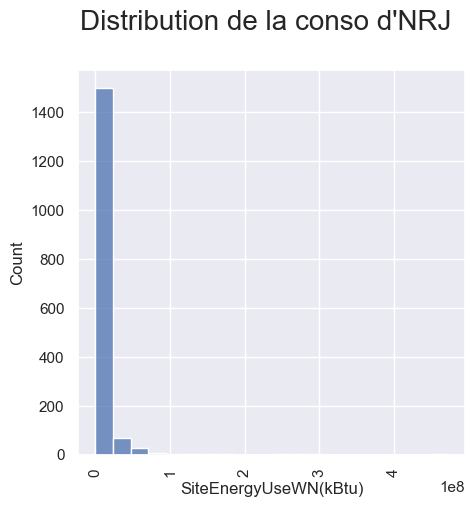

In [338]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution de la conso d'NRJ", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(data['SiteEnergyUseWN(kBtu)'], bins =20)#, stat='percent' #, kde=True)

<AxesSubplot:xlabel='SiteEnergyUseWN(kBtu)'>

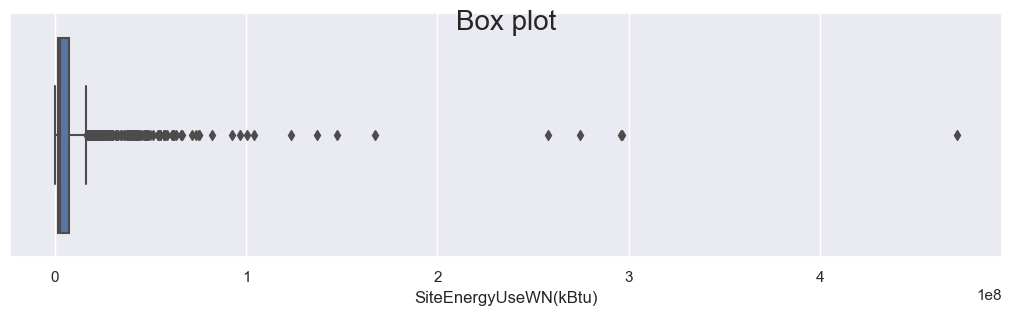

In [339]:
plt.figure(figsize = (10,3),constrained_layout=True)
plt.suptitle("Box plot", size=20, y=1)
sns.boxplot(data=data, x='SiteEnergyUseWN(kBtu)')

Target à passer au log dans le cadre du ML

<AxesSubplot:xlabel='SiteEnergyUseWN(kBtu)', ylabel='Count'>

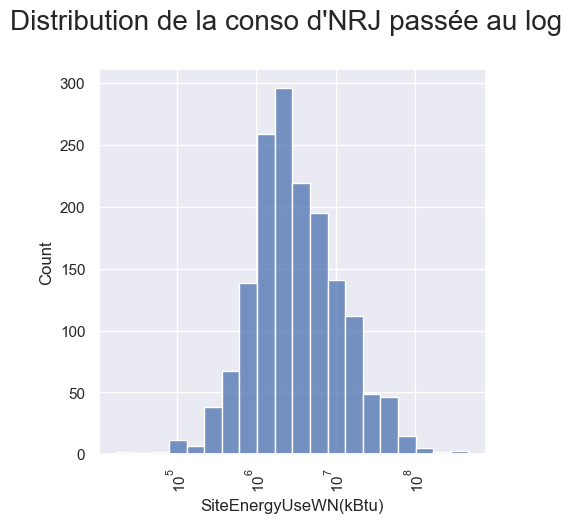

In [340]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution de la conso d'NRJ passée au log", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(data['SiteEnergyUseWN(kBtu)'], bins =20, log_scale=True)#, stat='percent' #, kde=True)

<AxesSubplot:xlabel='TotalGHGEmissions', ylabel='Count'>

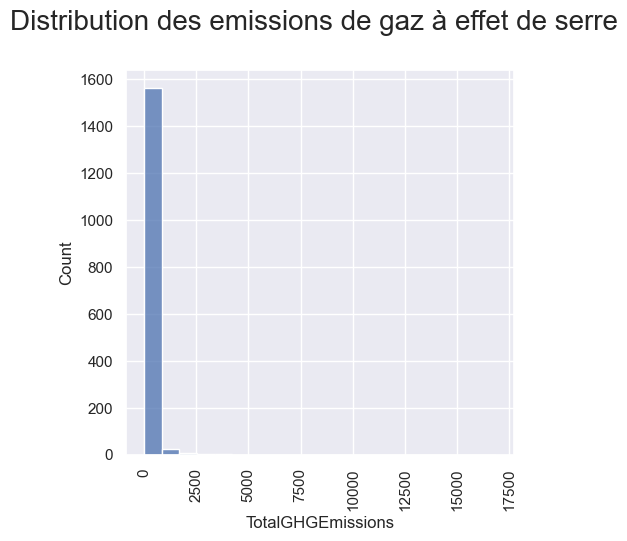

In [341]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution des emissions de gaz à effet de serre", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(data['TotalGHGEmissions'], bins =20)#, stat='percent' #, kde=True)

<AxesSubplot:xlabel='TotalGHGEmissions'>

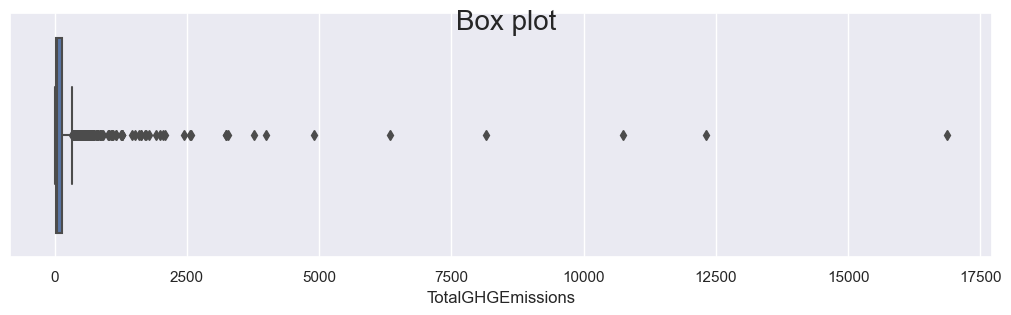

In [342]:
plt.figure(figsize = (10,3),constrained_layout=True)
plt.suptitle("Box plot", size=20, y=1)
sns.boxplot(data=data, x='TotalGHGEmissions')

Target à passer au log dans le cadre du ML

C:\Users\xavie\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='TotalGHGEmissions', ylabel='Count'>

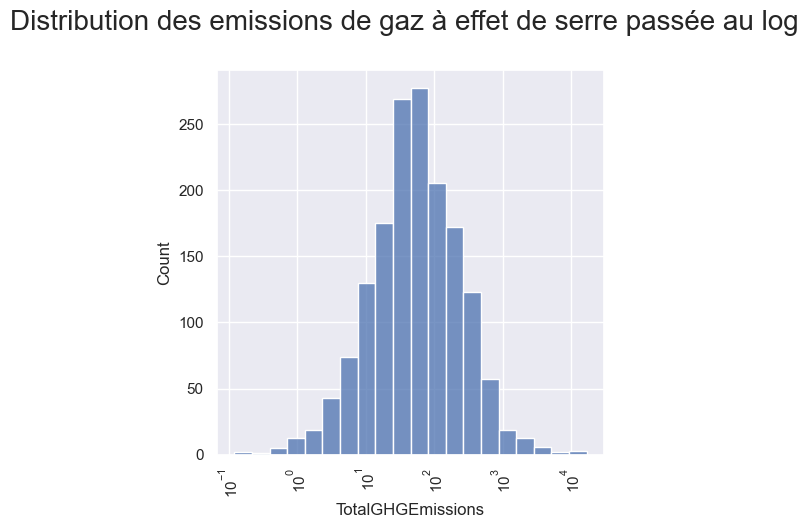

In [343]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution des emissions de gaz à effet de serre passée au log", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(data['TotalGHGEmissions'], bins =20, log_scale=True)#, stat='percent' #, kde=True)

In [344]:
data.loc[df['TotalGHGEmissions']>=3000,:]

PrimaryPropertyType   Latitude   Longitude  YearBuilt  \
34                         Office  47.534930 -122.317880       1992   
123                      Hospital  47.662310 -122.281460       1953   
165                      Hospital  47.607050 -122.309660       1990   
168                      Hospital  47.603990 -122.323770       2000   
334                         Other  47.628550 -122.330350       1997   
608                         Other  47.604538 -122.320328       2004   
983                     Warehouse  47.650220 -122.341740       1957   
1057  Supermarket / Grocery Store  47.578940 -122.312870       1965   
1060                   University  47.518850 -122.334210       2005   
1319       Refrigerated Warehouse  47.561730 -122.328850       1967   
1622                 Retail Store  47.595230 -122.323340       2014   

          Neighborhood  NumberofBuildings  NumberofFloors  PropertyGFAParking  \
34    GREATER DUWAMISH                1.0               3                   0   
123          NORTHEAST                6.0              10                   0   
165            CENTRAL                6.0               5                   0   
168               EAST                9.0               8                   0   
334         LAKE UNION                1.0               5                   0   
608               EAST                1.0               4               21612   
983         LAKE UNION                1.0               2                   0   
1057  GREATER DUWAMISH                1.0               1                   0   
1060          DELRIDGE                5.0               1                   0   
1319  GREATER DUWAMISH                1.0               1                   0   
1622  GREATER DUWAMISH                1.0               1                   0   

      PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
34                    494835           4.716139e+08             0.0   
123                   879000           2.577642e+08             0.0   
165                   597519           1.472991e+08             0.0   
168                  1158691           2.966717e+08     122575032.0   
334                   535947           1.371061e+08             0.0   
608                    55800           2.740575e+06             0.0   
983                    20140           1.164866e+05             0.0   
1057                   21603           5.927200e+06             0.0   
1060                   57952           3.347245e+06             0.0   
1319                   27263           2.408142e+06             0.0   
1622                   20993           9.616286e+05             0.0   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  ENERGYSTARScore  \
34          150476283.0       297909000.0           16870.98              8.0   
123         115641210.0       138191238.0            8145.52             10.0   
165          58754927.0        84668094.0            4906.33             34.0   
168         168683602.0         1832129.0           10734.57             29.0   
334          64627449.0        66746425.0            3995.45              NaN   
608           2604783.0           50604.0              20.85              NaN   
983            116487.0               0.0               0.81             49.0   
1057          3900058.0         1933742.0             129.89             16.0   
1060          1474450.0         1616937.0              96.15              NaN   
1319          2470642.0               0.0              17.22              NaN   
1622           795829.0           98912.0              10.80              NaN   

      superfice/etage  superfice/batiment   _NRJ_rate  Parking_pct  pct_gaz  \
34         164945.000       494835.000000  953.072956     0.000000      0.7   
123         87900.000       146500.000000  293.247108     0.000000      0.5   
165        119503.800        99586.500000  246.517778     0.000000      0.6   
168        144836.375       128743.444444  256

## 4.2 Distribution des variables

<AxesSubplot:xlabel='PrimaryPropertyType', ylabel='Count'>

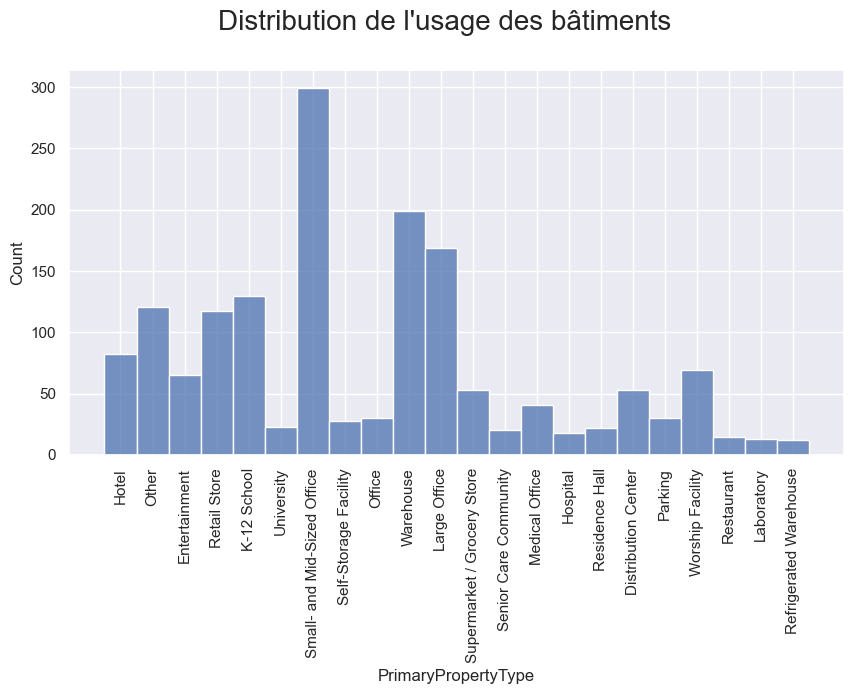

In [345]:
plt.figure(figsize = (10,5))#,constrained_layout=True)
plt.suptitle("Distribution de l'usage des bâtiments", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(data['PrimaryPropertyType'])#, bins =20, stat='percent' #, kde=True)a

<AxesSubplot:xlabel='Neighborhood', ylabel='Count'>

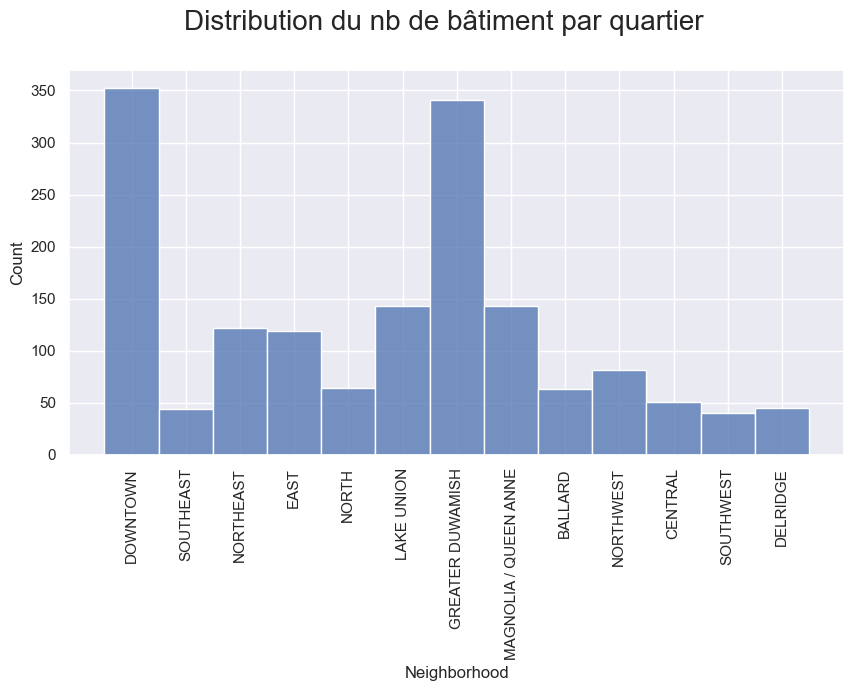

In [346]:
plt.figure(figsize = (10,5))#,constrained_layout=True)
plt.suptitle("Distribution du nb de bâtiment par quartier", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(data['Neighborhood'])#, bins =20, stat='percent' #, kde=True)a

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

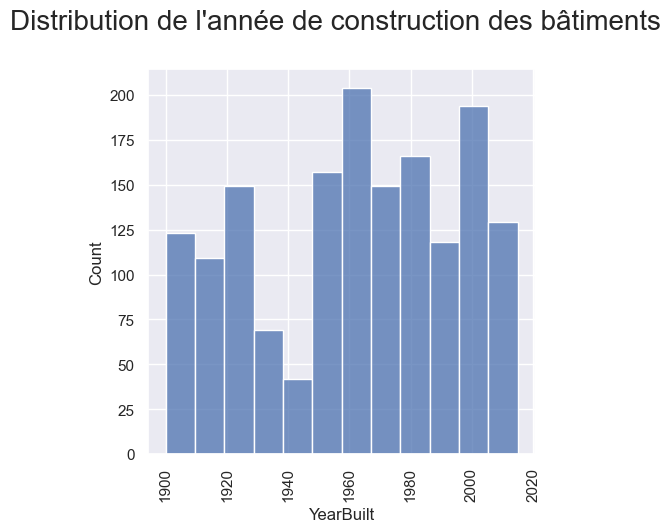

In [347]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution de l'année de construction des bâtiments", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(data['YearBuilt'])#, bins =20, stat='percent' #, kde=True)

<AxesSubplot:xlabel='NumberofBuildings', ylabel='Count'>

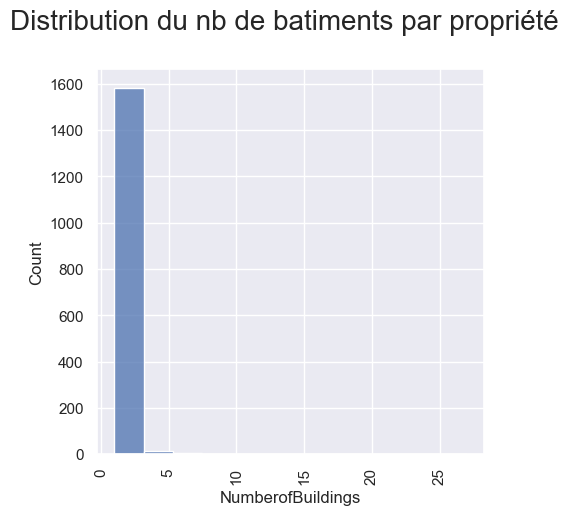

In [348]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution du nb de batiments par propriété", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(data['NumberofBuildings'])#, bins =20, stat='percent' #, kde=True)

<AxesSubplot:xlabel='NumberofBuildings'>

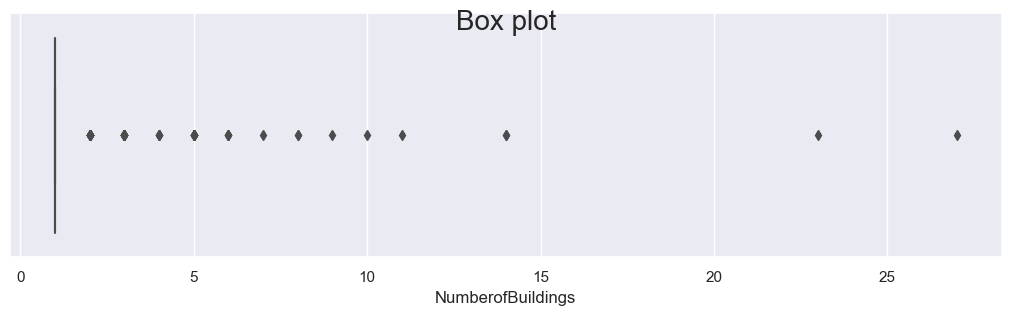

In [349]:
plt.figure(figsize = (10,3),constrained_layout=True)
plt.suptitle("Box plot", size=20, y=1)
sns.boxplot(data=data, x='NumberofBuildings')

In [350]:
data.loc[df['NumberofBuildings']>20,:]

PrimaryPropertyType  Latitude  Longitude  YearBuilt  \
104                    University  47.54700 -122.35307       1970   
1099  Small- and Mid-Sized Office  47.64168 -122.32562       1959   

     Neighborhood  NumberofBuildings  NumberofFloors  PropertyGFAParking  \
104      DELRIDGE               27.0               2                   0   
1099   LAKE UNION                1.0               4               18036   

      PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
104                   441071             41151732.0             0.0   
1099                   32297              1761932.5             0.0   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  ENERGYSTARScore  \
104          25314575.0        12987166.0             866.23              NaN   
1099          1602084.0               0.0              11.17             88.0   

      superfice/etage  superfice/batiment  _NRJ_rate  Parking_pct  pct_gaz  \
104         220535.50        16335.962963  93.299564     0.000000      0.3   
1099          8074.25        32297.000000  54.554061     0.358333      0.0   

      pct_elec  pct_steam  
104        0.7        0.0  
1099       1.0        0.0

<AxesSubplot:xlabel='NumberofFloors', ylabel='Count'>

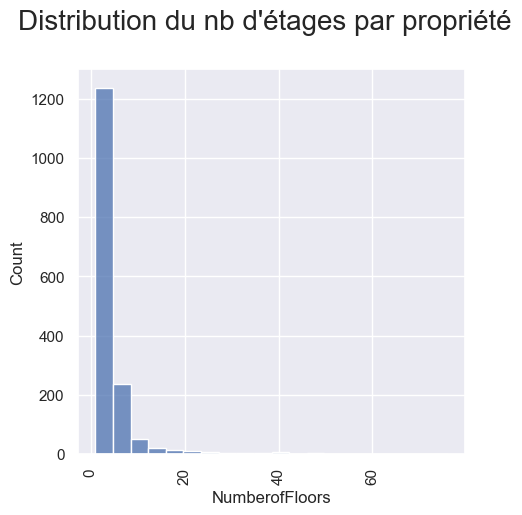

In [351]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution du nb d'étages par propriété", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(data['NumberofFloors'], bins =20)#, stat='percent' #, kde=True)

<AxesSubplot:xlabel='NumberofFloors'>

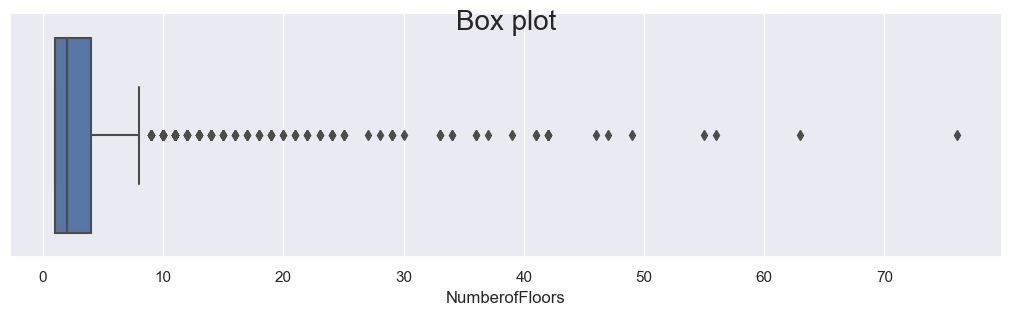

In [352]:
plt.figure(figsize = (10,3),constrained_layout=True)
plt.suptitle("Box plot", size=20, y=1)
sns.boxplot(data=data, x='NumberofFloors')

In [353]:
#plt.figure(figsize = (5,5))#,constrained_layout=True)
#plt.suptitle("Distribution de la surface des parkings", size=20, y=1)
#plt.xticks(rotation = 90)
#sns.histplot(data['PropertyGFAParking'], bins =20)#, stat='percent' #, kde=True)

<AxesSubplot:xlabel='PropertyGFABuilding(s)', ylabel='Count'>

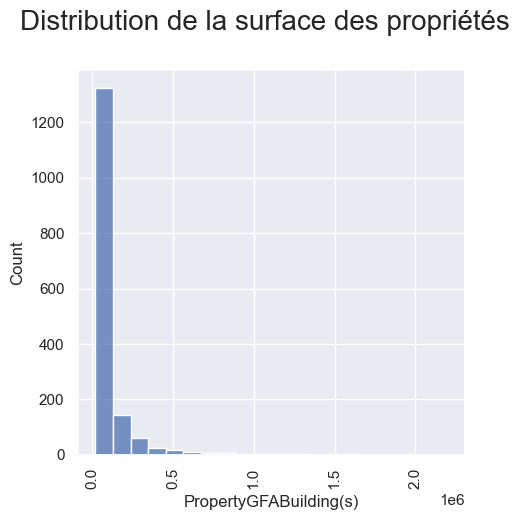

In [354]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution de la surface des propriétés", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(data['PropertyGFABuilding(s)'], bins =20)#, stat='percent' #, kde=True)

<AxesSubplot:xlabel='superfice/batiment', ylabel='Count'>

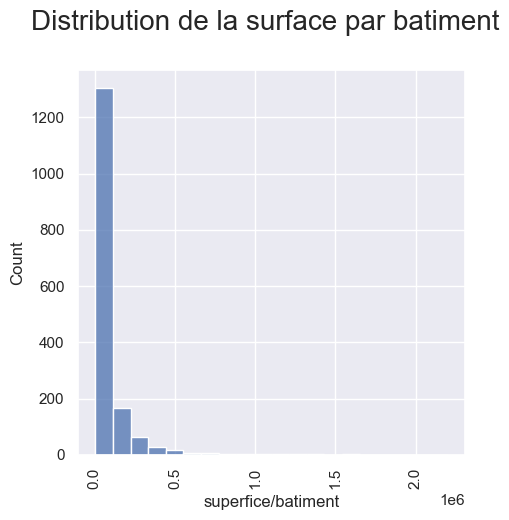

In [355]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution de la surface par batiment", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(data['superfice/batiment'], bins =20)#, stat='percent' #, kde=True)

<AxesSubplot:xlabel='superfice/etage', ylabel='Count'>

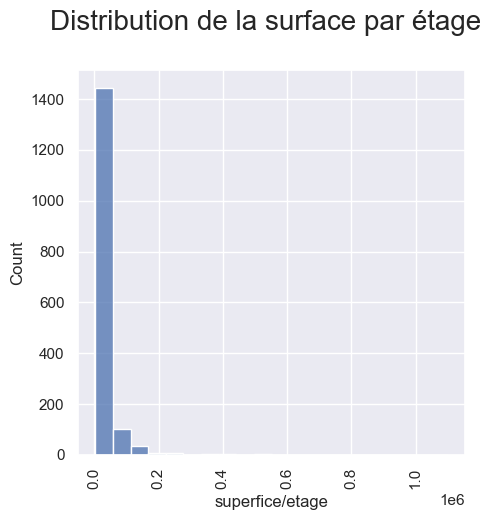

In [356]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution de la surface par étage", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(data['superfice/etage'], bins =20)#, stat='percent' #, kde=True)

<AxesSubplot:xlabel='_NRJ_rate', ylabel='Count'>

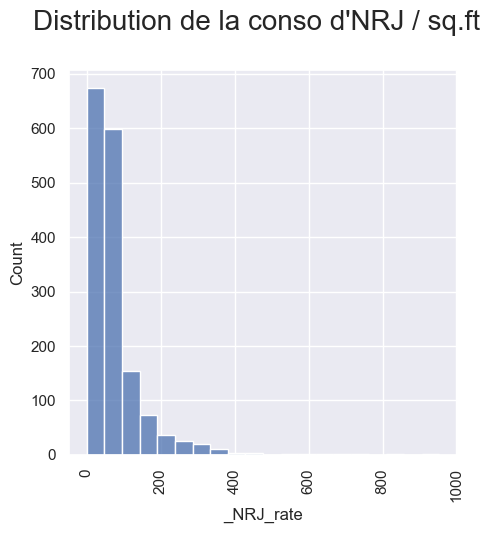

In [357]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution de la conso d'NRJ / sq.ft", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(data['_NRJ_rate'], bins =20)#, stat='percent' #, kde=True)

<AxesSubplot:xlabel='ENERGYSTARScore', ylabel='Count'>

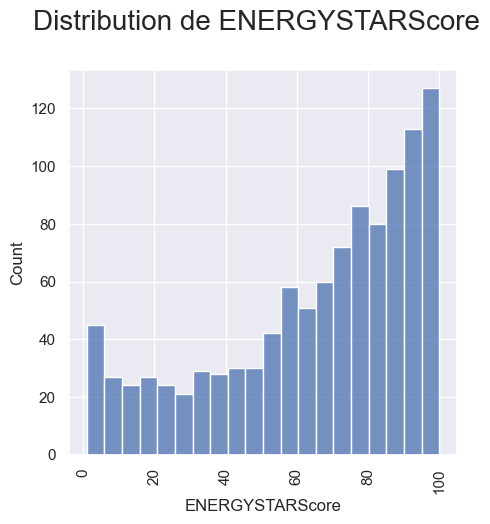

In [358]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution de ENERGYSTARScore", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(data['ENERGYSTARScore'], bins =20)#, stat='percent' #, kde=True)

<AxesSubplot:xlabel='Parking_pct', ylabel='Count'>

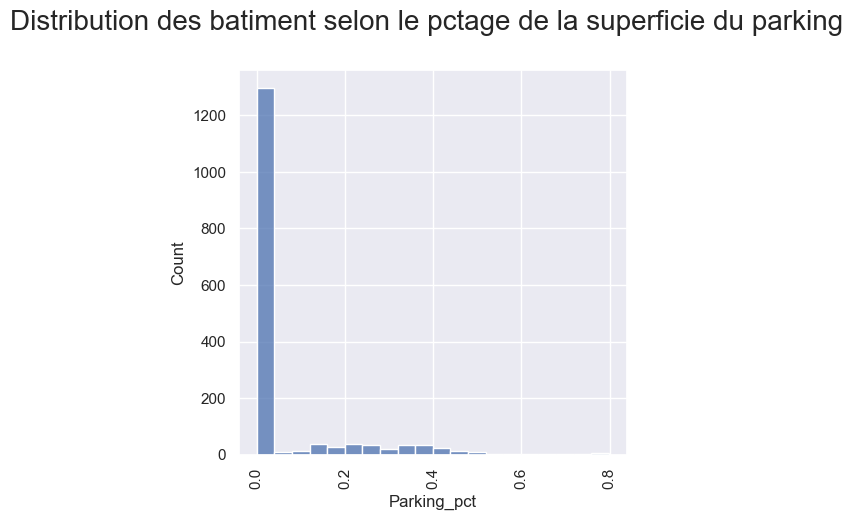

In [359]:
plt.figure(figsize = (5,5))#,constrained_layout=True)
plt.suptitle("Distribution des batiment selon le pctage de la superficie du parking", size=20, y=1)
plt.xticks(rotation = 90)
sns.histplot(data['Parking_pct'], bins =20)#, stat='percent' #, kde=True)

Répartition des batiments consommant gaz, vapeur et électricité

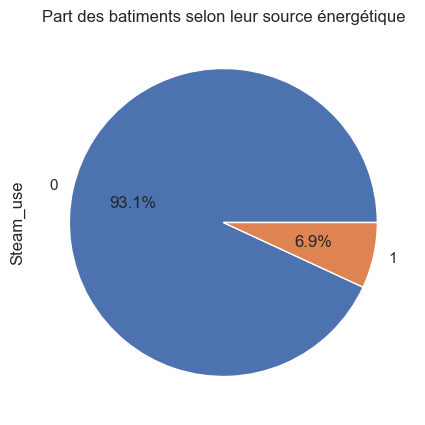

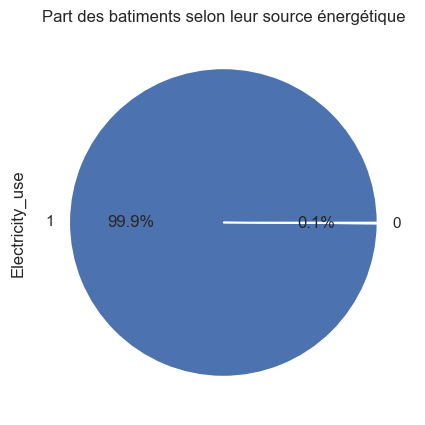

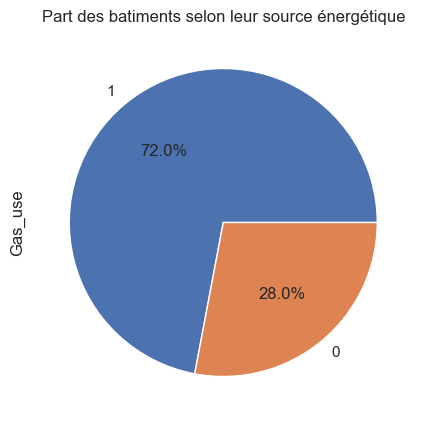

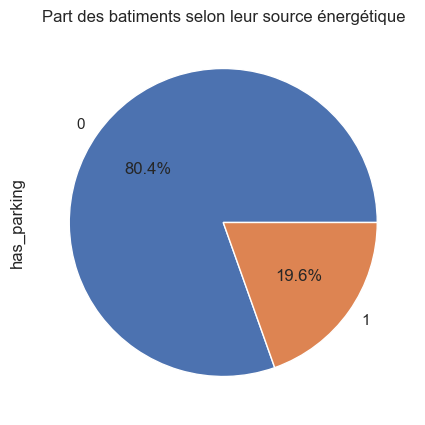

In [360]:
for NRJ in ('Steam_use', 'Electricity_use','Gas_use','has_parking'):
            plt.figure(figsize = (5,5))#,constrained_layout=True)
            dataV2[NRJ].value_counts(normalize=True).plot(kind='pie',autopct='%.1f%%', title="Part des batiments selon leur source énergétique")

## 4.3 Analyse bi variée: focus sur les relations entre les 2 targets et les features

### 4.3.1 Matrice de corrélation

Text(0.5, 1.0, 'Matrice de corrélation')

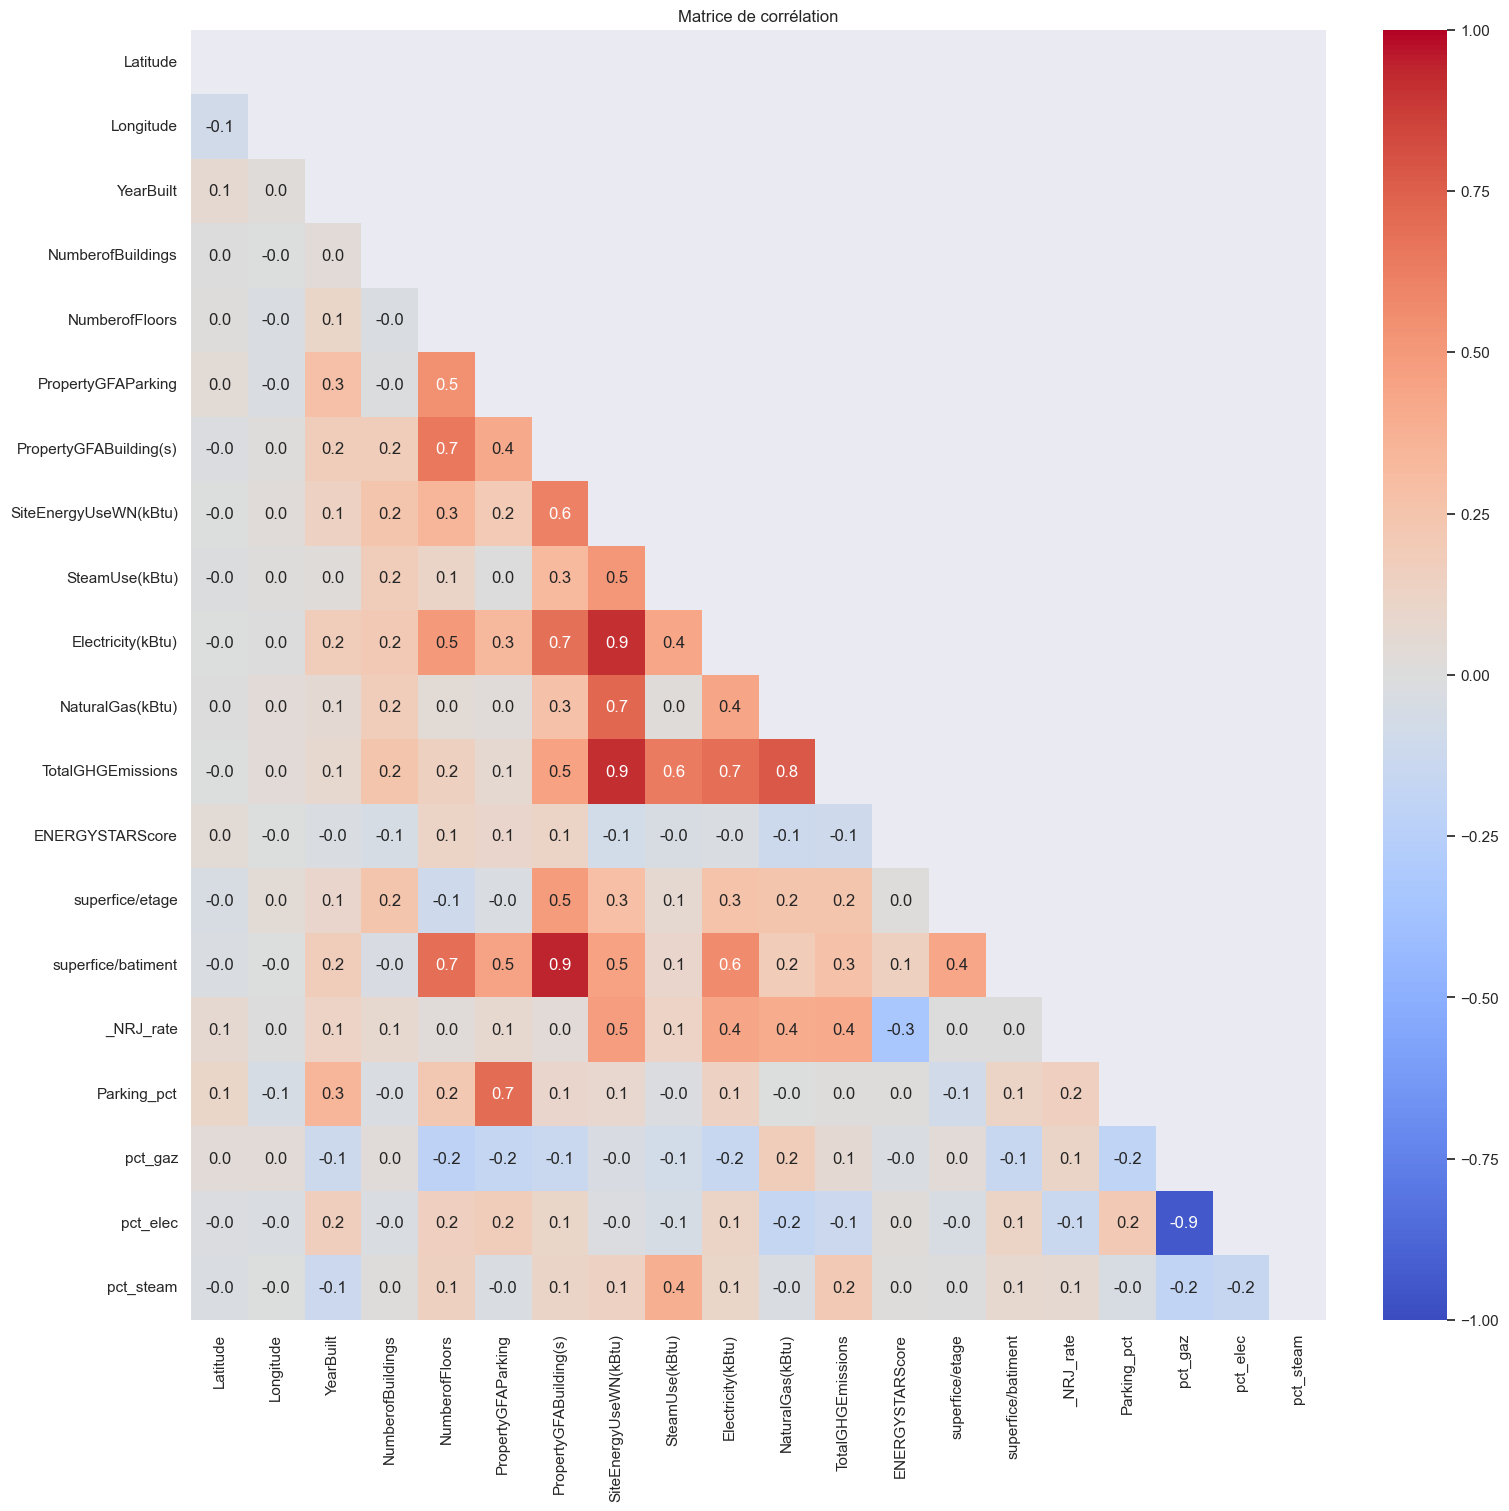

In [361]:
corr=data.corr()
mask=np.triu(corr)
plt.figure(figsize = (15,15),constrained_layout=True)
sns.heatmap(corr, annot=True, fmt=".1f", vmin=-1, vmax=1, cmap="coolwarm",mask=mask)
plt.title("Matrice de corrélation")

Forte corrélation entre consommation d'NRJ et emissions de CO2

Forte corrélation entre superficie et nb d'étage

La conso semble corrélée à la surface du batiment

Pas de corrélation évidente entre conso et différentes variables

### 4.3.2 Relations entre Conso d'énergie et features

#### ENERGYSTARScore

<function matplotlib.pyplot.show(close=None, block=None)>

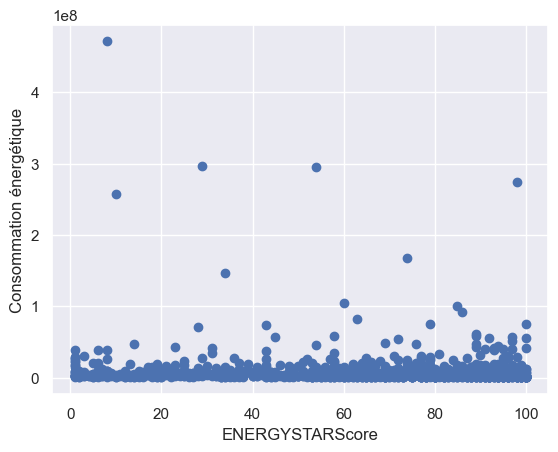

In [362]:
plt.plot(data['ENERGYSTARScore'],data['SiteEnergyUseWN(kBtu)'],"o")
plt.xlabel("ENERGYSTARScore")
plt.ylabel('Consommation énergétique')
plt.show

In [363]:
tmp=data.loc[data['SiteEnergyUseWN(kBtu)']<25000000]
tmp.shape

(1504, 22)

<function matplotlib.pyplot.show(close=None, block=None)>

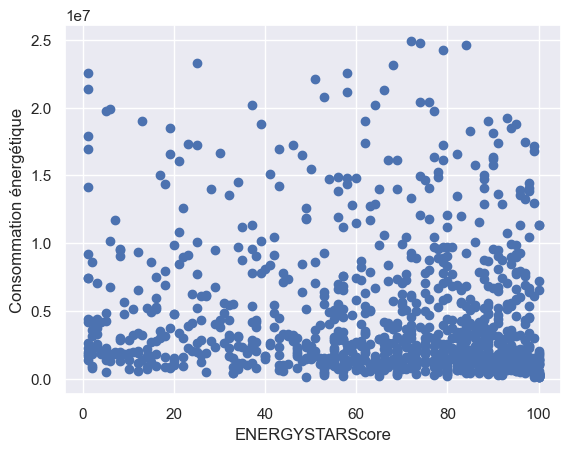

In [364]:
plt.plot(tmp['ENERGYSTARScore'],tmp['SiteEnergyUseWN(kBtu)'],"o")
plt.xlabel("ENERGYSTARScore")
plt.ylabel('Consommation énergétique')
plt.show

#### Année de contruction

<function matplotlib.pyplot.show(close=None, block=None)>

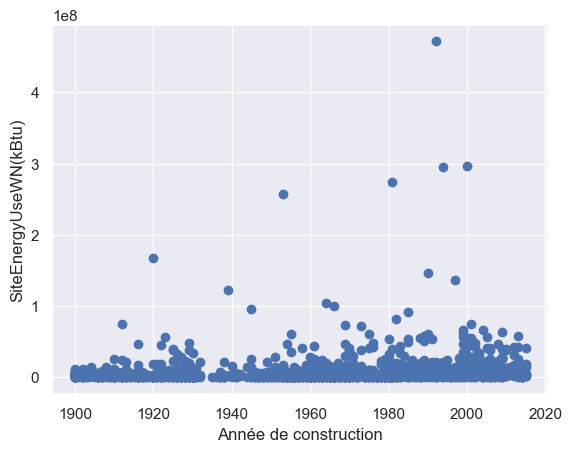

In [365]:
plt.plot(data['YearBuilt'],data['SiteEnergyUseWN(kBtu)'],"o")
plt.xlabel('Année de construction')
plt.ylabel('SiteEnergyUseWN(kBtu)')
plt.show

Il semblerait que les vieux batiments ne consomment pas plus que les plus récents. Zoomons...

In [366]:
tmp=data.loc[data['SiteEnergyUseWN(kBtu)']<100000000]
tmp.shape

(1598, 22)

<function matplotlib.pyplot.show(close=None, block=None)>

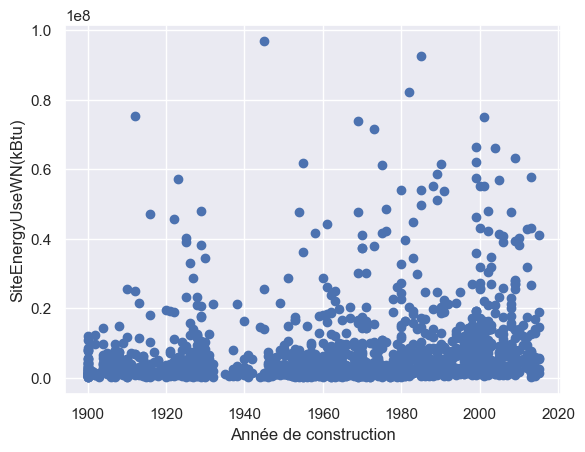

In [367]:
plt.plot(tmp['YearBuilt'],tmp['SiteEnergyUseWN(kBtu)'],"o")
plt.xlabel('Année de construction')
plt.ylabel('SiteEnergyUseWN(kBtu)')
plt.show

Pas de lien entre age du batiment et conso.

#### Superfice du batiment

<function matplotlib.pyplot.show(close=None, block=None)>

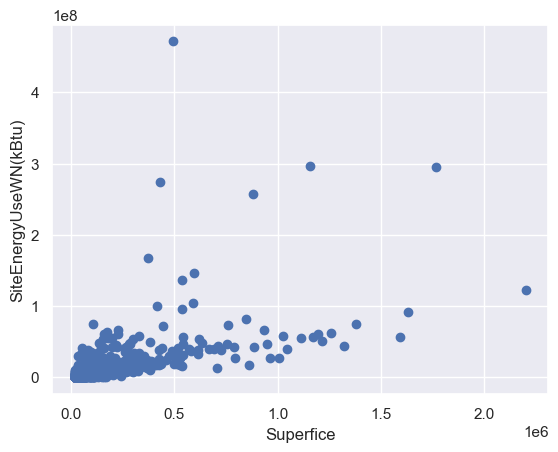

In [368]:
plt.plot(data['PropertyGFABuilding(s)'],data['SiteEnergyUseWN(kBtu)'],"o")
plt.xlabel('Superfice')
plt.ylabel('SiteEnergyUseWN(kBtu)')
plt.show

Quelques outliers trompeurs mais globalement le nuage de point confirme la corrélation entre surface du batiment et conso. 
Zoomons...

In [369]:
tmp=data.loc[(data['SiteEnergyUseWN(kBtu)']<100000000) & (data['PropertyGFABuilding(s)']<800000)]
tmp.shape

(1580, 22)

<function matplotlib.pyplot.show(close=None, block=None)>

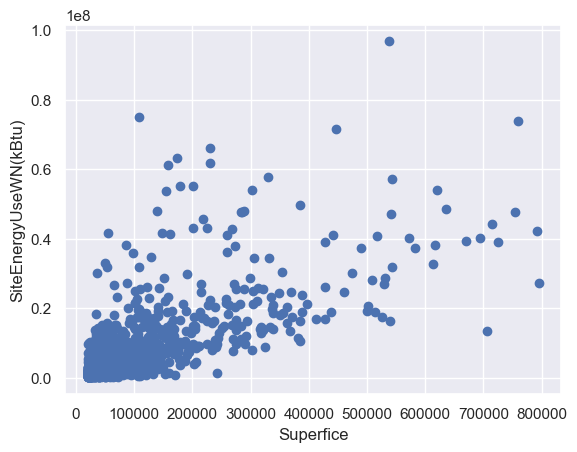

In [370]:
plt.plot(tmp['PropertyGFABuilding(s)'],tmp['SiteEnergyUseWN(kBtu)'],"o")
plt.xlabel('Superfice')
plt.ylabel('SiteEnergyUseWN(kBtu)')
plt.show

#### Superficie par étage

<function matplotlib.pyplot.show(close=None, block=None)>

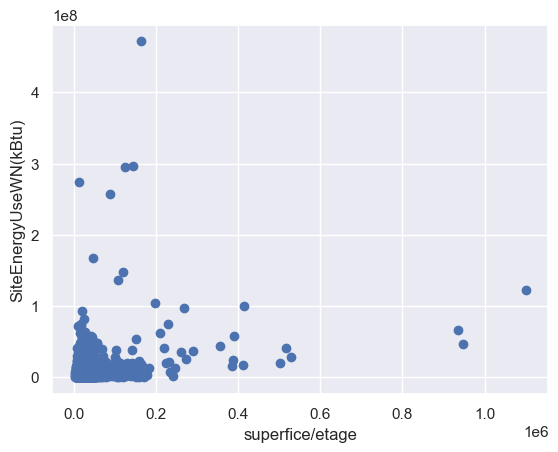

In [371]:
plt.plot(data['superfice/etage'],data['SiteEnergyUseWN(kBtu)'],"o")
plt.xlabel('superfice/etage')
plt.ylabel('SiteEnergyUseWN(kBtu)')
plt.show

Les étages spacieux ont tendance à consommer moins que les petits étages. Zoomons...

In [372]:
tmp=data.loc[(data['SiteEnergyUseWN(kBtu)']<100000000) & (data['superfice/etage']<200000),:]
tmp

PrimaryPropertyType  Latitude  Longitude  YearBuilt Neighborhood  \
0                  Hotel  47.61220 -122.33799       1927     DOWNTOWN   
1                  Hotel  47.61317 -122.33393       1996     DOWNTOWN   
2                  Hotel  47.61393 -122.33810       1969     DOWNTOWN   
3                  Hotel  47.61412 -122.33664       1926     DOWNTOWN   
4                  Hotel  47.61375 -122.34047       1980     DOWNTOWN   
...                  ...       ...        ...        ...          ...   
1647          Laboratory  47.62497 -122.33883       2015   LAKE UNION   
1648          University  47.66127 -122.31256       1962    NORTHEAST   
1649       Entertainment  47.70541 -122.32232       2005        NORTH   
1656       Entertainment  47.63228 -122.31574       1912         EAST   
1657       Entertainment  47.60775 -122.30225       1994      CENTRAL   

      NumberofBuildings  NumberofFloors  PropertyGFAParking  \
0                   1.0              12                   0   
1                   1.0              11               15064   
2                   1.0              41              196718   
3                   1.0              10                   0   
4                   1.0              18               62000   
...                 ...             ...                 ...   
1647                1.0               6               85028   
1648                1.0               1                   0   
1649                1.0               1                   0   
1656                1.0               1                   0   
1657                1.0               1                   0   

      PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
0                      88434           7.456910e+06      2003882.00   
1                      88502           8.664479e+06            0.00   
2                     759392           7.393711e+07     21566554.00   
3                      61320           6.946800e+06      2214446.25   
4                     113580           1.465650e+07            0.00   
...                      ...                    ...             ...   
1647                  260262           4.107860e+07            0.00   
1648                   68072           3.180819e+06            0.00   
1649                   20616           6.369655e+05            0.00   
1656                   23445           6.716330e+06            0.00   
1657                   20050           1.993137e+06            0.00   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  ENERGYSTARScore  \
0          3.946027e+06      1.276453e+06             249.98             60.0   
1          3.242851e+06      5.145082e+06             295.86             61.0   
2          4.952666e+07      1.493800e+06            2089.28             43.0   
3          2.768924e+06      1.811213e+06             286.43             56.0   
4          5.368607e+06      8.803998e+06             505.01             75.0   
...                 ...               ...                ...              ...   
1647       2.363680e+07      1.572731e+07            1000.06              NaN   
1648       3.180819e+06      0.000000e+00              22.17              NaN   
1649       6.369655e+05      0.000000e+00               4.44              NaN   
1656       1.260870e+06      4.715376e+06             259.22              NaN   
1657       7.694531e+05      1.043951e+06              60.81              NaN   

      superfice/etage  superfice/batiment   _NRJ_rate  Parking_pct  pct_gaz  \
0         7369.500000             88434.0   84.321754     0.000000      0.2   
1         8045.636364             88502.0   97.901505     0.145453      0.6   
2        18521.756098            759392.0   97.363565     0.205748      0.0   
3         6132.000000             61320.0  113.287679     0.000000      0.3   
4         6310.000000            113580.0  129.041231     0.353115      0.6   
...               ...                 ...         ...          ...     

<function matplotlib.pyplot.show(close=None, block=None)>

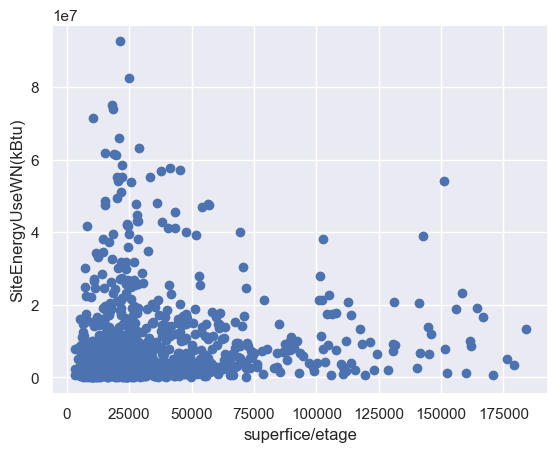

In [373]:
plt.plot(tmp['superfice/etage'],tmp['SiteEnergyUseWN(kBtu)'],"o")
plt.xlabel('superfice/etage')
plt.ylabel('SiteEnergyUseWN(kBtu)')
plt.show

#### Nombre d'étage

<function matplotlib.pyplot.show(close=None, block=None)>

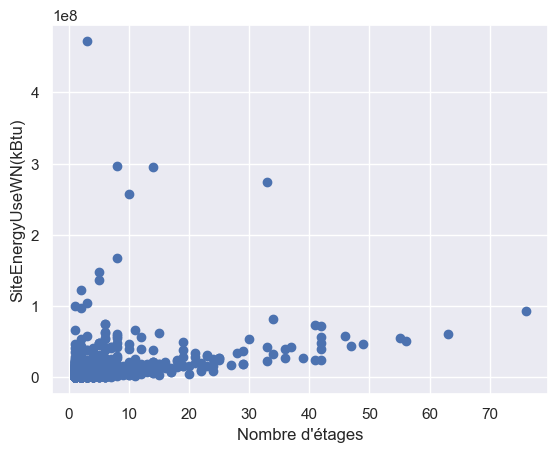

In [374]:
plt.plot(data['NumberofFloors'],data['SiteEnergyUseWN(kBtu)'],"o")
plt.xlabel("Nombre d'étages")
plt.ylabel('SiteEnergyUseWN(kBtu)')
plt.show

Zoom...

In [375]:
tmp=data.loc[data['SiteEnergyUseWN(kBtu)']<100000000]
tmp.shape

(1598, 22)

<function matplotlib.pyplot.show(close=None, block=None)>

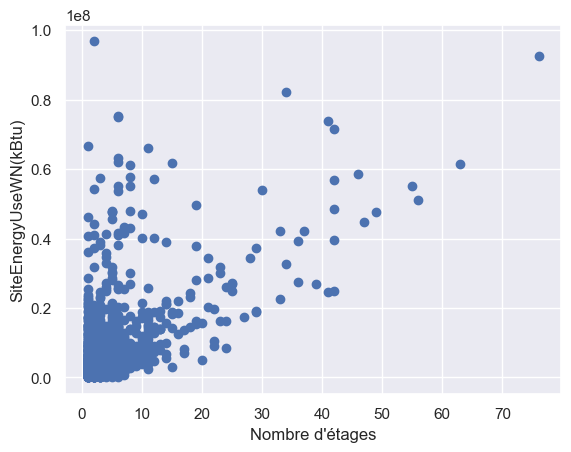

In [376]:
plt.plot(tmp['NumberofFloors'],tmp['SiteEnergyUseWN(kBtu)'],"o")
plt.xlabel("Nombre d'étages")
plt.ylabel('SiteEnergyUseWN(kBtu)')
plt.show

#### Usage du batiment

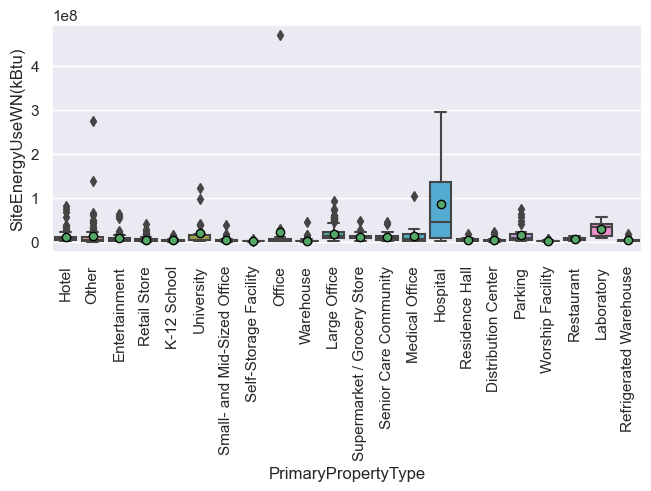

In [377]:
plt.figure(constrained_layout=True)
sns.boxplot(data=data, x= 'PrimaryPropertyType', y='SiteEnergyUseWN(kBtu)', 
            showmeans=True,meanprops = {'marker':'o','markeredgecolor':'black'})
plt.xticks(rotation = 90)
plt.show()

La présence d'outliers ecrase les box plot. Seul les hopitaux ressortent comme étant des gros consommateurs en NRJ

In [378]:
tmp=data.loc[data['SiteEnergyUseWN(kBtu)']<100000000]
tmp

PrimaryPropertyType  Latitude  Longitude  YearBuilt Neighborhood  \
0                  Hotel  47.61220 -122.33799       1927     DOWNTOWN   
1                  Hotel  47.61317 -122.33393       1996     DOWNTOWN   
2                  Hotel  47.61393 -122.33810       1969     DOWNTOWN   
3                  Hotel  47.61412 -122.33664       1926     DOWNTOWN   
4                  Hotel  47.61375 -122.34047       1980     DOWNTOWN   
...                  ...       ...        ...        ...          ...   
1647          Laboratory  47.62497 -122.33883       2015   LAKE UNION   
1648          University  47.66127 -122.31256       1962    NORTHEAST   
1649       Entertainment  47.70541 -122.32232       2005        NORTH   
1656       Entertainment  47.63228 -122.31574       1912         EAST   
1657       Entertainment  47.60775 -122.30225       1994      CENTRAL   

      NumberofBuildings  NumberofFloors  PropertyGFAParking  \
0                   1.0              12                   0   
1                   1.0              11               15064   
2                   1.0              41              196718   
3                   1.0              10                   0   
4                   1.0              18               62000   
...                 ...             ...                 ...   
1647                1.0               6               85028   
1648                1.0               1                   0   
1649                1.0               1                   0   
1656                1.0               1                   0   
1657                1.0               1                   0   

      PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
0                      88434           7.456910e+06      2003882.00   
1                      88502           8.664479e+06            0.00   
2                     759392           7.393711e+07     21566554.00   
3                      61320           6.946800e+06      2214446.25   
4                     113580           1.465650e+07            0.00   
...                      ...                    ...             ...   
1647                  260262           4.107860e+07            0.00   
1648                   68072           3.180819e+06            0.00   
1649                   20616           6.369655e+05            0.00   
1656                   23445           6.716330e+06            0.00   
1657                   20050           1.993137e+06            0.00   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  ENERGYSTARScore  \
0          3.946027e+06      1.276453e+06             249.98             60.0   
1          3.242851e+06      5.145082e+06             295.86             61.0   
2          4.952666e+07      1.493800e+06            2089.28             43.0   
3          2.768924e+06      1.811213e+06             286.43             56.0   
4          5.368607e+06      8.803998e+06             505.01             75.0   
...                 ...               ...                ...              ...   
1647       2.363680e+07      1.572731e+07            1000.06              NaN   
1648       3.180819e+06      0.000000e+00              22.17              NaN   
1649       6.369655e+05      0.000000e+00               4.44              NaN   
1656       1.260870e+06      4.715376e+06             259.22              NaN   
1657       7.694531e+05      1.043951e+06              60.81              NaN   

      superfice/etage  superfice/batiment   _NRJ_rate  Parking_pct  pct_gaz  \
0         7369.500000             88434.0   84.321754     0.000000      0.2   
1         8045.636364             88502.0   97.901505     0.145453      0.6   
2        18521.756098            759392.0   97.363565     0.205748      0.0   
3         6132.000000             61320.0  113.287679     0.000000      0.3   
4         6310.000000            113580.0  129.041231     0.353115      0.6   
...               ...                 ...         ...          ...     

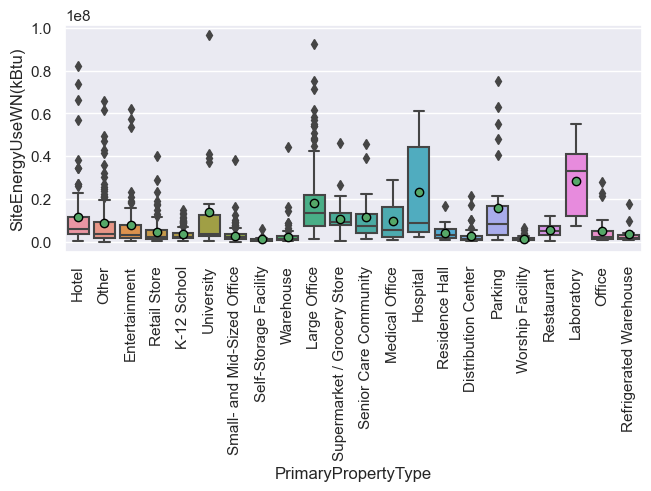

In [379]:
plt.figure(constrained_layout=True)
sns.boxplot(data=tmp, x= 'PrimaryPropertyType', y='SiteEnergyUseWN(kBtu)', 
            showmeans=True,meanprops = {'marker':'o','markeredgecolor':'black'})
plt.xticks(rotation = 90)
plt.show()

En faisant un focus uniquement sur les batiment consommant mois de 100 000 000 de kBtu, nous distinguons les différences de conso entre les types de batiments.

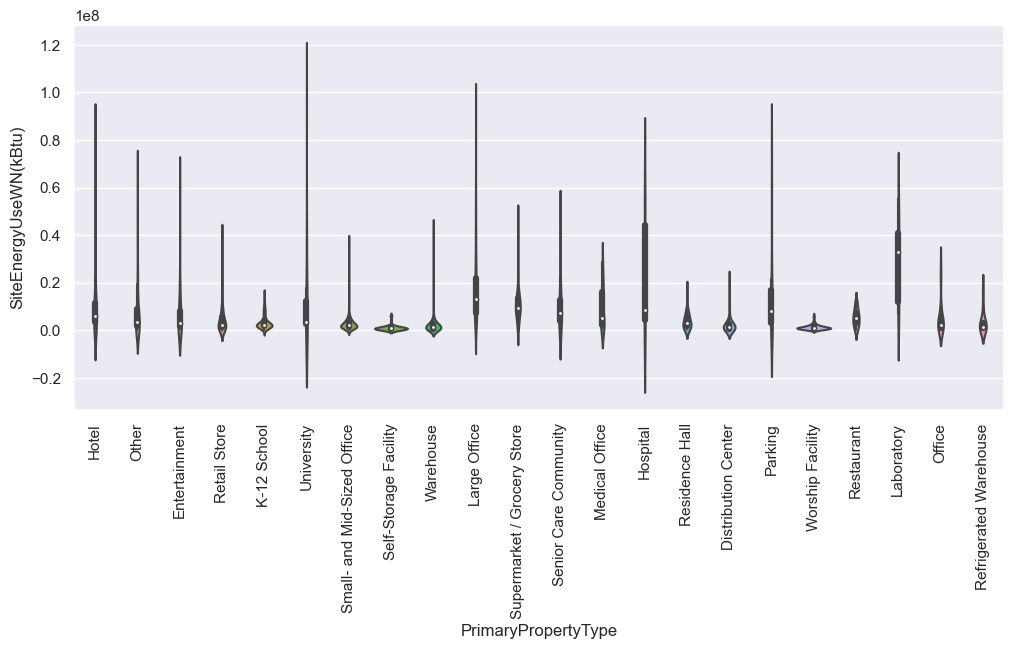

In [380]:
plt.figure(figsize=(12,5)) #constrained_layout=True)
sns.violinplot(data=tmp, x= 'PrimaryPropertyType', y='SiteEnergyUseWN(kBtu)', 
            showmeans=True,meanprops = {'marker':'o','markeredgecolor':'black'})
plt.xticks(rotation = 90)
plt.show()

#### Test ANOVA pour confirmer dépendance entre usage du batiment et conso

In [381]:
data['conso_log']=np.log1p(data['SiteEnergyUseWN(kBtu)'])
data['conso_log'].describe()

count    1609.000000
mean       14.976424
std         1.299069
min         9.756205
25%        14.134735
50%        14.841516
75%        15.814070
max        19.971671
Name: conso_log, dtype: float64

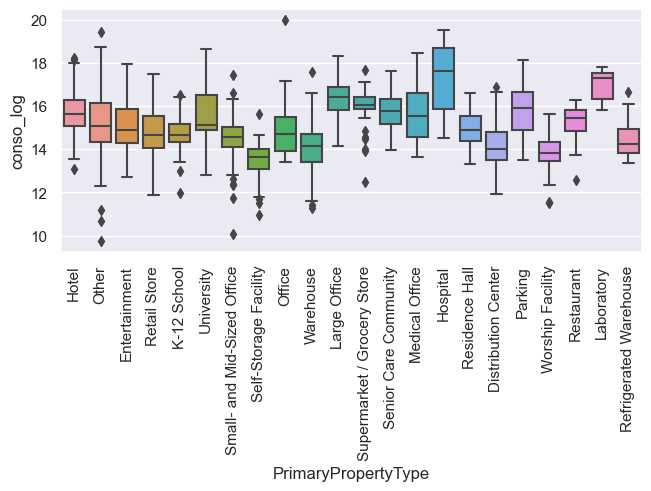

In [382]:
plt.figure(constrained_layout=True)
sns.boxplot(data=data, x= 'PrimaryPropertyType', y='conso_log'), 
            #showmeans=True,
            #meanprops = {'marker':'o','markeredgecolor':'black'})
plt.xticks(rotation = 90)
plt.show()

#### Test ANOVA, considérant que distribution normale et variance égale entre les groupes

In [383]:
aov=pg.anova(dv='conso_log',between='PrimaryPropertyType',data=data, detailed=True)
aov.round(3)

Source        SS    DF      MS      F  p-unc    np2
0  PrimaryPropertyType  1081.548    21  51.502  50.08    0.0  0.399
1               Within  1632.081  1587   1.028    NaN    NaN    NaN

In [384]:
aov=pg.anova(dv='conso_log',between='PrimaryPropertyType',data=data, detailed=True,effsize='n2')
aov.round(3)

Source        SS    DF      MS      F  p-unc     n2
0  PrimaryPropertyType  1081.548    21  51.502  50.08    0.0  0.399
1               Within  1632.081  1587   1.028    NaN    NaN    NaN

#### Test Welch/ANOVA, considérant que distribution normale et variance différente entre les groupes

In [385]:
aovw=pg.welch_anova(dv='conso_log',between='PrimaryPropertyType',data=data)
aovw.round(3)

Source  ddof1    ddof2       F  p-unc    np2
0  PrimaryPropertyType     21  237.512  62.686    0.0  0.399

Conclusion P_value = 0. On rejette l'hypothèse selon laquelle il n'y a pas de différence entre les groupes.

Eta² est égale dans les 2 tests 

#### Influence du pourcentage de superficiede parking

<function matplotlib.pyplot.show(close=None, block=None)>

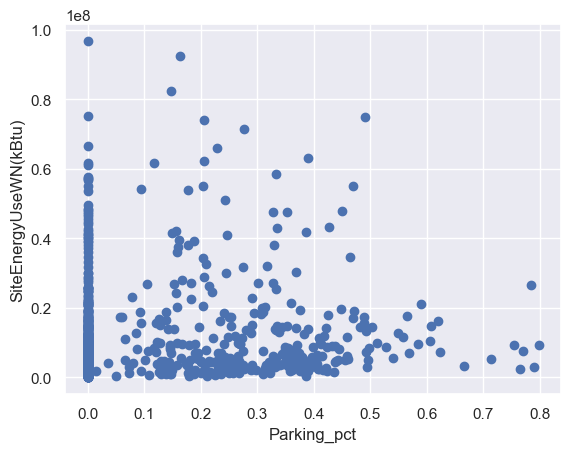

In [386]:
plt.plot(tmp['Parking_pct'],tmp['SiteEnergyUseWN(kBtu)'],"o")
plt.xlabel('Parking_pct')
plt.ylabel('SiteEnergyUseWN(kBtu)')
#plt.plot([0.0, 100.0], [0.0, 100.0], 'r-', lw=2)
plt.show

Globalement on se rend que plus la part des parkings est importante plus la conso diminue.

### Relation entre Emissions de CO2 et features

#### ENERGYSTARScore

<function matplotlib.pyplot.show(close=None, block=None)>

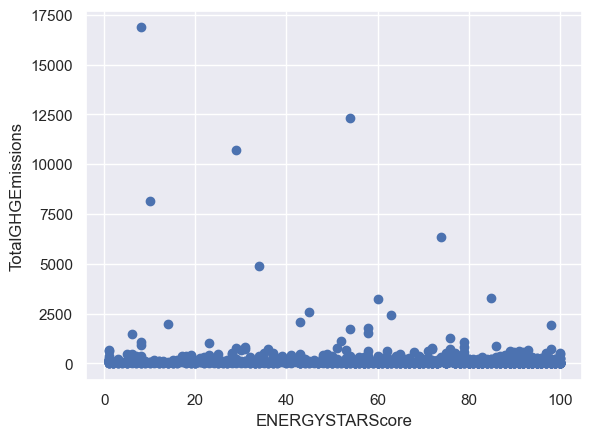

In [387]:
plt.plot(data['ENERGYSTARScore'],data['TotalGHGEmissions'],"o")
plt.xlabel("ENERGYSTARScore")
plt.ylabel('TotalGHGEmissions')
plt.show

In [388]:
tmp=data.loc[data['TotalGHGEmissions']<1000]
tmp.shape

(1569, 23)

<function matplotlib.pyplot.show(close=None, block=None)>

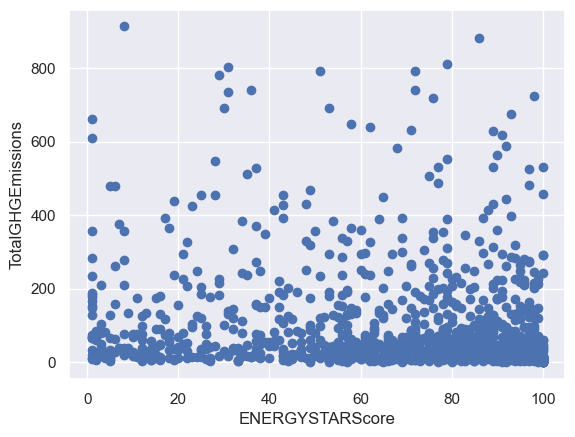

In [389]:
plt.plot(tmp['ENERGYSTARScore'],tmp['TotalGHGEmissions'],"o")
plt.xlabel("ENERGYSTARScore")
plt.ylabel('TotalGHGEmissions')
plt.show

#### Année de construction

<function matplotlib.pyplot.show(close=None, block=None)>

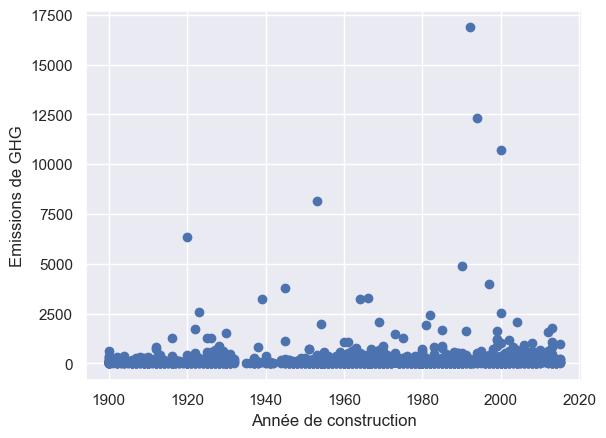

In [390]:
plt.plot(data['YearBuilt'],data['TotalGHGEmissions'],"o")
plt.xlabel('Année de construction')
plt.ylabel('Emissions de GHG')
plt.show

In [391]:
tmp=data.loc[data['TotalGHGEmissions']<5000]
tmp.shape

(1604, 23)

<function matplotlib.pyplot.show(close=None, block=None)>

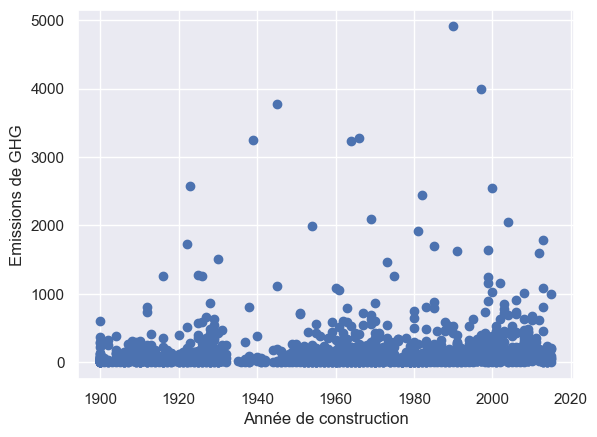

In [392]:
plt.plot(tmp['YearBuilt'],tmp['TotalGHGEmissions'],"o")
plt.xlabel('Année de construction')
plt.ylabel('Emissions de GHG')
plt.show

#### Lien avec la superficie/étage

<function matplotlib.pyplot.show(close=None, block=None)>

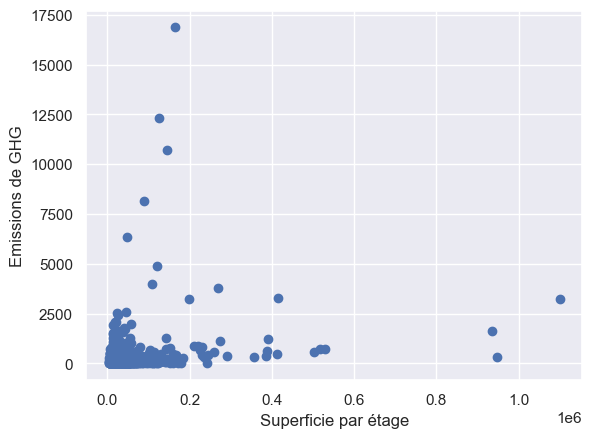

In [393]:
plt.plot(data['superfice/etage'],data['TotalGHGEmissions'],"o")
plt.xlabel('Superficie par étage')
plt.ylabel('Emissions de GHG')
plt.show

In [394]:
tmp=data.loc[data['TotalGHGEmissions']<5000]
tmp.shape

(1604, 23)

<function matplotlib.pyplot.show(close=None, block=None)>

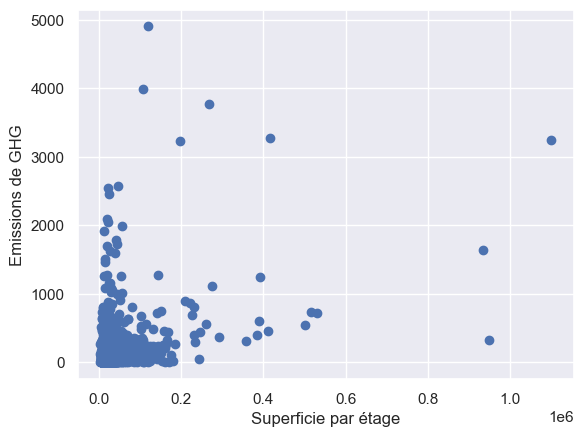

In [395]:
plt.plot(tmp['superfice/etage'],tmp['TotalGHGEmissions'],"o")
plt.xlabel('Superficie par étage')
plt.ylabel('Emissions de GHG')
plt.show

#### Lien avec l'usage du bâtiment

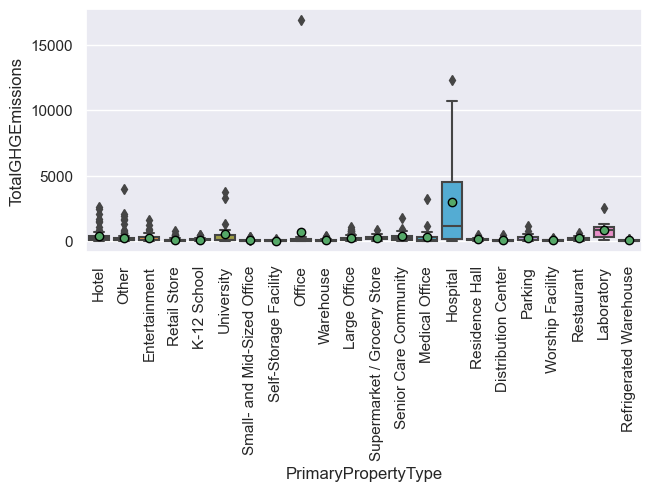

In [396]:
plt.figure(constrained_layout=True)
sns.boxplot(data=data, x= 'PrimaryPropertyType', y='TotalGHGEmissions', 
            showmeans=True,meanprops = {'marker':'o','markeredgecolor':'black'})
plt.xticks(rotation = 90)
plt.show()

In [397]:
tmp=data.loc[data['TotalGHGEmissions']<3000]
tmp

PrimaryPropertyType  Latitude  Longitude  YearBuilt Neighborhood  \
0                  Hotel  47.61220 -122.33799       1927     DOWNTOWN   
1                  Hotel  47.61317 -122.33393       1996     DOWNTOWN   
2                  Hotel  47.61393 -122.33810       1969     DOWNTOWN   
3                  Hotel  47.61412 -122.33664       1926     DOWNTOWN   
4                  Hotel  47.61375 -122.34047       1980     DOWNTOWN   
...                  ...       ...        ...        ...          ...   
1647          Laboratory  47.62497 -122.33883       2015   LAKE UNION   
1648          University  47.66127 -122.31256       1962    NORTHEAST   
1649       Entertainment  47.70541 -122.32232       2005        NORTH   
1656       Entertainment  47.63228 -122.31574       1912         EAST   
1657       Entertainment  47.60775 -122.30225       1994      CENTRAL   

      NumberofBuildings  NumberofFloors  PropertyGFAParking  \
0                   1.0              12                   0   
1                   1.0              11               15064   
2                   1.0              41              196718   
3                   1.0              10                   0   
4                   1.0              18               62000   
...                 ...             ...                 ...   
1647                1.0               6               85028   
1648                1.0               1                   0   
1649                1.0               1                   0   
1656                1.0               1                   0   
1657                1.0               1                   0   

      PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
0                      88434           7.456910e+06      2003882.00   
1                      88502           8.664479e+06            0.00   
2                     759392           7.393711e+07     21566554.00   
3                      61320           6.946800e+06      2214446.25   
4                     113580           1.465650e+07            0.00   
...                      ...                    ...             ...   
1647                  260262           4.107860e+07            0.00   
1648                   68072           3.180819e+06            0.00   
1649                   20616           6.369655e+05            0.00   
1656                   23445           6.716330e+06            0.00   
1657                   20050           1.993137e+06            0.00   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  ENERGYSTARScore  \
0          3.946027e+06      1.276453e+06             249.98             60.0   
1          3.242851e+06      5.145082e+06             295.86             61.0   
2          4.952666e+07      1.493800e+06            2089.28             43.0   
3          2.768924e+06      1.811213e+06             286.43             56.0   
4          5.368607e+06      8.803998e+06             505.01             75.0   
...                 ...               ...                ...              ...   
1647       2.363680e+07      1.572731e+07            1000.06              NaN   
1648       3.180819e+06      0.000000e+00              22.17              NaN   
1649       6.369655e+05      0.000000e+00               4.44              NaN   
1656       1.260870e+06      4.715376e+06             259.22              NaN   
1657       7.694531e+05      1.043951e+06              60.81              NaN   

      superfice/etage  superfice/batiment   _NRJ_rate  Parking_pct  pct_gaz  \
0         7369.500000             88434.0   84.321754     0.000000      0.2   
1         8045.636364             88502.0   97.901505     0.145453      0.6   
2        18521.756098            759392.0   97.363565     0.205748      0.0   
3         6132.000000             61320.0  113.287679     0.000000      0.3   
4         6310.000000            113580.0  129.041231     0.353115      0.6   
...               ...                 ...         ...          ...     

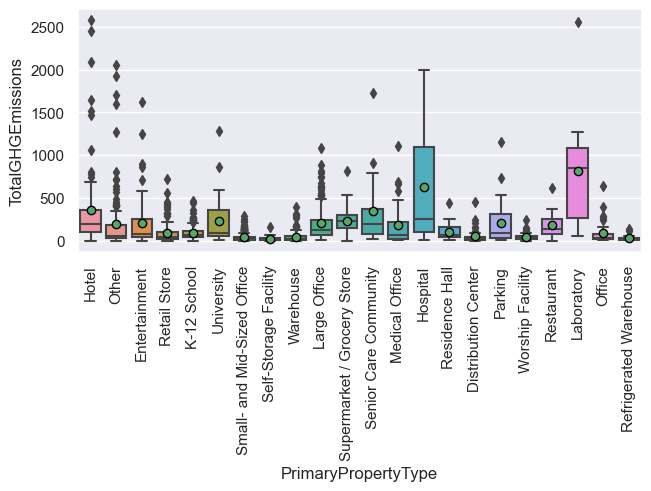

In [398]:
plt.figure(constrained_layout=True)
sns.boxplot(data=tmp, x= 'PrimaryPropertyType', y='TotalGHGEmissions', 
            showmeans=True,meanprops = {'marker':'o','markeredgecolor':'black'})
plt.xticks(rotation = 90)
plt.show()

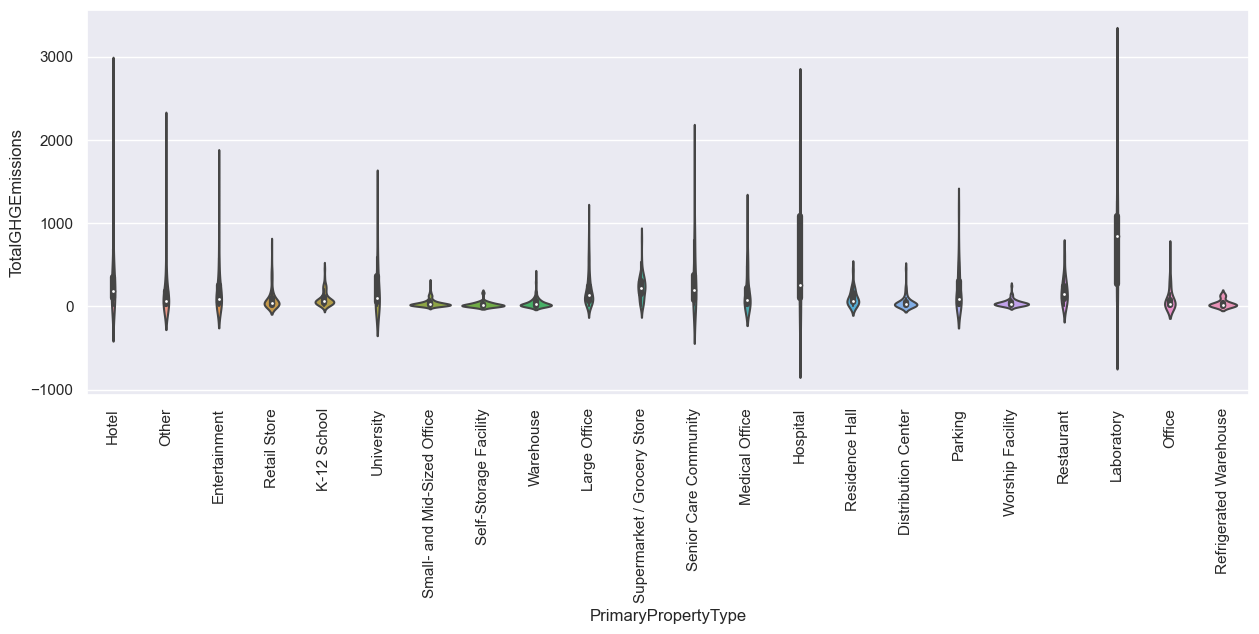

In [399]:
plt.figure(figsize=(15,5)) #constrained_layout=True)
sns.violinplot(data=tmp, x= 'PrimaryPropertyType', y='TotalGHGEmissions', 
            showmeans=True,meanprops = {'marker':'o','markeredgecolor':'black'})
plt.xticks(rotation = 90)
plt.show()

De même que pour la conso, les outliers écrasent les blox plot. En se focalisant sur les batiments emettant moins de 3000 tonnes de CO2

#### Test ANOVA

In [400]:
data['GHG_log']=np.log1p(data['TotalGHGEmissions'])
data['GHG_log'].describe()

count    1609.000000
mean        4.012068
std         1.448337
min        -1.609438
25%         3.075467
50%         3.946618
75%         4.979557
max         9.733410
Name: GHG_log, dtype: float64

#### Test ANOVA, considérant que distribution normale et variance égale entre les groupes

In [401]:
aov=pg.anova(dv='GHG_log',between='PrimaryPropertyType',data=data, detailed=True)
aov.round(3)

Source        SS    DF      MS       F  p-unc    np2
0  PrimaryPropertyType  1072.036    21  51.049  35.208    0.0  0.318
1               Within  2301.033  1587   1.450     NaN    NaN    NaN

In [402]:
aov=pg.anova(dv='GHG_log',between='PrimaryPropertyType',data=data, detailed=True,effsize='n2')
aov.round(3)

Source        SS    DF      MS       F  p-unc     n2
0  PrimaryPropertyType  1072.036    21  51.049  35.208    0.0  0.318
1               Within  2301.033  1587   1.450     NaN    NaN    NaN

#### Test ANOVA, considérant que distribution normale et variance égale entre les groupes¶

In [403]:
aovw=pg.welch_anova(dv='GHG_log',between='PrimaryPropertyType',data=data)
aovw.round(3)

Source  ddof1    ddof2       F  p-unc    np2
0  PrimaryPropertyType     21  237.344  36.711    0.0  0.318

#### Lien avec la surface de parking

In [404]:
tmp=data.loc[data['TotalGHGEmissions']<2000]
tmp

PrimaryPropertyType  Latitude  Longitude  YearBuilt Neighborhood  \
0                  Hotel  47.61220 -122.33799       1927     DOWNTOWN   
1                  Hotel  47.61317 -122.33393       1996     DOWNTOWN   
3                  Hotel  47.61412 -122.33664       1926     DOWNTOWN   
4                  Hotel  47.61375 -122.34047       1980     DOWNTOWN   
5                  Other  47.61623 -122.33657       1999     DOWNTOWN   
...                  ...       ...        ...        ...          ...   
1647          Laboratory  47.62497 -122.33883       2015   LAKE UNION   
1648          University  47.66127 -122.31256       1962    NORTHEAST   
1649       Entertainment  47.70541 -122.32232       2005        NORTH   
1656       Entertainment  47.63228 -122.31574       1912         EAST   
1657       Entertainment  47.60775 -122.30225       1994      CENTRAL   

      NumberofBuildings  NumberofFloors  PropertyGFAParking  \
0                   1.0              12                   0   
1                   1.0              11               15064   
3                   1.0              10                   0   
4                   1.0              18               62000   
5                   1.0               2               37198   
...                 ...             ...                 ...   
1647                1.0               6               85028   
1648                1.0               1                   0   
1649                1.0               1                   0   
1656                1.0               1                   0   
1657                1.0               1                   0   

      PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
0                      88434           7.456910e+06      2003882.00   
1                      88502           8.664479e+06            0.00   
3                      61320           6.946800e+06      2214446.25   
4                     113580           1.465650e+07            0.00   
5                      60090           1.258171e+07            0.00   
...                      ...                    ...             ...   
1647                  260262           4.107860e+07            0.00   
1648                   68072           3.180819e+06            0.00   
1649                   20616           6.369655e+05            0.00   
1656                   23445           6.716330e+06            0.00   
1657                   20050           1.993137e+06            0.00   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  ENERGYSTARScore  \
0          3.946027e+06      1.276453e+06             249.98             60.0   
1          3.242851e+06      5.145082e+06             295.86             61.0   
3          2.768924e+06      1.811213e+06             286.43             56.0   
4          5.368607e+06      8.803998e+06             505.01             75.0   
5          7.371434e+06      4.715182e+06             301.81              NaN   
...                 ...               ...                ...              ...   
1647       2.363680e+07      1.572731e+07            1000.06              NaN   
1648       3.180819e+06      0.000000e+00              22.17              NaN   
1649       6.369655e+05      0.000000e+00               4.44              NaN   
1656       1.260870e+06      4.715376e+06             259.22              NaN   
1657       7.694531e+05      1.043951e+06              60.81              NaN   

      superfice/etage  superfice/batiment   _NRJ_rate  Parking_pct  pct_gaz  \
0         7369.500000             88434.0   84.321754     0.000000      0.2   
1         8045.636364             88502.0   97.901505     0.145453      0.6   
3         6132.000000             61320.0  113.287679     0.000000      0.3   
4         6310.000000            113580.0  129.041231     0.353115      0.6   
5        30045.000000             60090.0  209.381128     0.382349      0.4   
...               ...                 ...         ...          ...     

<function matplotlib.pyplot.show(close=None, block=None)>

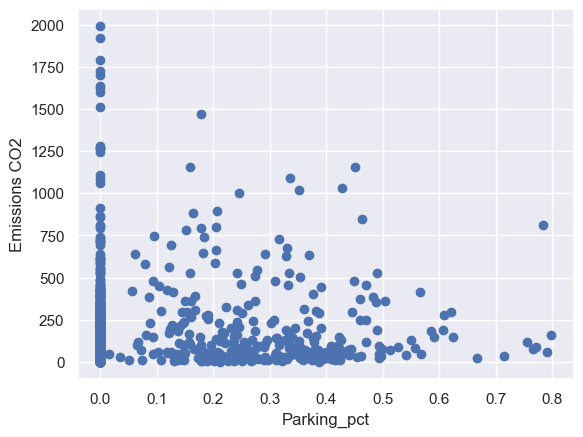

In [405]:
plt.plot(tmp['Parking_pct'],tmp['TotalGHGEmissions'],"o")
plt.xlabel('Parking_pct')
plt.ylabel('Emissions CO2')
#plt.plot([0.0, 100.0], [0.0, 100.0], 'r-', lw=2)
plt.show

De la même manière, plus la part des parkings est importante plus les emissions de CO2 diminuent.

### Relation entre usage du bâtiment et différentes features

#### Lien avec la surface/étage

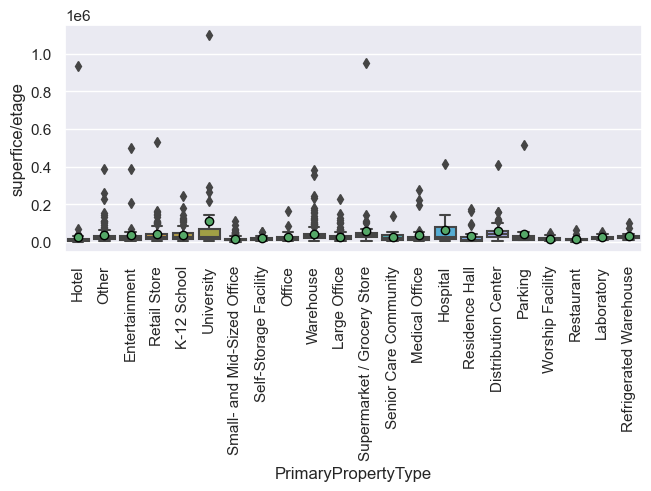

In [406]:
plt.figure(constrained_layout=True)
sns.boxplot(data=data, x= 'PrimaryPropertyType', y='superfice/etage', 
            showmeans=True,meanprops = {'marker':'o','markeredgecolor':'black'})
plt.xticks(rotation = 90)
plt.show()

In [407]:
data

PrimaryPropertyType  Latitude  Longitude  YearBuilt Neighborhood  \
0                  Hotel  47.61220 -122.33799       1927     DOWNTOWN   
1                  Hotel  47.61317 -122.33393       1996     DOWNTOWN   
2                  Hotel  47.61393 -122.33810       1969     DOWNTOWN   
3                  Hotel  47.61412 -122.33664       1926     DOWNTOWN   
4                  Hotel  47.61375 -122.34047       1980     DOWNTOWN   
...                  ...       ...        ...        ...          ...   
1647          Laboratory  47.62497 -122.33883       2015   LAKE UNION   
1648          University  47.66127 -122.31256       1962    NORTHEAST   
1649       Entertainment  47.70541 -122.32232       2005        NORTH   
1656       Entertainment  47.63228 -122.31574       1912         EAST   
1657       Entertainment  47.60775 -122.30225       1994      CENTRAL   

      NumberofBuildings  NumberofFloors  PropertyGFAParking  \
0                   1.0              12                   0   
1                   1.0              11               15064   
2                   1.0              41              196718   
3                   1.0              10                   0   
4                   1.0              18               62000   
...                 ...             ...                 ...   
1647                1.0               6               85028   
1648                1.0               1                   0   
1649                1.0               1                   0   
1656                1.0               1                   0   
1657                1.0               1                   0   

      PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
0                      88434           7.456910e+06      2003882.00   
1                      88502           8.664479e+06            0.00   
2                     759392           7.393711e+07     21566554.00   
3                      61320           6.946800e+06      2214446.25   
4                     113580           1.465650e+07            0.00   
...                      ...                    ...             ...   
1647                  260262           4.107860e+07            0.00   
1648                   68072           3.180819e+06            0.00   
1649                   20616           6.369655e+05            0.00   
1656                   23445           6.716330e+06            0.00   
1657                   20050           1.993137e+06            0.00   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  ENERGYSTARScore  \
0          3.946027e+06      1.276453e+06             249.98             60.0   
1          3.242851e+06      5.145082e+06             295.86             61.0   
2          4.952666e+07      1.493800e+06            2089.28             43.0   
3          2.768924e+06      1.811213e+06             286.43             56.0   
4          5.368607e+06      8.803998e+06             505.01             75.0   
...                 ...               ...                ...              ...   
1647       2.363680e+07      1.572731e+07            1000.06              NaN   
1648       3.180819e+06      0.000000e+00              22.17              NaN   
1649       6.369655e+05      0.000000e+00               4.44              NaN   
1656       1.260870e+06      4.715376e+06             259.22              NaN   
1657       7.694531e+05      1.043951e+06              60.81              NaN   

      superfice/etage  superfice/batiment   _NRJ_rate  Parking_pct  pct_gaz  \
0         7369.500000             88434.0   84.321754     0.000000      0.2   
1         8045.636364             88502.0   97.901505     0.145453      0.6   
2        18521.756098            759392.0   97.363565     0.205748      0.0   
3         6132.000000             61320.0  113.287679     0.000000      0.3   
4         6310.000000            113580.0  129.041231     0.353115      0.6   
...               ...                 ...         ...          ...     

#### Lien avec NRJ_rate

In [408]:
tmp=data.loc[data['_NRJ_rate']<500]
tmp

PrimaryPropertyType  Latitude  Longitude  YearBuilt Neighborhood  \
0                  Hotel  47.61220 -122.33799       1927     DOWNTOWN   
1                  Hotel  47.61317 -122.33393       1996     DOWNTOWN   
2                  Hotel  47.61393 -122.33810       1969     DOWNTOWN   
3                  Hotel  47.61412 -122.33664       1926     DOWNTOWN   
4                  Hotel  47.61375 -122.34047       1980     DOWNTOWN   
...                  ...       ...        ...        ...          ...   
1647          Laboratory  47.62497 -122.33883       2015   LAKE UNION   
1648          University  47.66127 -122.31256       1962    NORTHEAST   
1649       Entertainment  47.70541 -122.32232       2005        NORTH   
1656       Entertainment  47.63228 -122.31574       1912         EAST   
1657       Entertainment  47.60775 -122.30225       1994      CENTRAL   

      NumberofBuildings  NumberofFloors  PropertyGFAParking  \
0                   1.0              12                   0   
1                   1.0              11               15064   
2                   1.0              41              196718   
3                   1.0              10                   0   
4                   1.0              18               62000   
...                 ...             ...                 ...   
1647                1.0               6               85028   
1648                1.0               1                   0   
1649                1.0               1                   0   
1656                1.0               1                   0   
1657                1.0               1                   0   

      PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
0                      88434           7.456910e+06      2003882.00   
1                      88502           8.664479e+06            0.00   
2                     759392           7.393711e+07     21566554.00   
3                      61320           6.946800e+06      2214446.25   
4                     113580           1.465650e+07            0.00   
...                      ...                    ...             ...   
1647                  260262           4.107860e+07            0.00   
1648                   68072           3.180819e+06            0.00   
1649                   20616           6.369655e+05            0.00   
1656                   23445           6.716330e+06            0.00   
1657                   20050           1.993137e+06            0.00   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  ENERGYSTARScore  \
0          3.946027e+06      1.276453e+06             249.98             60.0   
1          3.242851e+06      5.145082e+06             295.86             61.0   
2          4.952666e+07      1.493800e+06            2089.28             43.0   
3          2.768924e+06      1.811213e+06             286.43             56.0   
4          5.368607e+06      8.803998e+06             505.01             75.0   
...                 ...               ...                ...              ...   
1647       2.363680e+07      1.572731e+07            1000.06              NaN   
1648       3.180819e+06      0.000000e+00              22.17              NaN   
1649       6.369655e+05      0.000000e+00               4.44              NaN   
1656       1.260870e+06      4.715376e+06             259.22              NaN   
1657       7.694531e+05      1.043951e+06              60.81              NaN   

      superfice/etage  superfice/batiment   _NRJ_rate  Parking_pct  pct_gaz  \
0         7369.500000             88434.0   84.321754     0.000000      0.2   
1         8045.636364             88502.0   97.901505     0.145453      0.6   
2        18521.756098            759392.0   97.363565     0.205748      0.0   
3         6132.000000             61320.0  113.287679     0.000000      0.3   
4         6310.000000            113580.0  129.041231     0.353115      0.6   
...               ...                 ...         ...          ...     

In [409]:
tmp=tmp.sort_values(by='PrimaryPropertyType')
tmp

PrimaryPropertyType  Latitude  Longitude  YearBuilt      Neighborhood  \
883   Distribution Center  47.65830 -122.36638       1951           BALLARD   
585   Distribution Center  47.52549 -122.33064       1979  GREATER DUWAMISH   
591   Distribution Center  47.56613 -122.33838       1986  GREATER DUWAMISH   
635   Distribution Center  47.54113 -122.32633       1965  GREATER DUWAMISH   
641   Distribution Center  47.51127 -122.28100       1967  GREATER DUWAMISH   
...                   ...       ...        ...        ...               ...   
1056     Worship Facility  47.71745 -122.33221       1965         NORTHWEST   
938      Worship Facility  47.55072 -122.30265       1977  GREATER DUWAMISH   
1001     Worship Facility  47.66327 -122.37439       1975           BALLARD   
725      Worship Facility  47.65926 -122.31241       1926         NORTHEAST   
1447     Worship Facility  47.71705 -122.28577       1954             NORTH   

      NumberofBuildings  NumberofFloors  PropertyGFAParking  \
883                 3.0               1                   0   
585                 1.0               1                   0   
591                 1.0               1                   0   
635                 1.0               1                   0   
641                 1.0               1                   0   
...                 ...             ...                 ...   
1056                1.0               2                   0   
938                 1.0               1                   0   
1001                1.0               1                   0   
725                 1.0               2                   0   
1447                1.0               1                   0   

      PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
883                    57310           1.395638e+06             0.0   
585                    54880           3.013862e+06             0.0   
591                   411584           1.697386e+07             0.0   
635                    27800           1.337790e+06             0.0   
641                    48001           2.495910e+06             0.0   
...                      ...                    ...             ...   
1056                   44719           1.781436e+06             0.0   
938                    21948           3.260012e+05             0.0   
1001                   40445           9.110094e+05             0.0   
725                    47992           3.518393e+06             0.0   
1447                   21624           7.301245e+05             0.0   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  ENERGYSTARScore  \
883            687408.0          566337.0              34.87              NaN   
585           1240788.0         1522809.0              89.53             32.0   
591           7501894.0         7589685.0             455.39             43.0   
635            880605.0          343581.0              24.39             13.0   
641            593580.0         1550071.0              86.46             49.0   
...                 ...               ...                ...              ...   
1056           704681.0          909345.0              53.21              NaN   
938            326001.0               0.0               2.27             80.0   
1001           271219.0          515035.0              29.24             92.0   
725            934028.0         2106168.0             118.37             17.0   
1447           313117.0          353571.0              20.96             90.0   

      superfice/etage  superfice/batiment  _NRJ_rate  Parking_pct  pct_gaz  \
883           57310.0        19103.333333  24.352430          0.0      0.5   
585           54880.0        54880.000000  54.917301          0.0      0.6   
591          411584.0       411584.000000  41.240325          0.0      0.5   
635           27800.0        27800.000000  48.121933          0.0      0.3   
641           48001.0        48001.000000  51.997031          0.0      0.7   
...   

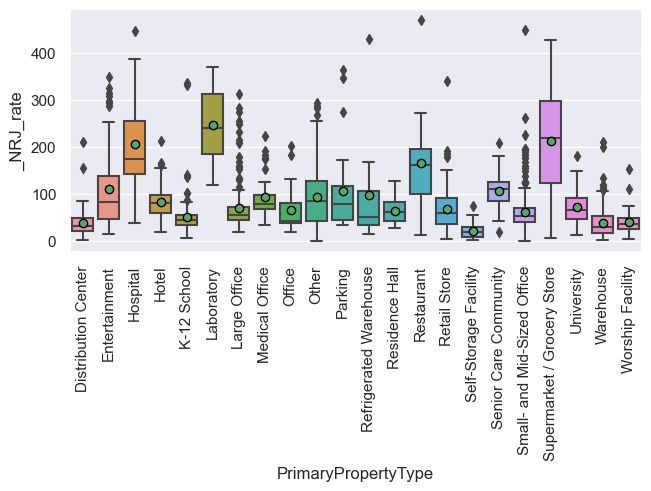

In [410]:
plt.figure(constrained_layout=True)
sns.boxplot(data=tmp, x= 'PrimaryPropertyType', y='_NRJ_rate', 
            showmeans=True,meanprops = {'marker':'o','markeredgecolor':'black'})
plt.xticks(rotation = 90)
plt.show()

#### Lien avec ENERGYSTARScore

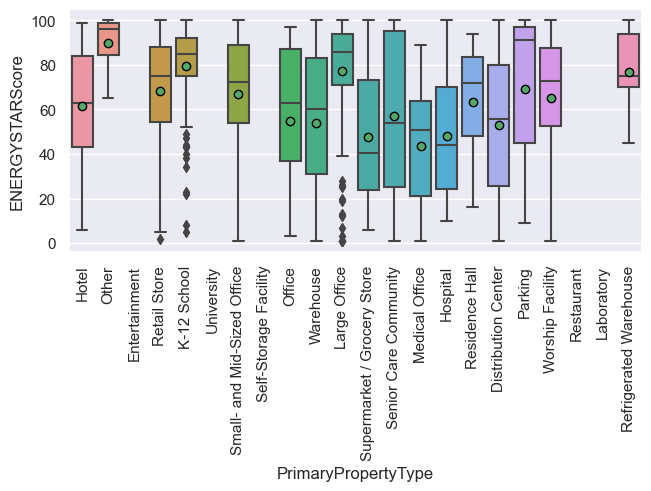

In [411]:
plt.figure(constrained_layout=True)
sns.boxplot(data=data, x= 'PrimaryPropertyType', y='ENERGYSTARScore', 
            showmeans=True,meanprops = {'marker':'o','markeredgecolor':'black'})
plt.xticks(rotation = 90)
plt.show()

Plusieurs types pour lesquels aucun ENERGYSTARScore n'est renseigné. Etrangement il peut s'agir de batiment ayant une faible conso d'NRJ (Self Storage)

### Lien entre NRJ_rate et ENERGYSTARScore

Text(0.5, 1.0, "Matrice de corrélation entre conso d'NRJ par sq/ft et ENERGYSTARScore")

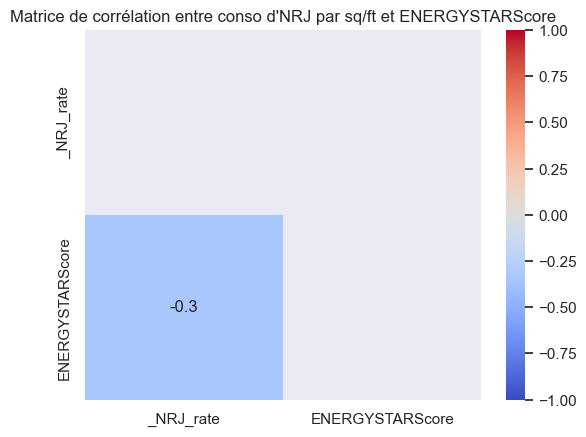

In [413]:
corr_tmp=data[['_NRJ_rate','ENERGYSTARScore']].corr()
mask=np.triu(corr_tmp)
sns.heatmap(corr_tmp, annot=True, fmt=".1f", vmin=-1, vmax=1, cmap="coolwarm",mask=mask)
plt.title("Matrice de corrélation entre conso d'NRJ par sq/ft et ENERGYSTARScore")

### Analyse par quartier:

In [414]:
cont_table=pd.crosstab(data.Neighborhood,data.PrimaryPropertyType)
cont_table

PrimaryPropertyType    Distribution Center  Entertainment  Hospital  Hotel  \
Neighborhood                                                                 
BALLARD                                  1              3         1      1   
CENTRAL                                  0              5         3      1   
DELRIDGE                                 5              2         0      0   
DOWNTOWN                                 0             13         0     43   
EAST                                     0             10         7      5   
GREATER DUWAMISH                        41              7         0      4   
LAKE UNION                               2              1         1     11   
MAGNOLIA / QUEEN ANNE                    3              7         0      6   
NORTH                                    0              5         1      0   
NORTHEAST                                0              4         2      7   
NORTHWEST                                0              4         2      4   
SOUTHEAST                                1              2         0      0   
SOUTHWEST                                0              2         1      0   

PrimaryPropertyType    K-12 School  Laboratory  Large Office  Medical Office  \
Neighborhood                                                                   
BALLARD                          8           0             0               0   
CENTRAL                         11           0             0               3   
DELRIDGE                         9           0             1               1   
DOWNTOWN                         2           3           100               2   
EAST                            14           1             0              15   
GREATER DUWAMISH                11           0            11               0   
LAKE UNION                       5           7            32               1   
MAGNOLIA / QUEEN ANNE            8           2            19               1   
NORTH                            7           0             1               4   
NORTHEAST                       14           0             5               8   
NORTHWEST                       16           0             0               3   
SOUTHEAST                       15           0             0               2   
SOUTHWEST                       10           0             0               1   

PrimaryPropertyType    Office  Other  Parking  Refrigerated Warehouse  \
Neighborhood                                                            
BALLARD                     0      4        1                       0   
CENTRAL                     0      3        0                       0   
DELRIDGE                    0      2        0                       0   
DOWNTOWN                   10     21        7                       0   
EAST                        2      9        5                       0   
GREATER DUWAMISH            7     35        4                      12   
LAKE UNION                  4      6        6                       0   
MAGNOLIA / QUEEN ANNE       2     22        0                       0   
NORTH                       1      5        2                       0   
NORTHEAST                   2      9        3                       0   
NORTHWEST                   0      3        2                       0   
SOUTHEAST                   0      1        0                       0   
SOUTHWEST                   2      1        0                       0   

PrimaryPropertyType    Residence Hall  Restaurant  Retail Store  \
Neighborhood                                                      
BALLARD                             0           1             6   
CENTRAL                             0           0             3   
DELRIDGE                            0           0             7   
DOWNTOWN                            3          10            24   
EAST                                2           0             8   
GREATER DUWAMISH                    0           0            21

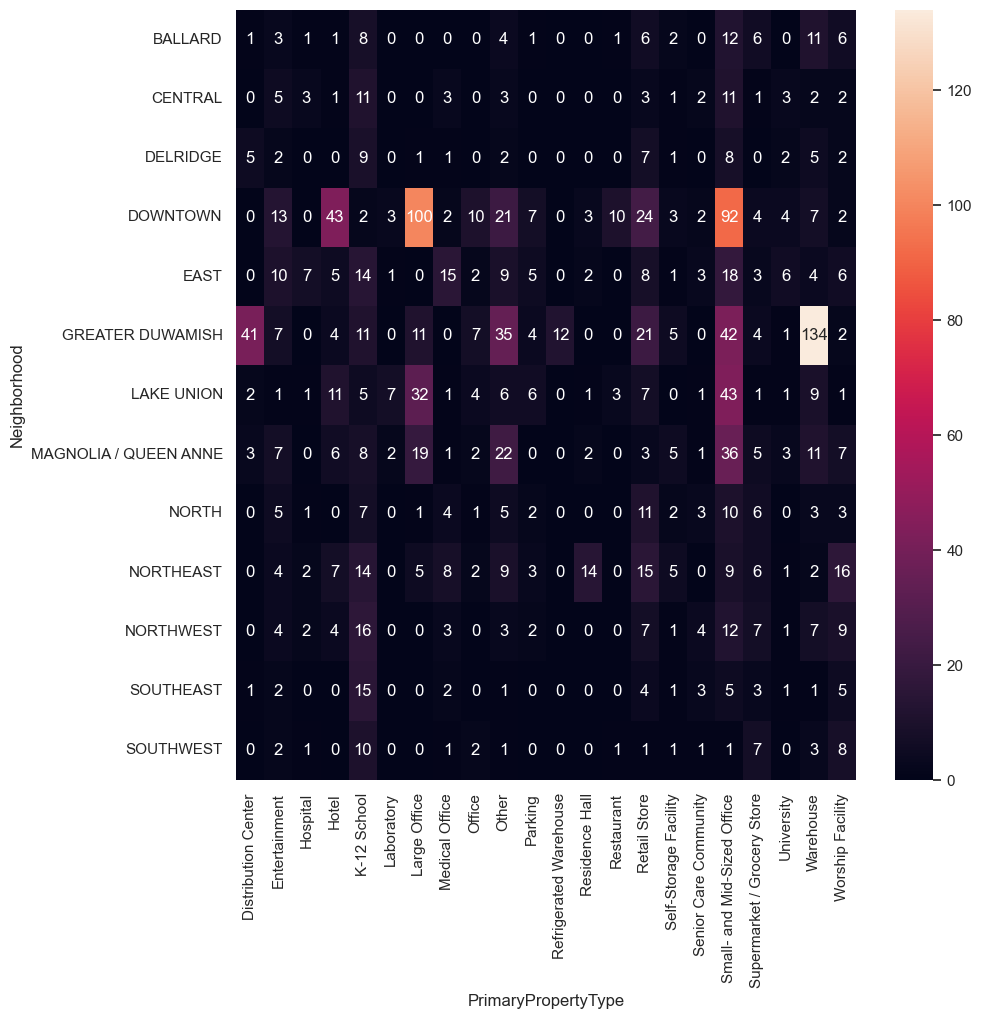

In [415]:
plt.figure(figsize=(10,10))
sns.heatmap(cont_table, annot= True, fmt=".0f")
plt.show()

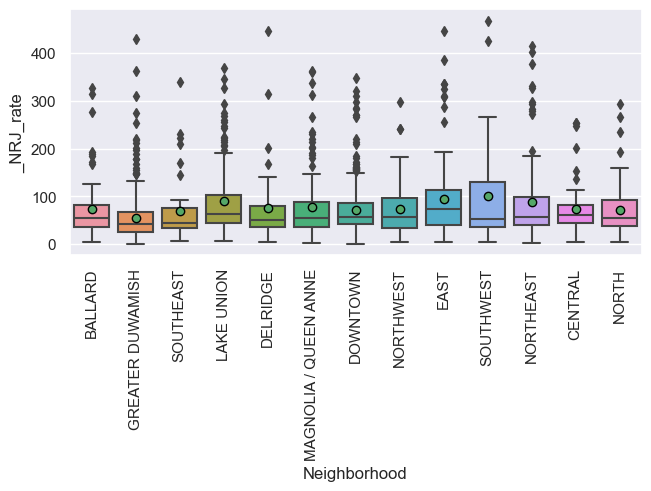

In [416]:
plt.figure(constrained_layout=True)
sns.boxplot(data=tmp, x= 'Neighborhood', y='_NRJ_rate', 
            showmeans=True,meanprops = {'marker':'o','markeredgecolor':'black'})
plt.xticks(rotation = 90)
plt.show()

Pas de d'écart flagrant dans la conso d'NRJ selon le quartier (hormis SouthWest mais qui a peu d'individus)

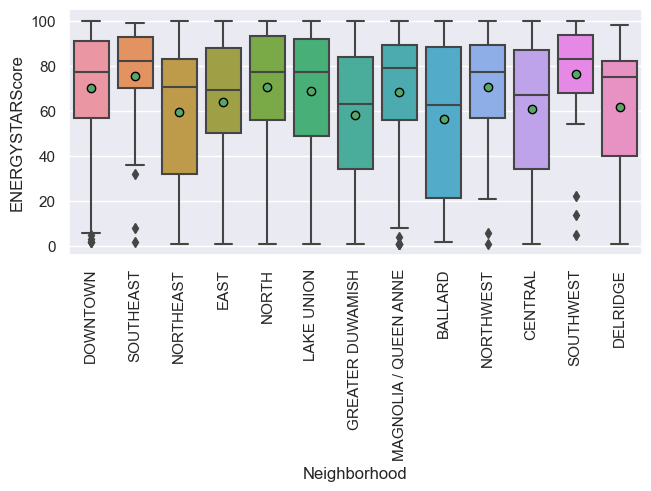

In [417]:
plt.figure(constrained_layout=True)
sns.boxplot(data=data, x= 'Neighborhood', y='ENERGYSTARScore', 
            showmeans=True,meanprops = {'marker':'o','markeredgecolor':'black'})
plt.xticks(rotation = 90)
plt.show()

In [418]:
tmp=data.loc[data['TotalGHGEmissions']<500]
tmp

PrimaryPropertyType  Latitude  Longitude  YearBuilt      Neighborhood  \
0                  Hotel  47.61220 -122.33799       1927          DOWNTOWN   
1                  Hotel  47.61317 -122.33393       1996          DOWNTOWN   
3                  Hotel  47.61412 -122.33664       1926          DOWNTOWN   
5                  Other  47.61623 -122.33657       1999          DOWNTOWN   
6                  Hotel  47.61390 -122.33283       1926          DOWNTOWN   
...                  ...       ...        ...        ...               ...   
1646         K-12 School  47.58831 -122.30650       2015  GREATER DUWAMISH   
1648          University  47.66127 -122.31256       1962         NORTHEAST   
1649       Entertainment  47.70541 -122.32232       2005             NORTH   
1656       Entertainment  47.63228 -122.31574       1912              EAST   
1657       Entertainment  47.60775 -122.30225       1994           CENTRAL   

      NumberofBuildings  NumberofFloors  PropertyGFAParking  \
0                   1.0              12                   0   
1                   1.0              11               15064   
3                   1.0              10                   0   
5                   1.0               2               37198   
6                   1.0              11                   0   
...                 ...             ...                 ...   
1646                1.0               3                   0   
1648                1.0               1                   0   
1649                1.0               1                   0   
1656                1.0               1                   0   
1657                1.0               1                   0   

      PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
0                      88434           7.456910e+06      2003882.00   
1                      88502           8.664479e+06            0.00   
3                      61320           6.946800e+06      2214446.25   
5                      60090           1.258171e+07            0.00   
6                      83008           6.062768e+06            0.00   
...                      ...                    ...             ...   
1646                   45000           1.397742e+06            0.00   
1648                   68072           3.180819e+06            0.00   
1649                   20616           6.369655e+05            0.00   
1656                   23445           6.716330e+06            0.00   
1657                   20050           1.993137e+06            0.00   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  ENERGYSTARScore  \
0          3.946027e+06       1276453.000             249.98             60.0   
1          3.242851e+06       5145082.000             295.86             61.0   
3          2.768924e+06       1811213.000             286.43             56.0   
5          7.371434e+06       4715182.000             301.81              NaN   
6          2.811215e+06       2947580.000             176.14             27.0   
...                 ...               ...                ...              ...   
1646       1.325973e+06             0.000               9.24             77.0   
1648       3.180819e+06             0.000              22.17              NaN   
1649       6.369655e+05             0.000               4.44              NaN   
1656       1.260870e+06       4715375.781             259.22              NaN   
1657       7.694531e+05       1043951.074              60.81              NaN   

      superfice/etage  superfice/batiment   _NRJ_rate  Parking_pct  pct_gaz  \
0         7369.500000             88434.0   84.321754     0.000000      0.2   
1         8045.636364             88502.0   97.901505     0.145453      0.6   
3         6132.000000             61320.0  113.287679     0.000000      0.3   
5        30045.000000             60090.0  209.381128     0.382349      0.4   
6         7546.181818             83008.0   73.038352     0.000000      0.5   
...        

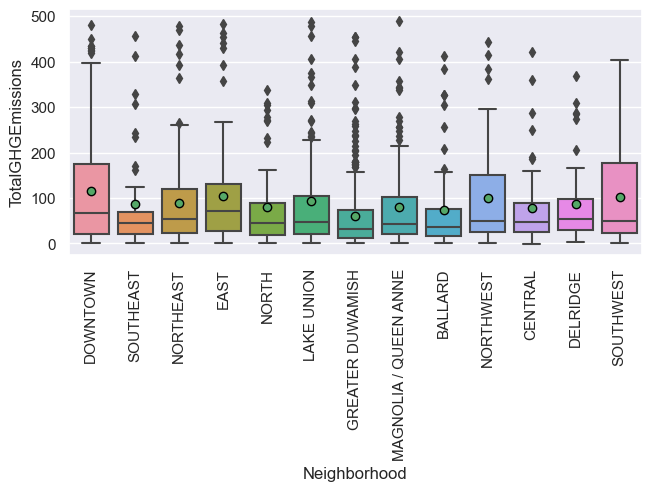

In [419]:
plt.figure(constrained_layout=True)
sns.boxplot(data=tmp, x= 'Neighborhood', y='TotalGHGEmissions', 
            showmeans=True,meanprops = {'marker':'o','markeredgecolor':'black'})
plt.xticks(rotation = 90)
plt.show()

## Utilisation des coordonnées GPS

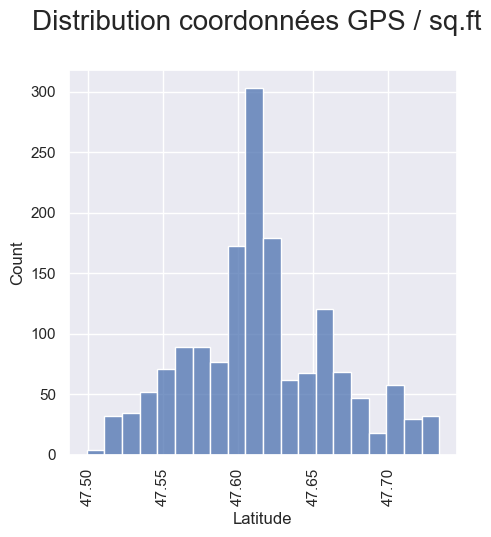

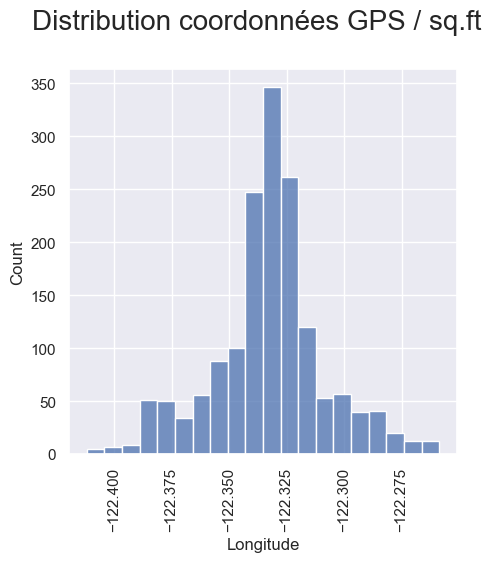

In [420]:
for col in ('Latitude','Longitude'):
    plt.figure(figsize = (5,5))#,constrained_layout=True)
    plt.suptitle("Distribution coordonnées GPS / sq.ft", size=20, y=1)
    plt.xticks(rotation = 90)
    sns.histplot(data[col], bins =20)#, stat='percent' #, kde=True)

In [421]:
m = folium.Map(location=[47.61317,-122.33393],tiles="cartodb positron", zoom_start=10)
#tooltip ='Click me!'
locations=list(zip(data.Latitude,data.Longitude))
popup=list(zip(df.PropertyName,df.Neighborhood))
cluster=plugins.MarkerCluster(locations=locations,popups=popup)
m.add_child(cluster)
m

In [422]:
m = folium.Map(location=[47.61317,-122.33393],tiles="cartodb positron", zoom_start=10)
locations=list(zip(data.Latitude,data.Longitude))
folium.plugins.HeatMap(locations).add_to(m)
m

In [423]:
min_conso=data['SiteEnergyUseWN(kBtu)'].min()

In [424]:
max_conso=data['SiteEnergyUseWN(kBtu)'].min()

In [425]:
min_emission=data['TotalGHGEmissions'].min()

In [426]:
max_emission=data['TotalGHGEmissions'].max()

In [427]:
#m = folium.Map(location=[47.61317,-122.33393],width="%100",height="%100")
#colormap = StepColormap(colors=['green','yellow'] ,
#                           index=[0,1]
#                                  )


#for loc, p in zip(zip(data["Latitude"],data["Longitude"]),data["PrimaryPropertyType"]):
#      folium.Circle(
#      location=loc,
#      radius=2, 
#      fill=True, 
#      color=colormap(p)
#).add_to(m)
#m

In [428]:
m = folium.Map(location=[47.61317,-122.33393],width="%100",height="%100")
colormap = StepColormap(colors=['green','yellow','orange','red'] ,
                           index=[min_conso,
                                  data['SiteEnergyUseWN(kBtu)'].quantile(0.25),
                                  data['SiteEnergyUseWN(kBtu)'].median(),
                                  data['SiteEnergyUseWN(kBtu)'].quantile(0.75)],
                                  #max_conso],
                           vmin= min_conso,
                           vmax=max_conso)


for loc, p in zip(zip(data["Latitude"],data["Longitude"]),data["SiteEnergyUseWN(kBtu)"]):
      folium.Circle(
      location=loc,
      radius=2, 
      fill=True, 
      color=colormap(p)
).add_to(m)
m

In [429]:
m = folium.Map(location=[47.61317,-122.33393],width="%100",height="%100")
colormap = StepColormap(colors=['green','yellow','orange','red'] ,
                           index=[0,
                                  data['TotalGHGEmissions'].quantile(0.25),
                                  data['TotalGHGEmissions'].median(),
                                  data['TotalGHGEmissions'].quantile(0.75)],
                                  #max_conso],
                           vmin= min_conso,
                           vmax=max_conso)


for loc, p in zip(zip(data["Latitude"],data["Longitude"]),data["TotalGHGEmissions"]):
      folium.Circle(
      location=loc,
      radius=100, 
      fill=True, 
      color=colormap(p)
).add_to(m)
m

## 5. Enregistrement du fichier pour 2nd notebook 

Suppression de la feature NRJ_rate (calculée sur base d'une des 2 targets) et de Neighborhood

In [430]:
data.drop(['_NRJ_rate','Neighborhood'], axis=1, inplace= True)
data

PrimaryPropertyType  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0                  Hotel  47.61220 -122.33799       1927                1.0   
1                  Hotel  47.61317 -122.33393       1996                1.0   
2                  Hotel  47.61393 -122.33810       1969                1.0   
3                  Hotel  47.61412 -122.33664       1926                1.0   
4                  Hotel  47.61375 -122.34047       1980                1.0   
...                  ...       ...        ...        ...                ...   
1647          Laboratory  47.62497 -122.33883       2015                1.0   
1648          University  47.66127 -122.31256       1962                1.0   
1649       Entertainment  47.70541 -122.32232       2005                1.0   
1656       Entertainment  47.63228 -122.31574       1912                1.0   
1657       Entertainment  47.60775 -122.30225       1994                1.0   

      NumberofFloors  PropertyGFAParking  PropertyGFABuilding(s)  \
0                 12                   0                   88434   
1                 11               15064                   88502   
2                 41              196718                  759392   
3                 10                   0                   61320   
4                 18               62000                  113580   
...              ...                 ...                     ...   
1647               6               85028                  260262   
1648               1                   0                   68072   
1649               1                   0                   20616   
1656               1                   0                   23445   
1657               1                   0                   20050   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
0              7.456910e+06      2003882.00       3.946027e+06   
1              8.664479e+06            0.00       3.242851e+06   
2              7.393711e+07     21566554.00       4.952666e+07   
3              6.946800e+06      2214446.25       2.768924e+06   
4              1.465650e+07            0.00       5.368607e+06   
...                     ...             ...                ...   
1647           4.107860e+07            0.00       2.363680e+07   
1648           3.180819e+06            0.00       3.180819e+06   
1649           6.369655e+05            0.00       6.369655e+05   
1656           6.716330e+06            0.00       1.260870e+06   
1657           1.993137e+06            0.00       7.694531e+05   

      NaturalGas(kBtu)  TotalGHGEmissions  ENERGYSTARScore  superfice/etage  \
0         1.276453e+06             249.98             60.0      7369.500000   
1         5.145082e+06             295.86             61.0      8045.636364   
2         1.493800e+06            2089.28             43.0     18521.756098   
3         1.811213e+06             286.43             56.0      6132.000000   
4         8.803998e+06             505.01             75.0      6310.000000   
...                ...                ...              ...              ...   
1647      1.572731e+07            1000.06              NaN     43377.000000   
1648      0.000000e+00              22.17              NaN     68072.000000   
1649      0.000000e+00               4.44              NaN     20616.000000   
1656      4.715376e+06             259.22              NaN     23445.000000   
1657      1.043951e+06              60.81              NaN     20050.000000   

      superfice/batiment  Parking_pct  pct_gaz  pct_elec  pct_steam  \
0                88434.0     0.000000      0.2       0.5        0.3   
1                88502.0     0.145453      0.6       0.4        0.0   
2               759392.0     0.205748      0.0       0.7        0.3   
3                61320.0     0.000000      0.3       0.4        0.3   
4               113580.0     0.353115      0.6       0.4        0.0   
...                  ...          ...      ...       ...        ...   


In [431]:
data.to_csv('C:/Users/xavie/P4/data.csv', index=False)

In [432]:
data.isna().mean()

PrimaryPropertyType       0.000000
Latitude                  0.000000
Longitude                 0.000000
YearBuilt                 0.000000
NumberofBuildings         0.000000
NumberofFloors            0.000000
PropertyGFAParking        0.000000
PropertyGFABuilding(s)    0.000000
SiteEnergyUseWN(kBtu)     0.000000
SteamUse(kBtu)            0.000000
Electricity(kBtu)         0.000000
NaturalGas(kBtu)          0.000000
TotalGHGEmissions         0.000000
ENERGYSTARScore           0.333126
superfice/etage           0.000000
superfice/batiment        0.000000
Parking_pct               0.000000
pct_gaz                   0.000000
pct_elec                  0.000000
pct_steam                 0.000000
conso_log                 0.000000
GHG_log                   0.000000
dtype: float64